In [39]:
import numpy as np
import scipy.stats
import statistics
import matplotlib.pyplot as plt
import matplotlib
import control

In [47]:
def show(data, start=0, stop=0):
    d = np.array(data)
    # P D Z X XE0 XE1 XE2 E PID_U U_0 U
    
    if stop == 0:
        stop=len(d[:,0])-1
        
    T = 0.05
    N = stop-start
    t = np.linspace(start=0, stop=(N-1)*T, num=N)
    
    fig = plt.figure(figsize=(10, 10))
    
    fig.add_subplot(3, 1, 1)
    plt.plot(t, d[start:stop, 2], label="wartość zadana")
    plt.plot(t, d[start:stop, 3], label="położenie")
    plt.plot(t, d[start:stop, 4], label="estymata położenia")
    plt.xlabel("czas, s")
    plt.ylabel("położenie kuli, mm")
    plt.legend(loc="lower right")
    plt.grid()
    
    fig.add_subplot(3, 1, 2)
    plt.plot(t, d[start:stop, 8], label="sterowanie")
    plt.xlabel("czas, s")
    plt.ylabel("kąt serwomechanizmu, stopnie")
    plt.grid()
    
    fig.add_subplot(3, 1, 3)
    plt.plot(t, d[start:stop, 5], label="estymata prędkości kuli, mm/s")
    plt.plot(t, d[start:stop, 6], label="estymata połozenia serwomechanizmu, stopnie")
    plt.xlabel("czas, s")
    plt.ylabel("")
    plt.legend(loc="upper right")
    plt.grid()

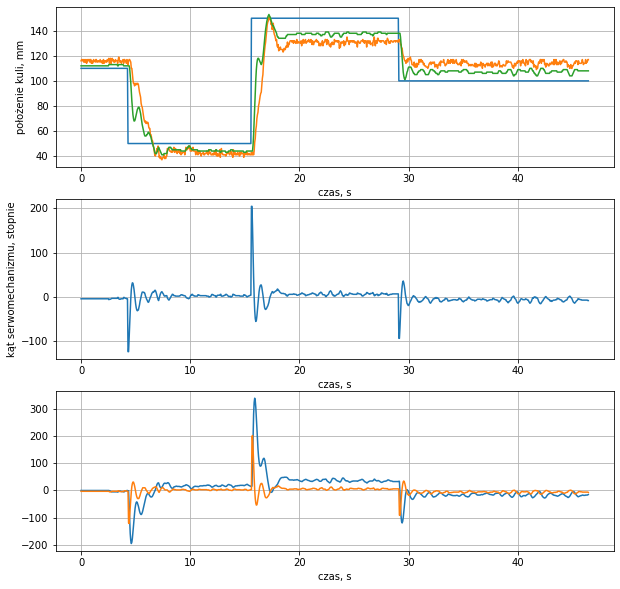

In [29]:
# From state 20, 5, 0
d1=[[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,114,112,0,-3,-4,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,114,112,0,-3,-4,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,114,112,0,-3,-4,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,114,112,0,-3,-4,-4,103,107],[20,5,110,114,112,0,-3,-4,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,114,112,0,-3,-4,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,115,112,0,-3,-5,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,110,117,112,0,-3,-7,-4,103,107],[20,5,110,118,113,0,-3,-8,-6,103,109],[20,5,110,114,113,-1,-5,-4,-5,103,108],[20,5,110,117,113,-2,-5,-7,-5,103,108],[20,5,110,118,113,-2,-5,-8,-5,103,108],[20,5,110,114,113,-4,-5,-4,-4,103,107],[20,5,110,117,113,-5,-4,-7,-3,103,106],[20,5,110,118,113,-5,-3,-8,-3,103,106],[20,5,110,116,113,-5,-3,-6,-3,103,106],[20,5,110,117,113,-5,-3,-7,-3,103,106],[20,5,110,115,113,-5,-3,-5,-3,103,106],[20,5,110,116,113,-5,-3,-6,-3,103,106],[20,5,110,115,113,-5,-3,-5,-3,103,106],[20,5,110,117,113,-5,-3,-7,-3,103,106],[20,5,110,116,113,-5,-3,-6,-3,103,106],[20,5,110,116,113,-5,-3,-6,-3,103,106],[20,5,110,116,113,-5,-3,-6,-3,103,106],[20,5,110,114,112,-6,-3,-4,-1,103,104],[20,5,110,117,112,-5,-1,-7,-1,103,104],[20,5,110,119,113,-3,-1,-9,-4,103,107],[20,5,110,117,113,-2,-3,-7,-5,103,108],[20,5,110,115,113,-2,-4,-5,-5,103,108],[20,5,110,116,113,-2,-4,-6,-5,103,108],[20,5,110,115,113,-3,-4,-5,-4,103,107],[20,5,110,114,113,-4,-4,-4,-4,103,107],[20,5,110,116,113,-4,-4,-6,-4,103,107],[20,5,110,116,113,-4,-4,-6,-4,103,107],[20,5,110,117,113,-4,-4,-7,-4,103,107],[20,5,110,114,112,-5,-4,-4,-1,103,104],[20,5,110,117,112,-5,-1,-7,-1,103,104],[20,5,110,117,112,-3,-1,-7,-2,103,105],[20,5,110,116,112,-2,-1,-6,-3,103,106],[20,5,110,116,112,-1,-2,-6,-3,103,106],[20,5,110,114,112,-1,-2,-4,-3,103,106],[20,5,110,117,112,0,-2,-7,-4,103,107],[20,5,110,116,112,0,-3,-6,-4,103,107],[20,5,50,113,112,-1,-3,-63,-123,103,180],[20,5,50,116,112,-1,-120,-66,-123,103,180],[20,5,50,117,112,-57,-122,-67,-95,103,180],[20,5,50,117,110,-114,-95,-67,-63,103,166],[20,5,50,116,105,-158,-63,-66,-31,103,134],[20,5,50,115,99,-185,-31,-65,-5,103,108],[20,5,50,110,91,-196,-5,-60,16,103,87],[20,5,50,110,84,-191,15,-60,27,103,76],[20,5,50,105,78,-176,26,-55,32,103,71],[20,5,50,101,73,-155,31,-51,31,103,72],[20,5,50,98,70,-131,31,-48,25,103,78],[20,5,50,98,68,-106,25,-48,17,103,86],[20,5,50,96,68,-84,17,-46,6,103,97],[20,5,50,98,69,-65,6,-48,-5,103,108],[20,5,50,97,71,-52,-4,-47,-16,103,119],[20,5,50,98,73,-44,-15,-48,-24,103,127],[20,5,50,97,75,-42,-23,-47,-29,103,132],[20,5,50,98,77,-45,-28,-48,-31,103,134],[20,5,50,98,78,-51,-30,-48,-30,103,133],[20,5,50,97,79,-58,-30,-47,-29,103,132],[20,5,50,94,79,-67,-29,-44,-24,103,127],[20,5,50,91,78,-76,-24,-41,-18,103,121],[20,5,50,89,76,-83,-18,-39,-10,103,113],[20,5,50,87,74,-87,-10,-37,-4,103,107],[20,5,50,82,71,-89,-4,-32,2,103,101],[20,5,50,80,68,-87,1,-30,7,103,96],[20,5,50,79,65,-82,6,-29,11,103,92],[20,5,50,76,63,-75,10,-26,11,103,92],[20,5,50,73,61,-66,10,-23,11,103,92],[20,5,50,70,59,-57,10,-20,10,103,93],[20,5,50,68,57,-48,10,-18,10,103,93],[20,5,50,67,56,-39,10,-17,7,103,96],[20,5,50,68,56,-29,7,-18,2,103,101],[20,5,50,66,56,-22,2,-16,-1,103,104],[20,5,50,67,57,-17,0,-17,-5,103,108],[20,5,50,66,57,-13,-4,-16,-7,103,110],[20,5,50,67,58,-11,-6,-17,-10,103,113],[20,5,50,66,59,-11,-9,-16,-12,103,115],[20,5,50,63,59,-13,-11,-13,-11,103,114],[20,5,50,62,58,-17,-11,-12,-7,103,110],[20,5,50,62,57,-20,-7,-12,-4,103,107],[20,5,50,57,56,-23,-4,-7,0,103,103],[20,5,50,57,55,-24,0,-7,2,103,101],[20,5,50,55,53,-24,1,-5,6,103,97],[20,5,50,52,51,-23,5,-2,9,103,94],[20,5,50,52,50,-20,8,-2,10,103,93],[20,5,50,49,48,-16,9,1,12,103,91],[20,5,50,47,47,-11,11,3,11,103,92],[20,5,50,44,45,-6,11,6,13,103,90],[20,5,50,41,43,-2,12,9,15,103,88],[20,5,50,40,42,2,14,10,15,103,88],[20,5,50,42,42,8,14,8,12,103,91],[20,5,50,44,42,15,12,6,8,103,95],[20,5,50,46,43,22,8,4,3,103,100],[20,5,50,44,44,26,3,6,-1,103,104],[20,5,50,48,46,28,0,2,-6,103,109],[20,5,50,46,47,28,-5,4,-8,103,111],[20,5,50,39,46,22,-7,11,-3,103,106],[20,5,50,40,45,16,-3,10,2,103,101],[20,5,50,38,44,12,1,12,6,103,97],[20,5,50,39,43,10,5,11,9,103,94],[20,5,50,38,42,10,8,12,11,103,92],[20,5,50,37,41,12,10,13,12,103,91],[20,5,50,38,41,15,11,12,10,103,93],[20,5,50,39,41,19,10,11,8,103,95],[20,5,50,39,41,23,8,11,6,103,97],[20,5,50,41,42,26,6,9,3,103,100],[20,5,50,38,42,27,3,12,2,103,101],[20,5,50,39,42,27,2,11,2,103,101],[20,5,50,38,42,26,2,12,3,103,100],[20,5,50,40,42,26,2,10,3,103,100],[20,5,50,40,42,26,2,10,3,103,100],[20,5,50,46,44,28,2,4,-2,103,105],[20,5,50,46,45,29,-1,4,-4,103,107],[20,5,50,46,46,28,-3,4,-6,103,109],[20,5,50,46,47,26,-5,4,-7,103,110],[20,5,50,44,47,22,-6,6,-5,103,108],[20,5,50,44,47,18,-5,6,-3,103,106],[20,5,50,44,47,14,-3,6,-1,103,104],[20,5,50,43,46,11,-1,7,2,103,101],[20,5,50,44,46,9,1,6,3,103,100],[20,5,50,43,45,8,2,7,6,103,97],[20,5,50,44,45,8,5,6,6,103,97],[20,5,50,45,45,10,5,5,5,103,98],[20,5,50,47,45,13,5,3,3,103,100],[20,5,50,43,45,14,3,7,3,103,100],[20,5,50,43,45,14,3,7,3,103,100],[20,5,50,46,45,15,3,4,2,103,101],[20,5,50,44,45,16,2,6,2,103,101],[20,5,50,44,45,16,2,6,2,103,101],[20,5,50,42,45,15,2,8,2,103,101],[20,5,50,44,45,15,2,6,2,103,101],[20,5,50,43,45,15,2,7,2,103,101],[20,5,50,45,45,15,2,5,2,103,101],[20,5,50,44,45,15,2,6,2,103,101],[20,5,50,42,45,14,2,8,3,103,100],[20,5,50,45,45,14,2,5,3,103,100],[20,5,50,41,44,13,2,9,5,103,98],[20,5,50,42,44,13,4,8,5,103,98],[20,5,50,42,44,14,4,8,5,103,98],[20,5,50,43,44,15,4,7,4,103,99],[20,5,50,43,44,16,4,7,4,103,99],[20,5,50,43,44,17,4,7,3,103,100],[20,5,50,43,44,18,3,7,3,103,100],[20,5,50,41,44,18,3,9,3,103,100],[20,5,50,44,44,19,3,6,2,103,101],[20,5,50,47,45,21,2,3,0,103,103],[20,5,50,45,46,21,0,5,-2,103,105],[20,5,50,45,46,20,-1,5,-2,103,105],[20,5,50,46,47,19,-1,4,-3,103,106],[20,5,50,46,47,18,-2,4,-3,103,106],[20,5,50,48,48,17,-2,2,-4,103,107],[20,5,50,46,48,15,-3,4,-3,103,106],[20,5,50,48,48,13,-3,2,-2,103,105],[20,5,50,44,47,10,-2,6,1,103,102],[20,5,50,44,46,7,0,6,4,103,99],[20,5,50,46,46,7,3,4,4,103,99],[20,5,50,44,45,7,3,6,6,103,97],[20,5,50,46,45,8,5,4,6,103,97],[20,5,50,47,45,11,5,3,4,103,99],[20,5,50,44,45,13,4,6,3,103,100],[20,5,50,44,45,14,3,6,3,103,100],[20,5,50,44,45,15,3,6,2,103,101],[20,5,50,44,45,16,2,6,2,103,101],[20,5,50,41,45,15,2,9,2,103,101],[20,5,50,43,45,15,2,7,2,103,101],[20,5,50,44,45,15,2,6,2,103,101],[20,5,50,44,45,15,2,6,2,103,101],[20,5,50,41,44,14,2,9,5,103,98],[20,5,50,44,44,14,4,6,5,103,98],[20,5,50,42,44,15,4,8,4,103,99],[20,5,50,44,44,16,4,6,4,103,99],[20,5,50,43,44,17,4,7,3,103,100],[20,5,50,41,44,17,3,9,3,103,100],[20,5,50,40,44,17,3,10,3,103,100],[20,5,50,42,44,17,3,8,3,103,100],[20,5,50,42,44,17,3,8,3,103,100],[20,5,50,42,44,17,3,8,3,103,100],[20,5,50,43,44,18,3,7,3,103,100],[20,5,50,41,44,18,3,9,3,103,100],[20,5,50,41,44,18,3,9,3,103,100],[20,5,50,42,44,18,3,8,3,103,100],[20,5,50,42,44,18,3,8,3,103,100],[20,5,50,42,44,18,3,8,3,103,100],[20,5,50,44,44,19,3,6,2,103,101],[20,5,50,44,44,20,2,6,2,103,101],[20,5,50,42,44,20,2,8,2,103,101],[20,5,50,41,44,19,2,9,2,103,101],[20,5,50,45,45,20,2,5,0,103,103],[20,5,50,42,45,19,0,8,0,103,103],[20,5,50,43,45,18,0,7,1,103,102],[20,5,50,43,45,17,0,7,1,103,102],[20,5,50,41,45,15,0,9,2,103,101],[20,5,50,41,44,13,1,9,5,103,98],[20,5,50,41,44,12,4,9,6,103,97],[20,5,50,42,44,13,5,8,5,103,98],[20,5,50,41,44,14,5,9,5,103,98],[20,5,50,41,44,15,5,9,4,103,99],[20,5,50,44,44,17,4,6,3,103,100],[20,5,50,44,44,18,3,6,3,103,100],[20,5,50,41,44,18,3,9,3,103,100],[20,5,50,45,45,19,3,5,0,103,103],[20,5,50,41,45,19,0,9,0,103,103],[20,5,50,40,44,17,0,10,3,103,100],[20,5,50,42,44,16,2,8,4,103,99],[20,5,50,40,44,15,3,10,4,103,99],[20,5,50,41,44,15,3,9,4,103,99],[20,5,50,41,44,15,3,9,4,103,99],[20,5,50,45,44,16,3,5,4,103,99],[20,5,50,39,43,15,3,11,6,103,97],[20,5,50,44,43,16,5,6,6,103,97],[20,5,50,46,44,19,5,4,2,103,101],[20,5,50,42,44,20,2,8,2,103,101],[20,5,50,42,44,20,2,8,2,103,101],[20,5,50,41,44,19,2,9,2,103,101],[20,5,50,41,44,18,2,9,3,103,100],[20,5,50,41,44,17,2,9,3,103,100],[20,5,50,41,44,16,2,9,4,103,99],[20,5,50,41,44,15,3,9,4,103,99],[20,5,50,40,43,15,3,10,6,103,97],[20,5,50,41,43,15,5,9,6,103,97],[20,5,50,43,43,17,5,7,5,103,98],[20,5,50,42,43,19,5,8,4,103,99],[20,5,50,43,43,21,4,7,3,103,100],[20,5,50,43,44,22,3,7,1,103,102],[20,5,50,42,44,22,1,8,1,103,102],[20,5,50,41,44,21,1,9,1,103,102],[20,5,50,42,44,20,1,8,2,103,101],[20,5,50,44,45,20,1,6,0,103,103],[20,5,50,43,45,19,0,7,0,103,103],[20,5,50,41,45,17,0,9,1,103,102],[20,5,50,41,45,15,0,9,2,103,101],[20,5,50,39,44,12,1,11,6,103,97],[20,5,50,45,44,12,5,5,6,103,97],[20,5,50,41,44,13,5,9,5,103,98],[20,5,50,42,44,14,5,8,5,103,98],[20,5,50,43,44,16,5,7,4,103,99],[20,5,50,41,44,17,4,9,3,103,100],[20,5,50,41,44,17,3,9,3,103,100],[20,5,50,42,44,17,3,8,3,103,100],[20,5,50,41,44,17,3,9,3,103,100],[20,5,50,43,44,18,3,7,3,103,100],[20,5,50,42,44,18,3,8,3,103,100],[20,5,50,41,44,18,3,9,3,103,100],[20,5,50,40,44,18,3,10,3,103,100],[20,5,50,43,44,19,3,7,2,103,101],[20,5,50,41,44,19,2,9,2,103,101],[20,5,50,42,44,19,2,8,2,103,101],[20,5,50,43,44,19,2,7,2,103,101],[20,5,50,42,44,19,2,8,2,103,101],[20,5,50,42,44,19,2,8,2,103,101],[20,5,50,42,44,19,2,8,2,103,101],[20,5,50,39,43,18,2,11,5,103,98],[20,5,50,42,43,18,4,8,5,103,98],[20,5,50,42,43,19,4,8,4,103,99],[20,5,50,42,43,20,4,8,4,103,99],[20,5,50,41,43,21,4,9,3,103,100],[20,5,50,43,44,22,3,7,1,103,102],[20,5,50,43,44,23,1,7,0,103,103],[20,5,50,41,44,22,0,9,1,103,102],[20,5,50,41,44,20,0,9,2,103,101],[20,5,50,42,44,19,1,8,2,103,101],[20,5,50,42,44,18,1,8,3,103,100],[20,5,50,41,44,17,2,9,3,103,100],[20,5,50,41,44,16,2,9,4,103,99],[20,5,50,41,44,15,3,9,4,103,99],[20,5,150,43,44,16,3,107,204,103,0],[20,5,150,41,44,16,199,109,204,103,0],[20,5,150,41,44,111,203,109,156,103,0],[20,5,150,43,49,209,156,107,97,103,6],[20,5,150,41,57,282,98,109,45,103,58],[20,5,150,44,68,325,46,106,1,103,102],[20,5,150,51,80,341,1,99,-30,103,133],[20,5,150,54,91,332,-29,96,-48,103,151],[20,5,150,61,101,307,-47,89,-55,103,158],[20,5,150,64,109,271,-54,86,-53,103,156],[20,5,150,70,114,231,-53,80,-43,103,146],[20,5,150,73,117,190,-43,77,-29,103,132],[20,5,150,75,118,154,-29,75,-13,103,116],[20,5,150,80,118,126,-13,70,1,103,102],[20,5,150,82,117,107,0,68,12,103,91],[20,5,150,85,116,95,11,65,20,103,83],[20,5,150,88,115,90,19,62,25,103,78],[20,5,150,90,114,90,24,60,27,103,76],[20,5,150,91,113,93,26,59,27,103,76],[20,5,150,97,114,100,26,53,22,103,81],[20,5,150,102,116,108,22,48,14,103,89],[20,5,150,105,119,114,14,45,5,103,98],[20,5,150,113,123,118,5,37,-5,103,108],[20,5,150,119,128,119,-4,31,-15,103,118],[20,5,150,124,133,115,-14,26,-23,103,126],[20,5,150,128,137,106,-22,22,-27,103,130],[20,5,150,131,141,93,-26,19,-28,103,131],[20,5,150,136,144,78,-27,14,-27,103,130],[20,5,150,141,147,63,-27,9,-25,103,128],[20,5,150,145,149,49,-25,5,-22,103,125],[20,5,150,147,151,36,-22,3,-20,103,123],[20,5,150,148,152,24,-20,2,-16,103,119],[20,5,150,151,153,13,-16,-1,-12,103,115],[20,5,150,149,152,3,-12,1,-5,103,108],[20,5,150,151,151,-3,-5,-1,0,103,103],[20,5,150,149,150,-6,0,1,3,103,100],[20,5,150,145,148,-7,2,5,7,103,96],[20,5,150,146,147,-6,6,4,9,103,94],[20,5,150,141,145,-5,8,9,12,103,91],[20,5,150,143,144,-1,11,7,12,103,91],[20,5,150,146,144,5,11,4,9,103,94],[20,5,150,139,143,8,9,11,10,103,93],[20,5,150,137,142,10,9,13,11,103,92],[20,5,150,136,141,12,10,14,12,103,91],[20,5,150,134,140,14,11,16,13,103,90],[20,5,150,132,139,16,12,18,14,103,89],[20,5,150,133,138,19,13,17,14,103,89],[20,5,150,128,136,21,13,22,17,103,86],[20,5,150,127,135,24,16,23,18,103,85],[20,5,150,129,135,29,17,21,15,103,88],[20,5,150,124,134,33,15,26,15,103,88],[20,5,150,126,134,37,15,24,13,103,90],[20,5,150,125,134,41,13,25,11,103,92],[20,5,150,127,134,44,11,23,10,103,93],[20,5,150,125,134,46,10,25,9,103,94],[20,5,150,125,134,47,9,25,8,103,95],[20,5,150,125,134,48,8,25,8,103,95],[20,5,150,125,134,48,8,25,8,103,95],[20,5,150,123,134,48,8,27,8,103,95],[20,5,150,124,134,48,8,26,8,103,95],[20,5,150,126,134,49,8,24,7,103,96],[20,5,150,125,134,49,7,25,7,103,96],[20,5,150,125,134,49,7,25,7,103,96],[20,5,150,127,135,49,7,23,5,103,98],[20,5,150,128,136,49,5,22,3,103,100],[20,5,150,127,136,48,3,23,4,103,99],[20,5,150,131,137,47,3,19,2,103,101],[20,5,150,127,137,44,2,23,4,103,99],[20,5,150,129,137,42,3,21,5,103,98],[20,5,150,129,137,40,4,21,6,103,97],[20,5,150,131,137,39,5,19,6,103,97],[20,5,150,132,137,39,5,18,6,103,97],[20,5,150,132,137,39,5,18,6,103,97],[20,5,150,132,137,39,5,18,6,103,97],[20,5,150,131,137,39,5,19,6,103,97],[20,5,150,132,137,39,5,18,6,103,97],[20,5,150,132,137,39,5,18,6,103,97],[20,5,150,130,137,38,5,20,7,103,96],[20,5,150,132,137,38,6,18,7,103,96],[20,5,150,132,137,39,6,18,6,103,97],[20,5,150,131,137,39,6,19,6,103,97],[20,5,150,130,137,39,6,20,6,103,97],[20,5,150,130,137,39,6,20,6,103,97],[20,5,150,133,138,40,6,17,4,103,99],[20,5,150,132,138,40,4,18,4,103,99],[20,5,150,130,138,39,4,20,4,103,99],[20,5,150,131,138,38,4,19,5,103,98],[20,5,150,131,138,37,4,19,5,103,98],[20,5,150,131,138,36,4,19,6,103,97],[20,5,150,130,138,35,5,20,6,103,97],[20,5,150,130,138,34,5,20,7,103,96],[20,5,150,132,138,34,6,18,7,103,96],[20,5,150,128,137,33,6,22,9,103,94],[20,5,150,131,137,33,8,19,9,103,94],[20,5,150,132,137,35,8,18,8,103,95],[20,5,150,133,137,37,8,17,7,103,96],[20,5,150,130,137,38,7,20,7,103,96],[20,5,150,132,137,39,7,18,6,103,97],[20,5,150,132,137,40,6,18,6,103,97],[20,5,150,133,138,41,6,17,3,103,100],[20,5,150,130,138,41,3,20,3,103,100],[20,5,150,131,138,40,3,19,4,103,99],[20,5,150,131,138,39,3,19,4,103,99],[20,5,150,132,138,38,3,18,5,103,98],[20,5,150,132,138,37,4,18,5,103,98],[20,5,150,133,138,37,4,17,5,103,98],[20,5,150,131,138,36,4,19,6,103,97],[20,5,150,132,138,35,5,18,6,103,97],[20,5,150,131,138,34,5,19,7,103,96],[20,5,150,133,138,34,6,17,7,103,96],[20,5,150,131,138,34,6,19,7,103,96],[20,5,150,129,137,33,6,21,9,103,94],[20,5,150,132,137,34,8,18,9,103,94],[20,5,150,129,137,35,8,21,8,103,95],[20,5,150,129,137,36,8,21,8,103,95],[20,5,150,131,137,37,8,19,7,103,96],[20,5,150,131,137,38,7,19,7,103,96],[20,5,150,132,137,39,7,18,6,103,97],[20,5,150,132,137,40,6,18,6,103,97],[20,5,150,133,138,41,6,17,3,103,100],[20,5,150,131,138,41,3,19,3,103,100],[20,5,150,132,138,40,3,18,4,103,99],[20,5,150,131,138,39,3,19,4,103,99],[20,5,150,131,138,38,3,19,5,103,98],[20,5,150,128,137,35,4,22,8,103,95],[20,5,150,129,137,34,7,21,9,103,94],[20,5,150,130,137,34,8,20,9,103,94],[20,5,150,128,136,34,8,22,11,103,92],[20,5,150,129,136,35,10,21,10,103,93],[20,5,150,130,136,37,10,20,9,103,94],[20,5,150,132,137,40,9,18,6,103,97],[20,5,150,128,137,41,6,22,5,103,98],[20,5,150,130,137,41,5,20,5,103,98],[20,5,150,131,137,41,5,19,5,103,98],[20,5,150,131,137,41,5,19,5,103,98],[20,5,150,133,138,42,5,17,3,103,100],[20,5,150,133,139,42,3,17,1,103,102],[20,5,150,132,139,41,1,18,1,103,102],[20,5,150,129,139,37,1,21,3,103,100],[20,5,150,133,139,35,2,17,4,103,99],[20,5,150,131,139,33,3,19,5,103,98],[20,5,150,132,139,32,4,18,6,103,97],[20,5,150,129,138,30,5,21,9,103,94],[20,5,150,128,137,28,8,22,12,103,91],[20,5,150,129,136,29,11,21,13,103,90],[20,5,150,127,135,31,12,23,14,103,89],[20,5,150,130,135,35,13,20,12,103,91],[20,5,150,129,135,39,12,21,10,103,93],[20,5,150,131,136,43,10,19,6,103,97],[20,5,150,129,136,45,6,21,5,103,98],[20,5,150,130,137,45,5,20,3,103,100],[20,5,150,129,137,44,3,21,4,103,99],[20,5,150,133,138,44,3,17,2,103,101],[20,5,150,131,138,43,2,19,2,103,101],[20,5,150,132,138,41,2,18,3,103,100],[20,5,150,132,138,39,2,18,4,103,99],[20,5,150,132,138,37,3,18,5,103,98],[20,5,150,131,138,36,4,19,6,103,97],[20,5,150,132,138,35,5,18,6,103,97],[20,5,150,131,138,34,5,19,7,103,96],[20,5,150,132,138,34,6,18,7,103,96],[20,5,150,126,137,32,6,24,10,103,93],[20,5,150,127,136,31,9,23,12,103,91],[20,5,150,127,135,32,11,23,14,103,89],[20,5,150,131,135,35,13,19,12,103,91],[20,5,150,130,135,39,12,20,10,103,93],[20,5,150,131,136,43,10,19,6,103,97],[20,5,150,131,137,46,6,19,3,103,100],[20,5,150,130,137,46,3,20,3,103,100],[20,5,150,132,138,45,3,18,1,103,102],[20,5,150,128,138,42,1,22,3,103,100],[20,5,150,131,138,40,2,19,4,103,99],[20,5,150,129,138,37,3,21,5,103,98],[20,5,150,131,138,36,4,19,6,103,97],[20,5,150,132,138,35,5,18,6,103,97],[20,5,150,135,139,36,5,15,4,103,99],[20,5,150,132,139,35,4,18,4,103,99],[20,5,150,132,139,34,4,18,5,103,98],[20,5,150,131,139,33,4,19,5,103,98],[20,5,150,129,138,31,4,21,8,103,95],[20,5,150,132,138,30,7,18,9,103,94],[20,5,150,132,138,31,8,18,8,103,95],[20,5,150,131,138,32,8,19,8,103,95],[20,5,150,132,138,33,8,18,7,103,96],[20,5,150,132,138,34,7,18,7,103,96],[20,5,150,131,138,34,7,19,7,103,96],[20,5,150,132,138,35,7,18,6,103,97],[20,5,150,131,138,35,6,19,6,103,97],[20,5,150,132,138,35,6,18,6,103,97],[20,5,150,131,138,35,6,19,6,103,97],[20,5,150,130,138,35,6,20,6,103,97],[20,5,150,131,138,35,6,19,6,103,97],[20,5,150,131,138,35,6,19,6,103,97],[20,5,150,130,138,35,6,20,6,103,97],[20,5,150,127,137,34,6,23,9,103,94],[20,5,150,132,137,35,8,18,8,103,95],[20,5,150,131,137,36,8,19,8,103,95],[20,5,150,131,137,37,8,19,7,103,96],[20,5,150,130,137,38,7,20,7,103,96],[20,5,150,130,137,38,7,20,7,103,96],[20,5,150,131,137,39,7,19,6,103,97],[20,5,150,132,137,40,6,18,6,103,97],[20,5,150,132,138,41,6,18,3,103,100],[20,5,150,132,138,41,3,18,3,103,100],[20,5,150,133,139,40,3,17,2,103,101],[20,5,150,131,139,38,2,19,3,103,100],[20,5,150,132,139,36,2,18,4,103,99],[20,5,150,130,139,33,3,20,5,103,98],[20,5,150,132,139,32,4,18,6,103,97],[20,5,150,132,139,31,5,18,6,103,97],[20,5,150,132,139,30,5,18,7,103,96],[20,5,150,127,138,28,6,23,10,103,93],[20,5,150,131,138,28,9,19,10,103,93],[20,5,150,132,138,30,9,18,9,103,94],[20,5,150,132,138,32,9,18,8,103,95],[20,5,150,130,138,33,8,20,7,103,96],[20,5,150,131,138,34,7,19,7,103,96],[20,5,150,132,138,35,7,18,6,103,97],[20,5,150,129,137,35,6,21,8,103,95],[20,5,150,130,137,35,7,20,8,103,95],[20,5,150,130,137,35,7,20,8,103,95],[20,5,150,130,137,35,7,20,8,103,95],[20,5,150,128,136,35,7,22,10,103,93],[20,5,150,132,136,37,9,18,9,103,94],[20,5,150,132,137,39,9,18,6,103,97],[20,5,150,135,138,42,6,15,3,103,100],[20,5,150,129,138,41,3,21,3,103,100],[20,5,150,128,138,38,3,22,5,103,98],[20,5,150,132,138,37,4,18,5,103,98],[20,5,150,132,138,36,4,18,6,103,97],[20,5,150,130,138,35,5,20,6,103,97],[20,5,150,134,138,36,5,16,6,103,97],[20,5,150,134,139,37,5,16,3,103,100],[20,5,150,132,139,36,3,18,4,103,99],[20,5,150,132,139,35,3,18,4,103,99],[20,5,150,132,139,34,3,18,5,103,98],[20,5,150,131,139,32,4,19,6,103,97],[20,5,150,132,139,31,5,18,6,103,97],[20,5,150,131,138,30,5,19,9,103,94],[20,5,150,132,138,30,8,18,9,103,94],[20,5,150,132,138,31,8,18,8,103,95],[20,5,150,132,138,32,8,18,8,103,95],[20,5,150,132,138,33,8,18,7,103,96],[20,5,150,131,138,34,7,19,7,103,96],[20,5,150,130,138,34,7,20,7,103,96],[20,5,150,130,138,34,7,20,7,103,96],[20,5,150,132,138,35,7,18,6,103,97],[20,5,150,129,137,35,6,21,8,103,95],[20,5,150,132,137,36,7,18,8,103,95],[20,5,150,134,138,38,7,16,5,103,98],[20,5,150,133,138,39,5,17,4,103,99],[20,5,150,132,138,39,4,18,4,103,99],[20,5,150,130,138,38,4,20,5,103,98],[20,5,150,131,138,37,4,19,5,103,98],[20,5,150,130,138,36,4,20,6,103,97],[20,5,150,132,138,35,5,18,6,103,97],[20,5,150,132,138,35,5,18,6,103,97],[20,5,150,132,138,35,5,18,6,103,97],[20,5,150,131,138,34,5,19,7,103,96],[20,5,150,131,138,33,6,19,7,103,96],[20,5,150,131,138,33,6,19,7,103,96],[20,5,150,132,138,33,6,18,7,103,96],[20,5,150,132,138,33,6,18,7,103,96],[20,5,150,132,138,33,6,18,7,103,96],[20,5,150,131,138,33,6,19,7,103,96],[20,5,150,132,138,33,6,18,7,103,96],[20,5,150,132,138,33,6,18,7,103,96],[20,5,150,132,138,33,6,18,7,103,96],[20,5,150,131,138,33,6,19,7,103,96],[20,5,150,131,138,33,6,19,7,103,96],[20,5,100,133,138,34,6,-33,-93,103,180],[20,5,100,132,138,34,-91,-32,-93,103,180],[20,5,100,133,138,-12,-92,-33,-70,103,173],[20,5,100,129,135,-59,-70,-29,-40,103,143],[20,5,100,129,130,-95,-40,-29,-12,103,115],[20,5,100,126,124,-115,-12,-26,9,103,94],[20,5,100,126,118,-120,8,-26,24,103,79],[20,5,100,122,112,-114,23,-22,33,103,70],[20,5,100,120,107,-100,32,-20,36,103,67],[20,5,100,119,104,-80,35,-19,32,103,71],[20,5,100,117,102,-58,32,-17,25,103,78],[20,5,100,116,101,-37,25,-16,16,103,87],[20,5,100,116,102,-19,16,-16,5,103,98],[20,5,100,114,103,-7,5,-14,-2,103,105],[20,5,100,116,105,0,-1,-16,-10,103,113],[20,5,100,117,107,3,-9,-17,-15,103,118],[20,5,100,115,108,1,-14,-15,-16,103,119],[20,5,100,118,110,-2,-15,-18,-19,103,122],[20,5,100,117,111,-6,-18,-17,-19,103,122],[20,5,100,117,111,-12,-18,-17,-16,103,119],[20,5,100,117,111,-18,-16,-17,-13,103,116],[20,5,100,119,111,-23,-13,-19,-10,103,113],[20,5,100,117,111,-27,-10,-17,-8,103,111],[20,5,100,116,110,-30,-8,-16,-5,103,108],[20,5,100,113,109,-32,-5,-13,-2,103,105],[20,5,100,113,108,-33,-2,-13,0,103,103],[20,5,100,113,107,-32,0,-13,2,103,101],[20,5,100,112,106,-30,1,-12,3,103,100],[20,5,100,115,106,-26,2,-15,1,103,102],[20,5,100,111,105,-23,1,-11,1,103,102],[20,5,100,113,105,-19,1,-13,0,103,103],[20,5,100,111,105,-16,0,-11,-2,103,105],[20,5,100,114,105,-12,-1,-14,-4,103,107],[20,5,100,111,105,-10,-3,-11,-5,103,108],[20,5,100,113,106,-8,-4,-13,-8,103,111],[20,5,100,114,107,-7,-7,-14,-10,103,113],[20,5,100,113,107,-8,-9,-13,-10,103,113],[20,5,100,117,108,-8,-9,-17,-12,103,115],[20,5,100,115,108,-9,-11,-15,-11,103,114],[20,5,100,115,108,-11,-11,-15,-10,103,113],[20,5,100,117,109,-13,-10,-17,-11,103,114],[20,5,100,117,109,-15,-10,-17,-10,103,113],[20,5,100,115,109,-17,-10,-15,-9,103,112],[20,5,100,116,109,-19,-9,-16,-8,103,111],[20,5,100,115,109,-21,-8,-15,-7,103,110],[20,5,100,113,108,-23,-7,-13,-4,103,107],[20,5,100,114,108,-24,-4,-14,-4,103,107],[20,5,100,112,107,-24,-4,-12,-2,103,105],[20,5,100,112,106,-24,-2,-12,0,103,103],[20,5,100,112,105,-22,0,-12,1,103,102],[20,5,100,111,105,-19,0,-11,0,103,103],[20,5,100,111,105,-16,0,-11,-2,103,105],[20,5,100,111,105,-13,-1,-11,-3,103,106],[20,5,100,110,105,-11,-2,-10,-4,103,107],[20,5,100,111,105,-9,-3,-11,-5,103,108],[20,5,100,113,106,-7,-4,-13,-8,103,111],[20,5,100,114,107,-6,-7,-14,-11,103,114],[20,5,100,114,108,-6,-10,-14,-13,103,116],[20,5,100,115,109,-8,-12,-15,-14,103,117],[20,5,100,113,109,-12,-13,-13,-12,103,115],[20,5,100,114,109,-16,-12,-14,-10,103,113],[20,5,100,115,109,-19,-10,-15,-8,103,111],[20,5,100,114,109,-22,-8,-14,-7,103,110],[20,5,100,114,108,-24,-7,-14,-4,103,107],[20,5,100,115,108,-24,-4,-15,-4,103,107],[20,5,100,115,108,-23,-4,-15,-4,103,107],[20,5,100,111,107,-23,-4,-11,-2,103,105],[20,5,100,113,107,-22,-2,-13,-3,103,106],[20,5,100,112,106,-21,-2,-12,-1,103,104],[20,5,100,113,106,-19,-1,-13,-2,103,105],[20,5,100,111,106,-17,-1,-11,-3,103,106],[20,5,100,110,105,-16,-2,-10,-2,103,105],[20,5,100,113,105,-14,-2,-13,-3,103,106],[20,5,100,113,105,-12,-2,-13,-4,103,107],[20,5,100,114,106,-9,-3,-14,-7,103,110],[20,5,100,115,107,-7,-6,-15,-10,103,113],[20,5,100,112,107,-8,-9,-12,-10,103,113],[20,5,100,116,108,-9,-9,-16,-11,103,114],[20,5,100,115,108,-10,-10,-15,-11,103,114],[20,5,100,115,108,-12,-10,-15,-10,103,113],[20,5,100,115,108,-14,-10,-15,-9,103,112],[20,5,100,115,108,-16,-9,-15,-8,103,111],[20,5,100,117,108,-17,-8,-17,-7,103,110],[20,5,100,114,108,-18,-7,-14,-7,103,110],[20,5,100,114,108,-19,-7,-14,-6,103,109],[20,5,100,112,107,-21,-6,-12,-3,103,106],[20,5,100,113,107,-21,-3,-13,-3,103,106],[20,5,100,113,107,-20,-3,-13,-4,103,107],[20,5,100,114,107,-19,-3,-14,-4,103,107],[20,5,100,116,107,-17,-3,-16,-5,103,108],[20,5,100,117,108,-14,-4,-17,-9,103,112],[20,5,100,114,108,-13,-8,-14,-9,103,112],[20,5,100,116,108,-14,-8,-16,-9,103,112],[20,5,100,116,108,-15,-8,-16,-8,103,111],[20,5,100,114,108,-16,-8,-14,-8,103,111],[20,5,100,117,108,-16,-8,-17,-8,103,111],[20,5,100,115,108,-17,-8,-15,-7,103,110],[20,5,100,115,108,-18,-7,-15,-7,103,110],[20,5,100,117,108,-18,-7,-17,-7,103,110],[20,5,100,114,108,-19,-7,-14,-6,103,109],[20,5,100,117,108,-19,-6,-17,-6,103,109],[20,5,100,116,108,-19,-6,-16,-6,103,109],[20,5,100,114,108,-19,-6,-14,-6,103,109],[20,5,100,115,108,-19,-6,-15,-6,103,109],[20,5,100,116,108,-19,-6,-16,-6,103,109],[20,5,100,117,108,-18,-6,-17,-7,103,110],[20,5,100,114,108,-18,-6,-14,-7,103,110],[20,5,100,114,108,-18,-6,-14,-7,103,110],[20,5,100,113,108,-19,-6,-13,-6,103,109],[20,5,100,113,108,-20,-6,-13,-6,103,109],[20,5,100,113,107,-21,-6,-13,-3,103,106],[20,5,100,114,107,-21,-3,-14,-3,103,106],[20,5,100,113,107,-20,-3,-13,-4,103,107],[20,5,100,115,107,-18,-3,-15,-5,103,108],[20,5,100,112,107,-17,-4,-12,-5,103,108],[20,5,100,117,108,-15,-4,-17,-8,103,111],[20,5,100,114,108,-14,-7,-14,-9,103,112],[20,5,100,115,108,-14,-8,-15,-9,103,112],[20,5,100,117,109,-14,-8,-17,-11,103,114],[20,5,100,116,109,-15,-10,-16,-10,103,113],[20,5,100,115,109,-17,-10,-15,-9,103,112],[20,5,100,116,109,-19,-9,-16,-8,103,111],[20,5,100,115,109,-21,-8,-15,-7,103,110],[20,5,100,115,109,-22,-7,-15,-7,103,110],[20,5,100,116,109,-22,-7,-16,-7,103,110],[20,5,100,114,108,-23,-7,-14,-4,103,107],[20,5,100,114,108,-24,-4,-14,-4,103,107],[20,5,100,114,107,-23,-4,-14,-2,103,105],[20,5,100,112,106,-23,-2,-12,0,103,103],[20,5,100,113,106,-21,0,-13,-1,103,104],[20,5,100,113,106,-18,0,-13,-3,103,106],[20,5,100,113,106,-15,-2,-13,-4,103,107],[20,5,100,112,106,-13,-3,-12,-5,103,108],[20,5,100,113,106,-12,-4,-13,-6,103,109],[20,5,100,113,106,-11,-5,-13,-6,103,109],[20,5,100,113,106,-10,-5,-13,-7,103,110],[20,5,100,112,106,-10,-6,-12,-7,103,110],[20,5,100,112,106,-10,-6,-12,-7,103,110],[20,5,100,112,106,-10,-6,-12,-7,103,110],[20,5,100,114,107,-10,-6,-14,-9,103,112],[20,5,100,111,107,-11,-8,-11,-8,103,111],[20,5,100,114,107,-12,-8,-14,-8,103,111],[20,5,100,112,107,-14,-8,-12,-7,103,110],[20,5,100,111,107,-16,-7,-11,-6,103,109],[20,5,100,113,107,-17,-6,-13,-5,103,108],[20,5,100,113,107,-17,-5,-13,-5,103,108],[20,5,100,112,107,-17,-5,-12,-5,103,108],[20,5,100,113,107,-17,-5,-13,-5,103,108],[20,5,100,113,107,-17,-5,-13,-5,103,108],[20,5,100,112,107,-17,-5,-12,-5,103,108],[20,5,100,115,107,-16,-5,-15,-6,103,109],[20,5,100,114,107,-15,-5,-14,-6,103,109],[20,5,100,113,107,-15,-5,-13,-6,103,109],[20,5,100,110,106,-16,-5,-10,-4,103,107],[20,5,100,114,106,-15,-4,-14,-4,103,107],[20,5,100,113,106,-14,-4,-13,-5,103,108],[20,5,100,113,106,-13,-4,-13,-5,103,108],[20,5,100,112,106,-12,-4,-12,-6,103,109],[20,5,100,111,106,-12,-5,-11,-6,103,109],[20,5,100,113,106,-11,-5,-13,-6,103,109],[20,5,100,113,106,-10,-5,-13,-7,103,110],[20,5,100,114,107,-9,-6,-14,-9,103,112],[20,5,100,114,107,-9,-8,-14,-9,103,112],[20,5,100,112,107,-11,-8,-12,-8,103,111],[20,5,100,114,107,-12,-8,-14,-8,103,111],[20,5,100,113,107,-13,-8,-13,-7,103,110],[20,5,100,113,107,-14,-7,-13,-7,103,110],[20,5,100,112,107,-15,-7,-12,-6,103,109],[20,5,100,114,107,-15,-6,-14,-6,103,109],[20,5,100,115,107,-15,-6,-15,-6,103,109],[20,5,100,111,107,-16,-6,-11,-6,103,109],[20,5,100,115,107,-16,-6,-15,-6,103,109],[20,5,100,111,106,-17,-6,-11,-3,103,106],[20,5,100,112,106,-17,-3,-12,-3,103,106],[20,5,100,112,106,-16,-3,-12,-4,103,107],[20,5,100,114,106,-14,-3,-14,-5,103,108],[20,5,100,114,106,-12,-4,-14,-6,103,109],[20,5,100,114,106,-11,-5,-14,-6,103,109],[20,5,100,112,106,-11,-5,-12,-6,103,109],[20,5,100,113,106,-10,-5,-13,-7,103,110],[20,5,100,112,106,-10,-6,-12,-7,103,110],[20,5,100,113,106,-10,-6,-13,-7,103,110],[20,5,100,114,107,-10,-6,-14,-9,103,112],[20,5,100,116,108,-9,-8,-16,-11,103,114],[20,5,100,115,108,-10,-10,-15,-11,103,114],[20,5,100,111,108,-13,-10,-11,-9,103,112],[20,5,100,112,108,-16,-9,-12,-8,103,111],[20,5,100,112,107,-18,-8,-12,-5,103,108],[20,5,100,112,107,-20,-5,-12,-4,103,107],[20,5,100,111,106,-21,-4,-11,-1,103,104],[20,5,100,112,106,-20,-1,-12,-2,103,105],[20,5,100,113,106,-18,-1,-13,-3,103,106],[20,5,100,113,106,-16,-2,-13,-4,103,107],[20,5,100,112,106,-14,-3,-12,-5,103,108],[20,5,100,112,106,-13,-4,-12,-5,103,108],[20,5,100,112,106,-12,-4,-12,-6,103,109],[20,5,100,113,106,-11,-5,-13,-6,103,109],[20,5,100,116,107,-9,-5,-16,-9,103,112],[20,5,100,114,107,-8,-8,-14,-10,103,113],[20,5,100,115,108,-9,-9,-15,-11,103,114],[20,5,100,116,109,-10,-10,-16,-13,103,116],[20,5,100,115,109,-12,-12,-15,-12,103,115],[20,5,100,115,109,-15,-12,-15,-10,103,113],[20,5,100,115,109,-18,-10,-15,-9,103,112],[20,5,100,115,109,-20,-9,-15,-8,103,111],[20,5,100,115,109,-22,-8,-15,-7,103,110],[20,5,100,114,108,-24,-7,-14,-4,103,107],[20,5,100,113,107,-25,-4,-13,-1,103,104],[20,5,100,111,106,-25,-1,-11,0,103,103],[20,5,100,112,105,-23,0,-12,1,103,102],[20,5,100,110,104,-21,0,-10,2,103,101],[20,5,100,112,104,-18,1,-12,1,103,102],[20,5,100,114,105,-14,1,-14,-3,103,106],[20,5,100,112,105,-11,-2,-12,-4,103,107],[20,5,100,112,105,-9,-3,-12,-5,103,108],[20,5,100,114,106,-7,-4,-14,-8,103,111],[20,5,100,115,107,-5,-7,-15,-11,103,114],[20,5,100,114,108,-5,-10,-14,-13,103,116],[20,5,100,116,109,-7,-12,-16,-14,103,117],[20,5,100,115,109,-10,-13,-15,-13,103,116],[20,5,100,116,109,-13,-13,-16,-11,103,114],[20,5,100,116,109,-16,-11,-16,-10,103,113],[20,5,100,115,109,-19,-10,-15,-8,103,111],[20,5,100,112,108,-22,-8,-12,-5,103,108],[20,5,100,116,108,-23,-5,-16,-4,103,107],[20,5,100,114,108,-23,-4,-14,-4,103,107],[20,5,100,115,108,-22,-4,-15,-5,103,108],[20,5,100,117,108,-20,-4,-17,-6,103,109],[20,5,100,116,108,-19,-5,-16,-6,103,109],[20,5,100,114,108,-19,-5,-14,-6,103,109],[20,5,100,114,108,-19,-5,-14,-6,103,109],[20,5,100,113,108,-19,-5,-13,-6,103,109],[20,5,100,112,107,-20,-5,-12,-4,103,107],[20,5,100,117,107,-18,-4,-17,-5,103,108],[20,5,100,115,107,-17,-4,-15,-5,103,108],[20,5,100,116,107,-15,-4,-16,-6,103,109],[20,5,100,113,107,-14,-5,-13,-7,103,110],[20,5,100,114,107,-13,-6,-14,-7,103,110],[20,5,100,116,108,-12,-6,-16,-10,103,113],[20,5,100,117,109,-11,-9,-17,-12,103,115],[20,5,100,117,110,-12,-11,-17,-14,103,117],[20,5,100,117,110,-14,-13,-17,-13,103,116],[20,5,100,115,110,-18,-13,-15,-11,103,114],[20,5,100,116,110,-22,-11,-16,-9,103,112],[20,5,100,115,109,-25,-9,-15,-5,103,108],[20,5,100,114,108,-27,-5,-14,-2,103,105],[20,5,100,116,108,-26,-2,-16,-3,103,106],[20,5,100,111,107,-25,-2,-11,-1,103,104],[20,5,100,113,106,-23,-1,-13,0,103,103],[20,5,100,112,106,-21,0,-12,-1,103,104],[20,5,100,111,105,-19,0,-11,0,103,103],[20,5,100,112,105,-16,0,-12,-2,103,105],[20,5,100,109,104,-14,-1,-9,-1,103,104],[20,5,100,111,104,-12,-1,-11,-2,103,105],[20,5,100,110,104,-10,-1,-10,-3,103,106],[20,5,100,113,105,-7,-2,-13,-6,103,109],[20,5,100,115,106,-4,-5,-15,-10,103,113],[20,5,100,114,107,-3,-9,-14,-12,103,115],[20,5,100,116,108,-4,-11,-16,-14,103,117],[20,5,100,117,109,-6,-13,-17,-15,103,118],[20,5,100,117,110,-9,-14,-17,-15,103,118],[20,5,100,114,110,-14,-14,-14,-13,103,116],[20,5,100,117,110,-18,-13,-17,-11,103,114],[20,5,100,116,110,-22,-11,-16,-9,103,112],[20,5,100,117,110,-24,-9,-17,-8,103,111],[20,5,100,116,109,-26,-8,-16,-5,103,108],[20,5,100,117,109,-27,-5,-17,-4,103,107],[20,5,100,113,108,-28,-4,-13,-2,103,105],[20,5,100,114,107,-27,-2,-14,0,103,103],[20,5,100,111,106,-26,0,-11,1,103,102],[20,5,100,113,106,-23,0,-13,0,103,103],[20,5,100,114,106,-20,0,-14,-2,103,105],[20,5,100,113,106,-17,-1,-13,-3,103,106],[20,5,100,113,106,-15,-2,-13,-4,103,107],[20,5,100,112,106,-13,-3,-12,-5,103,108],[20,5,100,112,106,-12,-4,-12,-6,103,109],[20,5,100,114,106,-11,-5,-14,-6,103,109],[20,5,100,114,107,-10,-5,-14,-9,103,112],[20,5,100,113,107,-10,-8,-13,-9,103,112],[20,5,100,114,107,-11,-8,-14,-8,103,111],[20,5,100,115,108,-12,-8,-15,-10,103,113],[20,5,100,115,108,-13,-9,-15,-9,103,112],[20,5,100,114,108,-15,-9,-14,-8,103,111],[20,5,100,113,108,-17,-8,-13,-7,103,110],[20,5,100,117,108,-17,-7,-17,-7,103,110],[20,5,100,113,108,-18,-7,-13,-7,103,110],[20,5,100,117,108,-18,-7,-17,-7,103,110],[20,5,100,114,108,-19,-7,-14,-6,103,109],[20,5,100,117,108,-19,-6,-17,-6,103,109],[20,5,100,113,108,-20,-6,-13,-6,103,109],[20,5,100,113,107,-21,-6,-13,-3,103,106],[20,5,100,115,107,-21,-3,-15,-3,103,106],[20,5,100,113,107,-20,-3,-13,-4,103,107],[20,5,100,114,107,-19,-3,-14,-4,103,107],[20,5,100,114,107,-18,-3,-14,-5,103,108],[20,5,100,116,107,-16,-4,-16,-6,103,109],[20,5,100,113,107,-15,-5,-13,-6,103,109],[20,5,100,115,107,-14,-5,-15,-7,103,110],[20,5,100,114,107,-13,-6,-14,-7,103,110],[20,5,100,116,108,-12,-6,-16,-10,103,113],[20,5,100,116,108,-12,-9,-16,-10,103,113],[20,5,100,117,109,-13,-9,-17,-11,103,114],[20,5,100,117,109,-14,-10,-17,-11,103,114],[20,5,100,115,109,-16,-10,-15,-10,103,113],[20,5,100,115,109,-18,-10,-15,-9,103,112],[20,5,100,115,109,-20,-9,-15,-8,103,111],[20,5,100,116,109,-21,-8,-16,-7,103,110],[20,5,100,115,109,-22,-7,-15,-7,103,110],[20,5,100,115,109,-23,-7,-15,-6,103,109],[20,5,100,111,108,-25,-6,-11,-3,103,106],[20,5,100,113,107,-26,-3,-13,-1,103,104],[20,5,100,112,106,-25,-1,-12,0,103,103],[20,5,100,112,105,-23,0,-12,1,103,102],[20,5,100,110,104,-21,0,-10,2,103,101],[20,5,100,112,104,-18,1,-12,1,103,102],[20,5,100,113,104,-14,1,-13,-1,103,104],[20,5,100,110,104,-11,0,-10,-2,103,105],[20,5,100,110,104,-8,-1,-10,-4,103,107],[20,5,100,112,105,-5,-3,-12,-7,103,110],[20,5,100,112,106,-4,-6,-12,-10,103,113],[20,5,100,113,107,-4,-9,-13,-12,103,115],[20,5,100,114,108,-5,-11,-14,-13,103,116],[20,5,100,115,109,-7,-12,-15,-14,103,117],[20,5,100,114,109,-11,-13,-14,-12,103,115],[20,5,100,116,109,-14,-12,-16,-11,103,114],[20,5,100,116,109,-17,-11,-16,-9,103,112],[20,5,100,116,109,-19,-9,-16,-8,103,111],[20,5,100,115,109,-21,-8,-15,-7,103,110],[20,5,100,113,108,-23,-7,-13,-4,103,107],[20,5,100,116,108,-23,-4,-16,-4,103,107],[20,5,100,114,108,-22,-4,-14,-5,103,108],[20,5,100,114,108,-21,-4,-14,-5,103,108],[20,5,100,114,108,-20,-4,-14,-6,103,109],[20,5,100,114,108,-19,-5,-14,-6,103,109],[20,5,100,114,108,-19,-5,-14,-6,103,109],[20,5,100,115,108,-18,-5,-15,-7,103,110],[20,5,100,117,108,-17,-6,-17,-7,103,110],[20,5,100,115,108,-17,-6,-15,-7,103,110],[20,5,100,113,108,-18,-6,-13,-7,103,110],[20,5,100,114,108,-18,-6,-14,-7,103,110],[20,5,100,114,108,-18,-6,-14,-7,103,110],[20,5,100,114,108,-18,-6,-14,-7,103,110],[20,5,100,117,108,-17,-6,-17,-7,103,110],[20,5,100,114,108,-17,-6,-14,-7,103,110],[20,5,100,115,108,-17,-6,-15,-7,103,110],[20,5,100,115,108,-17,-6,-15,-7,103,110],[20,5,100,117,108,-16,-6,-17,-8,103,111],[20,5,100,117,108,-15,-7,-17,-8,103,111],[20,5,100,114,108,-16,-7,-14,-8,103,111]]

show(d1)

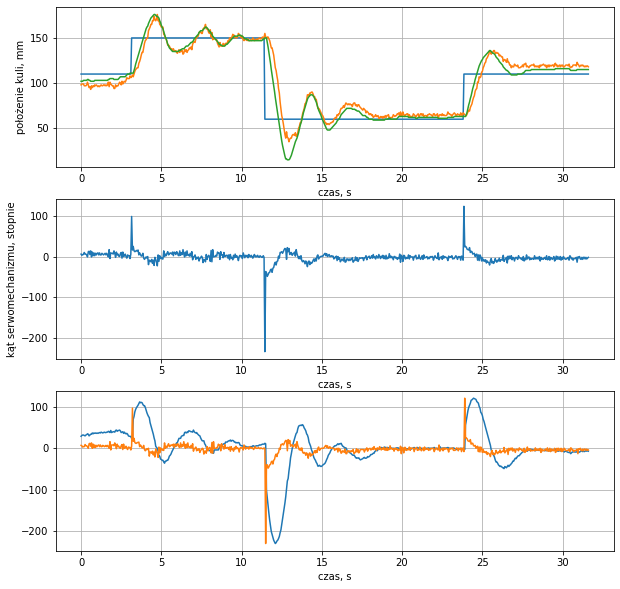

In [30]:
# PD 5, 20
d2=[[5,20,110,98,102,29,7,12,6,103,97],[5,20,110,99,102,31,6,11,3,103,100],[5,20,110,99,102,32,3,11,5,103,98],[5,20,110,99,103,32,4,11,5,103,98],[5,20,110,97,103,31,4,13,10,103,93],[5,20,110,97,103,30,9,13,6,103,97],[5,20,110,97,103,32,6,13,6,103,97],[5,20,110,98,103,33,6,12,4,103,99],[5,20,110,101,104,35,4,9,-1,103,104],[5,20,110,98,104,34,0,12,12,103,91],[5,20,110,95,103,30,11,15,13,103,90],[5,20,110,96,103,32,12,14,5,103,98],[5,20,110,93,102,34,5,17,14,103,89],[5,20,110,97,102,34,13,13,-1,103,104],[5,20,110,95,102,37,0,15,11,103,92],[5,20,110,97,102,35,10,13,2,103,101],[5,20,110,96,102,37,2,14,9,103,94],[5,20,110,98,103,36,8,12,2,103,101],[5,20,110,97,103,37,2,13,8,103,95],[5,20,110,98,103,36,7,12,4,103,99],[5,20,110,97,103,37,4,13,8,103,95],[5,20,110,96,103,36,7,14,9,103,94],[5,20,110,97,103,37,8,13,4,103,99],[5,20,110,96,103,38,4,14,9,103,94],[5,20,110,97,103,37,8,13,4,103,99],[5,20,110,98,103,39,4,12,4,103,99],[5,20,110,97,103,38,4,13,8,103,95],[5,20,110,97,103,37,7,13,6,103,97],[5,20,110,98,103,38,6,12,4,103,99],[5,20,110,98,103,39,4,12,6,103,97],[5,20,110,97,103,38,5,13,8,103,95],[5,20,110,98,103,38,7,12,4,103,99],[5,20,110,97,103,39,4,13,8,103,95],[5,20,110,98,103,39,7,12,4,103,99],[5,20,110,101,104,41,4,9,-1,103,104],[5,20,110,96,104,40,0,14,17,103,86],[5,20,110,101,105,38,16,9,-5,103,108],[5,20,110,99,105,43,-4,11,9,103,94],[5,20,110,98,105,38,8,12,8,103,95],[5,20,110,97,105,39,8,13,8,103,95],[5,20,110,97,105,40,8,13,6,103,97],[5,20,110,94,104,40,6,16,14,103,89],[5,20,110,94,104,39,13,16,8,103,95],[5,20,110,98,104,43,8,12,-2,103,105],[5,20,110,96,104,44,-1,14,11,103,92],[5,20,110,97,104,41,10,13,4,103,99],[5,20,110,97,104,43,4,13,6,103,97],[5,20,110,99,105,43,5,11,1,103,102],[5,20,110,101,106,44,1,9,0,103,103],[5,20,110,100,107,42,0,10,7,103,96],[5,20,110,98,107,38,6,12,10,103,93],[5,20,110,102,107,39,9,8,-4,103,107],[5,20,110,99,107,40,-3,11,11,103,92],[5,20,110,101,107,36,10,9,0,103,103],[5,20,110,102,107,39,0,8,2,103,101],[5,20,110,101,107,36,1,9,6,103,97],[5,20,110,103,108,35,5,7,0,103,103],[5,20,110,106,109,36,0,4,-4,103,107],[5,20,110,105,110,34,-3,5,4,103,99],[5,20,110,105,110,30,3,5,2,103,101],[5,20,110,105,110,29,2,5,2,103,101],[5,20,110,108,111,29,2,2,-5,103,108],[5,20,110,106,111,28,-4,4,6,103,97],[5,20,150,107,111,24,5,43,99,103,4],[5,20,150,109,111,25,97,41,16,103,87],[5,20,150,107,111,70,17,43,25,103,78],[5,20,150,110,114,77,24,40,14,103,89],[5,20,150,113,117,88,14,37,12,103,91],[5,20,150,115,121,94,12,35,13,103,90],[5,20,150,116,124,98,12,34,15,103,88],[5,20,150,117,127,101,14,33,14,103,89],[5,20,150,117,130,104,14,33,16,103,87],[5,20,150,122,133,108,15,28,4,103,99],[5,20,150,124,136,112,4,26,9,103,94],[5,20,150,127,139,110,8,23,5,103,98],[5,20,150,131,142,111,5,19,1,103,102],[5,20,150,134,145,110,1,16,2,103,101],[5,20,150,134,148,106,1,16,8,103,95],[5,20,150,139,151,103,7,11,-4,103,107],[5,20,150,144,154,103,-3,6,-7,103,110],[5,20,150,147,157,99,-6,3,-4,103,107],[5,20,150,148,160,92,-4,2,-1,103,104],[5,20,150,150,162,86,-1,0,-4,103,107],[5,20,150,150,163,81,-3,0,0,103,103],[5,20,150,158,166,77,0,-8,-20,103,123],[5,20,150,160,168,74,-19,-10,-9,103,112],[5,20,150,162,170,62,-9,-12,-10,103,113],[5,20,150,165,172,55,-9,-15,-13,103,116],[5,20,150,165,173,48,-12,-15,-7,103,110],[5,20,150,169,174,40,-7,-19,-17,103,120],[5,20,150,169,175,34,-16,-19,-9,103,112],[5,20,150,174,176,25,-9,-24,-22,103,125],[5,20,150,170,176,18,-21,-20,-2,103,105],[5,20,150,169,175,5,-2,-19,-7,103,110],[5,20,150,171,174,2,-6,-21,-14,103,117],[5,20,150,176,174,0,-13,-26,-23,103,126],[5,20,150,169,173,-8,-22,-19,4,103,99],[5,20,150,170,172,-19,3,-20,-12,103,115],[5,20,150,165,169,-19,-11,-15,2,103,101],[5,20,150,164,167,-26,1,-14,-5,103,108],[5,20,150,162,164,-27,-4,-12,-2,103,105],[5,20,150,162,162,-29,-2,-12,-6,103,109],[5,20,150,162,160,-29,-5,-12,-6,103,109],[5,20,150,154,157,-33,-5,-4,14,103,89],[5,20,150,153,154,-36,13,-3,0,103,103],[5,20,150,150,151,-31,0,0,6,103,97],[5,20,150,149,149,-31,5,1,2,103,101],[5,20,150,146,146,-29,2,4,8,103,95],[5,20,150,142,143,-29,7,8,12,103,91],[5,20,150,142,141,-25,11,8,4,103,99],[5,20,150,141,139,-19,4,9,6,103,97],[5,20,150,139,138,-17,5,11,9,103,94],[5,20,150,138,137,-14,8,12,8,103,95],[5,20,150,138,136,-9,8,12,6,103,97],[5,20,150,136,135,-5,6,14,11,103,92],[5,20,150,138,135,-1,10,12,2,103,101],[5,20,150,136,135,4,2,14,11,103,92],[5,20,150,135,135,4,10,15,9,103,94],[5,20,150,136,135,9,9,14,5,103,98],[5,20,150,134,135,13,5,16,12,103,91],[5,20,150,133,135,14,11,17,10,103,93],[5,20,150,135,135,19,10,15,3,103,100],[5,20,150,137,136,24,3,13,2,103,101],[5,20,150,134,136,24,2,16,14,103,89],[5,20,150,136,137,24,13,14,3,103,100],[5,20,150,135,137,29,3,15,9,103,94],[5,20,150,136,138,30,8,14,5,103,98],[5,20,150,132,138,31,5,18,17,103,86],[5,20,150,133,138,31,16,17,6,103,97],[5,20,150,137,139,38,6,13,-1,103,104],[5,20,150,135,140,39,0,15,11,103,92],[5,20,150,137,141,37,10,13,2,103,101],[5,20,150,134,141,39,2,16,14,103,89],[5,20,150,136,141,38,13,14,3,103,100],[5,20,150,137,142,42,3,13,4,103,99],[5,20,150,139,143,42,3,11,1,103,102],[5,20,150,138,144,41,1,12,8,103,95],[5,20,150,140,145,40,7,10,1,103,102],[5,20,150,137,145,40,1,13,12,103,91],[5,20,150,143,146,39,11,7,-8,103,111],[5,20,150,145,147,44,-7,5,-1,103,104],[5,20,150,146,149,40,-1,4,0,103,103],[5,20,150,145,150,38,0,5,4,103,99],[5,20,150,149,151,37,3,1,-7,103,110],[5,20,150,150,152,38,-6,0,-2,103,105],[5,20,150,152,153,35,-2,-2,-5,103,108],[5,20,150,152,154,33,-4,-2,-1,103,104],[5,20,150,156,156,31,-1,-6,-11,103,114],[5,20,150,157,157,30,-10,-7,-5,103,108],[5,20,150,157,158,25,-5,-7,-3,103,106],[5,20,150,155,158,21,-3,-5,1,103,102],[5,20,150,155,158,18,0,-5,-2,103,105],[5,20,150,160,159,18,-1,-10,-15,103,118],[5,20,150,161,160,18,-14,-11,-7,103,110],[5,20,150,162,161,11,-7,-12,-8,103,111],[5,20,150,165,162,8,-7,-15,-13,103,116],[5,20,150,160,162,3,-12,-10,5,103,98],[5,20,150,161,161,-3,4,-11,-7,103,110],[5,20,150,159,160,-1,-6,-9,0,103,103],[5,20,150,156,159,-5,0,-6,3,103,100],[5,20,150,155,157,-6,2,-5,0,103,103],[5,20,150,159,157,-4,0,-9,-12,103,115],[5,20,150,151,155,-6,-11,-1,15,103,88],[5,20,150,156,154,-11,14,-6,-13,103,116],[5,20,150,148,152,-6,-12,2,17,103,86],[5,20,150,149,151,-12,16,1,-1,103,104],[5,20,150,149,150,-4,0,1,0,103,103],[5,20,150,149,149,-4,0,1,0,103,103],[5,20,150,148,148,-4,0,2,3,103,100],[5,20,150,148,147,-4,2,2,1,103,102],[5,20,150,144,146,-4,1,6,11,103,92],[5,20,150,142,145,-4,10,8,8,103,95],[5,20,150,140,143,0,8,10,9,103,94],[5,20,150,145,143,4,8,5,-7,103,110],[5,20,150,141,142,7,-6,9,12,103,91],[5,20,150,141,142,3,11,9,4,103,99],[5,20,150,141,141,8,4,9,4,103,99],[5,20,150,144,141,10,4,6,-3,103,106],[5,20,150,141,141,11,-2,9,10,103,93],[5,20,150,143,141,10,9,7,0,103,103],[5,20,150,144,142,15,0,6,1,103,102],[5,20,150,144,143,15,0,6,3,103,100],[5,20,150,144,143,15,2,6,3,103,100],[5,20,150,147,144,17,2,3,-4,103,107],[5,20,150,146,145,18,-3,4,4,103,99],[5,20,150,150,146,18,3,0,-8,103,111],[5,20,150,148,147,20,-7,2,5,103,98],[5,20,150,150,148,17,4,0,-4,103,107],[5,20,150,151,149,19,-3,-1,-2,103,105],[5,20,150,154,150,19,-2,-4,-8,103,111],[5,20,150,152,151,18,-7,-2,3,103,100],[5,20,150,153,152,15,2,-3,-3,103,106],[5,20,150,150,152,15,-2,0,6,103,97],[5,20,150,151,152,13,5,-1,-2,103,105],[5,20,150,150,152,14,-1,0,2,103,101],[5,20,150,151,152,13,1,-1,-2,103,105],[5,20,150,155,153,14,-1,-5,-10,103,113],[5,20,150,154,153,13,-9,-4,0,103,103],[5,20,150,152,153,8,0,-2,3,103,100],[5,20,150,151,153,7,2,-1,1,103,102],[5,20,150,150,152,6,1,0,2,103,101],[5,20,150,152,152,6,1,-2,-5,103,108],[5,20,150,148,151,5,-4,2,9,103,94],[5,20,150,147,150,1,8,3,3,103,100],[5,20,150,149,149,4,3,1,-3,103,106],[5,20,150,148,149,5,-2,2,3,103,100],[5,20,150,148,149,3,2,2,1,103,102],[5,20,150,147,148,3,1,3,3,103,100],[5,20,150,149,148,3,2,1,-3,103,106],[5,20,150,147,147,3,-2,3,5,103,98],[5,20,150,147,147,2,4,3,1,103,102],[5,20,150,148,147,4,1,2,-1,103,104],[5,20,150,147,147,4,0,3,3,103,100],[5,20,150,148,147,4,2,2,-1,103,104],[5,20,150,150,147,6,0,0,-4,103,107],[5,20,150,149,147,6,-3,1,2,103,101],[5,20,150,147,147,4,1,3,5,103,98],[5,20,150,148,147,4,4,2,-1,103,104],[5,20,150,148,147,6,0,2,1,103,102],[5,20,150,149,147,6,0,1,-1,103,104],[5,20,150,148,147,6,0,2,3,103,100],[5,20,150,149,147,6,2,1,-1,103,104],[5,20,150,150,147,8,0,0,-2,103,105],[5,20,150,149,147,8,-1,1,2,103,101],[5,20,150,149,147,8,1,1,0,103,103],[5,20,150,150,147,9,0,0,-2,103,105],[5,20,150,151,148,10,-1,-1,-2,103,105],[5,20,150,150,148,10,-1,0,2,103,101],[5,20,150,151,149,10,1,-1,-2,103,105],[5,20,60,155,150,12,-1,-95,-235,103,180],[5,20,60,151,150,11,-230,-91,-37,103,140],[5,20,60,149,150,-101,-40,-89,-40,103,143],[5,20,60,151,145,-120,-40,-91,-49,103,152],[5,20,60,151,140,-137,-48,-91,-45,103,148],[5,20,60,149,134,-157,-45,-89,-40,103,143],[5,20,60,147,128,-174,-40,-87,-39,103,142],[5,20,60,143,122,-188,-39,-83,-33,103,136],[5,20,60,139,115,-201,-33,-79,-31,103,134],[5,20,60,139,109,-208,-31,-79,-39,103,142],[5,20,60,135,103,-214,-38,-75,-29,103,132],[5,20,60,131,97,-222,-29,-71,-27,103,130],[5,20,60,124,91,-226,-27,-64,-18,103,121],[5,20,60,117,84,-230,-18,-57,-14,103,117],[5,20,60,114,78,-228,-14,-54,-21,103,124],[5,20,60,108,72,-224,-20,-48,-12,103,115],[5,20,60,103,66,-222,-12,-43,-11,103,114],[5,20,60,94,60,-218,-11,-34,1,103,102],[5,20,60,89,54,-213,0,-29,-4,103,107],[5,20,60,79,48,-204,-3,-19,10,103,93],[5,20,60,71,42,-197,9,-11,10,103,93],[5,20,60,64,36,-184,9,-4,12,103,91],[5,20,60,60,31,-171,11,0,8,103,95],[5,20,60,55,27,-157,8,5,12,103,91],[5,20,60,49,23,-145,11,11,17,103,86],[5,20,60,43,19,-132,16,17,20,103,83],[5,20,60,39,16,-117,19,21,18,103,85],[5,20,60,46,16,-97,18,14,-7,103,110],[5,20,60,40,15,-79,-6,20,22,103,81],[5,20,60,39,15,-73,21,21,12,103,91],[5,20,60,35,15,-55,12,25,20,103,83],[5,20,60,38,16,-41,19,22,5,103,98],[5,20,60,39,18,-23,5,21,8,103,95],[5,20,60,39,20,-13,7,21,10,103,93],[5,20,60,42,23,-1,9,18,3,103,100],[5,20,60,43,26,10,3,17,6,103,97],[5,20,60,43,29,17,5,17,8,103,95],[5,20,60,42,32,23,7,18,11,103,92],[5,20,60,45,35,30,10,15,1,103,102],[5,20,60,41,37,36,1,19,17,103,86],[5,20,60,42,39,38,16,18,7,103,96],[5,20,60,45,42,47,7,15,1,103,102],[5,20,60,50,45,53,1,10,-5,103,108],[5,20,60,52,49,55,-4,8,0,103,103],[5,20,60,56,53,55,0,4,-6,103,109],[5,20,60,56,56,56,-5,4,2,103,101],[5,20,60,61,59,55,1,-1,-10,103,113],[5,20,60,66,63,57,-9,-6,-13,103,116],[5,20,60,69,67,54,-12,-9,-10,103,113],[5,20,60,72,70,49,-10,-12,-12,103,115],[5,20,60,77,73,46,-11,-17,-18,103,121],[5,20,60,78,76,42,-17,-18,-11,103,114],[5,20,60,81,79,35,-11,-21,-16,103,119],[5,20,60,87,82,32,-15,-27,-25,103,128],[5,20,60,87,84,26,-24,-27,-13,103,116],[5,20,60,86,85,15,-13,-26,-11,103,114],[5,20,60,89,86,10,-11,-29,-20,103,123],[5,20,60,89,87,5,-19,-29,-14,103,117],[5,20,60,90,87,-3,-14,-30,-17,103,120],[5,20,60,90,87,-8,-16,-30,-15,103,118],[5,20,60,88,86,-15,-15,-28,-10,103,113],[5,20,60,85,85,-22,-10,-25,-6,103,109],[5,20,60,85,83,-26,-6,-25,-12,103,115],[5,20,60,82,81,-29,-11,-22,-5,103,108],[5,20,60,82,79,-34,-5,-22,-11,103,114],[5,20,60,77,76,-37,-10,-17,1,103,102],[5,20,60,72,73,-43,0,-12,4,103,99],[5,20,60,72,70,-43,3,-12,-6,103,109],[5,20,60,71,68,-41,-5,-11,-3,103,106],[5,20,60,69,66,-43,-3,-9,0,103,103],[5,20,60,67,64,-44,0,-7,0,103,103],[5,20,60,65,61,-43,0,-5,1,103,102],[5,20,60,64,59,-41,0,-4,0,103,103],[5,20,60,62,57,-39,0,-2,3,103,100],[5,20,60,59,55,-38,2,1,6,103,97],[5,20,60,56,53,-36,5,4,8,103,95],[5,20,60,56,51,-32,7,4,2,103,101],[5,20,60,54,49,-27,2,6,7,103,96],[5,20,60,55,48,-23,6,5,0,103,103],[5,20,60,55,48,-17,0,5,2,103,101],[5,20,60,54,48,-14,1,6,5,103,98],[5,20,60,55,48,-11,4,5,0,103,103],[5,20,60,56,49,-6,0,4,0,103,103],[5,20,60,56,50,-3,0,4,2,103,101],[5,20,60,57,51,0,1,3,0,103,103],[5,20,60,57,52,2,0,3,1,103,102],[5,20,60,60,53,4,0,0,-6,103,109],[5,20,60,61,54,6,-5,-1,-2,103,105],[5,20,60,62,55,6,-2,-2,-3,103,106],[5,20,60,61,56,7,-2,-1,1,103,102],[5,20,60,65,58,9,0,-5,-10,103,113],[5,20,60,64,59,11,-9,-4,0,103,103],[5,20,60,66,60,9,0,-6,-7,103,110],[5,20,60,66,61,11,-6,-6,-3,103,106],[5,20,60,70,63,11,-3,-10,-13,103,116],[5,20,60,72,65,12,-12,-12,-10,103,113],[5,20,60,72,66,8,-10,-12,-6,103,109],[5,20,60,73,67,5,-6,-13,-8,103,111],[5,20,60,75,68,4,-7,-15,-11,103,114],[5,20,60,73,69,2,-10,-13,-2,103,105],[5,20,60,76,70,0,-2,-16,-14,103,117],[5,20,60,78,71,1,-13,-18,-13,103,116],[5,20,60,77,72,-3,-13,-17,-6,103,109],[5,20,60,76,72,-7,-6,-16,-6,103,109],[5,20,60,77,72,-8,-6,-17,-10,103,113],[5,20,60,76,72,-9,-9,-16,-6,103,109],[5,20,60,77,72,-11,-6,-17,-10,103,113],[5,20,60,76,72,-12,-9,-16,-6,103,109],[5,20,60,76,72,-14,-6,-16,-8,103,111],[5,20,60,74,71,-16,-7,-14,-3,103,106],[5,20,60,77,71,-17,-3,-17,-14,103,117],[5,20,60,78,71,-16,-13,-18,-11,103,114],[5,20,60,78,71,-19,-11,-18,-9,103,112],[5,20,60,75,70,-22,-9,-15,-1,103,104],[5,20,60,76,70,-24,-1,-16,-10,103,113],[5,20,60,74,69,-23,-9,-14,-3,103,106],[5,20,60,76,69,-24,-3,-16,-12,103,115],[5,20,60,76,69,-23,-11,-16,-8,103,111],[5,20,60,74,68,-26,-8,-14,-3,103,106],[5,20,60,73,67,-28,-3,-13,-4,103,107],[5,20,60,72,66,-27,-3,-12,-4,103,107],[5,20,60,71,65,-26,-3,-11,-3,103,106],[5,20,60,70,64,-25,-3,-10,-3,103,106],[5,20,60,72,64,-23,-3,-12,-10,103,113],[5,20,60,71,64,-22,-9,-11,-3,103,106],[5,20,60,70,64,-24,-3,-10,-3,103,106],[5,20,60,67,63,-24,-3,-7,2,103,101],[5,20,60,69,62,-23,1,-9,-8,103,111],[5,20,60,68,62,-20,-7,-8,-2,103,105],[5,20,60,67,61,-21,-2,-7,-1,103,104],[5,20,60,65,60,-20,-1,-5,1,103,102],[5,20,60,66,60,-18,0,-6,-5,103,108],[5,20,60,66,60,-15,-4,-6,-3,103,106],[5,20,60,64,60,-15,-3,-4,2,103,101],[5,20,60,65,60,-14,1,-5,-4,103,107],[5,20,60,62,59,-12,-3,-2,5,103,98],[5,20,60,63,59,-12,4,-3,-3,103,106],[5,20,60,63,59,-8,-2,-3,-1,103,104],[5,20,60,65,59,-6,-1,-5,-6,103,109],[5,20,60,63,59,-5,-5,-3,2,103,101],[5,20,60,63,59,-6,1,-3,-1,103,104],[5,20,60,64,59,-3,0,-4,-4,103,107],[5,20,60,61,59,-2,-3,-1,5,103,98],[5,20,60,61,59,-2,4,-1,0,103,103],[5,20,60,63,59,1,0,-3,-5,103,108],[5,20,60,62,59,2,-4,-2,1,103,102],[5,20,60,63,59,1,0,-3,-3,103,106],[5,20,60,61,59,1,-2,-1,3,103,100],[5,20,60,63,59,1,2,-3,-5,103,108],[5,20,60,62,59,3,-4,-2,1,103,102],[5,20,60,64,60,2,0,-4,-6,103,109],[5,20,60,62,60,2,-5,-2,3,103,100],[5,20,60,64,60,0,2,-4,-6,103,109],[5,20,60,64,60,2,-5,-4,-2,103,105],[5,20,60,65,61,1,-2,-5,-4,103,107],[5,20,60,61,61,0,-3,-1,7,103,96],[5,20,60,62,61,-1,6,-2,-3,103,106],[5,20,60,61,60,1,-2,-1,1,103,102],[5,20,60,62,60,0,0,-2,-3,103,106],[5,20,60,62,60,0,-2,-2,-1,103,104],[5,20,60,65,60,0,-1,-5,-8,103,111],[5,20,60,64,60,0,-7,-4,0,103,103],[5,20,60,63,60,-2,0,-3,0,103,103],[5,20,60,64,60,0,0,-4,-4,103,107],[5,20,60,64,60,1,-3,-4,-2,103,105],[5,20,60,66,61,1,-2,-6,-7,103,110],[5,20,60,66,62,1,-6,-6,-3,103,106],[5,20,60,67,63,0,-3,-7,-5,103,108],[5,20,60,63,63,-1,-4,-3,6,103,97],[5,20,60,68,63,-1,5,-8,-14,103,117],[5,20,60,65,63,2,-13,-5,3,103,100],[5,20,60,64,63,-3,2,-4,0,103,103],[5,20,60,68,63,0,0,-8,-12,103,115],[5,20,60,65,63,0,-11,-5,3,103,100],[5,20,60,63,63,-5,2,-3,2,103,101],[5,20,60,65,63,-3,2,-5,-6,103,109],[5,20,60,65,63,-1,-5,-5,-2,103,105],[5,20,60,66,63,-2,-2,-6,-5,103,108],[5,20,60,66,63,-1,-4,-6,-3,103,106],[5,20,60,63,62,-2,-3,-3,4,103,99],[5,20,60,65,62,-2,3,-5,-6,103,109],[5,20,60,63,62,0,-5,-3,2,103,101],[5,20,60,63,62,-2,1,-3,-1,103,104],[5,20,60,63,62,-1,0,-3,-1,103,104],[5,20,60,63,62,0,0,-3,-1,103,104],[5,20,60,66,62,1,0,-6,-9,103,112],[5,20,60,65,62,2,-8,-5,0,103,103],[5,20,60,64,62,-1,0,-4,0,103,103],[5,20,60,62,61,-1,0,-2,3,103,100],[5,20,60,64,61,0,2,-4,-6,103,109],[5,20,60,65,61,2,-5,-5,-4,103,107],[5,20,60,66,62,1,-4,-6,-5,103,108],[5,20,60,63,62,0,-4,-3,4,103,99],[5,20,60,64,62,-1,3,-4,-4,103,107],[5,20,60,66,62,1,-3,-6,-7,103,110],[5,20,60,66,62,0,-6,-6,-3,103,106],[5,20,60,64,62,-2,-3,-4,2,103,101],[5,20,60,66,62,-2,1,-6,-7,103,110],[5,20,60,63,62,-1,-6,-3,4,103,99],[5,20,60,64,62,-3,3,-4,-4,103,107],[5,20,60,64,62,0,-3,-4,-2,103,105],[5,20,60,64,62,0,-2,-4,-2,103,105],[5,20,60,63,62,0,-2,-3,0,103,103],[5,20,60,65,62,0,0,-5,-6,103,109],[5,20,60,65,62,1,-5,-5,-2,103,105],[5,20,60,66,62,0,-2,-6,-5,103,108],[5,20,60,65,62,0,-4,-5,0,103,103],[5,20,60,65,62,0,0,-5,-2,103,105],[5,20,60,64,62,0,-1,-4,0,103,103],[5,20,60,63,62,0,0,-3,0,103,103],[5,20,60,66,62,1,0,-6,-9,103,112],[5,20,60,66,62,2,-8,-6,-3,103,106],[5,20,60,64,62,-1,-3,-4,2,103,101],[5,20,60,64,62,-1,1,-4,-2,103,105],[5,20,60,65,62,0,-1,-5,-4,103,107],[5,20,60,66,62,0,-3,-6,-5,103,108],[5,20,60,61,61,-1,-4,-1,9,103,94],[5,20,60,64,61,-1,8,-4,-8,103,111],[5,20,60,65,61,4,-7,-5,-4,103,107],[5,20,60,65,61,1,-4,-5,-2,103,105],[5,20,60,64,61,0,-2,-4,0,103,103],[5,20,60,66,61,0,0,-6,-7,103,110],[5,20,60,64,61,1,-6,-4,2,103,101],[5,20,60,65,61,0,1,-5,-4,103,107],[5,20,60,64,61,1,-3,-4,0,103,103],[5,20,60,64,61,0,0,-4,-2,103,105],[5,20,60,64,61,1,-1,-4,-2,103,105],[5,20,60,65,61,1,-1,-5,-4,103,107],[5,20,60,68,62,2,-3,-8,-10,103,113],[5,20,60,66,62,1,-9,-6,1,103,102],[5,20,60,66,62,-1,0,-6,-3,103,106],[5,20,60,65,62,0,-2,-5,0,103,103],[5,20,60,65,62,0,0,-5,-2,103,105],[5,20,60,63,62,0,-1,-3,2,103,101],[5,20,60,65,62,0,1,-5,-6,103,109],[5,20,60,66,62,1,-5,-6,-5,103,108],[5,20,60,67,63,0,-5,-7,-5,103,108],[5,20,60,66,63,-1,-5,-6,-1,103,104],[5,20,60,64,63,-3,-1,-4,2,103,101],[5,20,60,64,63,-3,1,-4,-2,103,105],[5,20,60,66,63,-1,-1,-6,-7,103,110],[5,20,60,65,63,0,-6,-5,0,103,103],[5,20,60,65,63,-2,0,-5,-2,103,105],[5,20,60,64,63,-1,-1,-4,0,103,103],[5,20,60,67,63,0,0,-7,-9,103,112],[5,20,60,65,63,0,-8,-5,1,103,102],[5,20,60,64,63,-3,0,-4,0,103,103],[5,20,60,67,63,-1,0,-7,-9,103,112],[5,20,110,66,63,0,-8,44,124,103,0],[5,20,110,65,63,-3,121,45,24,103,79],[5,20,110,64,63,56,25,46,25,103,78],[5,20,110,64,65,68,25,46,23,103,80],[5,20,110,66,68,80,23,44,18,103,85],[5,20,110,68,72,91,18,42,17,103,86],[5,20,110,70,76,99,17,40,16,103,87],[5,20,110,69,79,104,16,41,22,103,81],[5,20,110,73,83,109,21,37,10,103,93],[5,20,110,75,86,116,10,35,13,103,90],[5,20,110,77,90,117,12,33,12,103,91],[5,20,110,81,94,119,12,29,6,103,97],[5,20,110,84,97,121,6,26,7,103,96],[5,20,110,86,100,120,6,24,8,103,95],[5,20,110,91,104,119,7,19,0,103,103],[5,20,110,93,107,118,0,17,4,103,99],[5,20,110,94,110,113,3,16,6,103,97],[5,20,110,101,113,111,5,9,-9,103,112],[5,20,110,101,116,109,-8,9,4,103,99],[5,20,110,107,119,101,3,3,-10,103,113],[5,20,110,106,121,97,-9,4,4,103,99],[5,20,110,107,123,87,3,3,0,103,103],[5,20,110,112,125,84,0,-2,-11,103,114],[5,20,110,113,126,79,-10,-3,-3,103,106],[5,20,110,117,128,70,-3,-7,-11,103,114],[5,20,110,119,129,65,-10,-9,-8,103,111],[5,20,110,122,130,57,-8,-12,-12,103,115],[5,20,110,123,131,50,-11,-13,-8,103,111],[5,20,110,127,132,43,-8,-17,-16,103,119],[5,20,110,128,133,37,-15,-18,-11,103,114],[5,20,110,130,134,28,-11,-20,-14,103,117],[5,20,110,132,135,21,-13,-22,-15,103,118],[5,20,110,136,136,15,-14,-26,-21,103,124],[5,20,110,135,136,7,-20,-25,-10,103,113],[5,20,110,132,135,-4,-10,-22,-5,103,108],[5,20,110,134,134,-9,-5,-24,-16,103,119],[5,20,110,134,133,-11,-15,-24,-12,103,115],[5,20,110,136,133,-17,-12,-26,-17,103,120],[5,20,110,136,132,-21,-16,-26,-13,103,116],[5,20,110,133,131,-28,-13,-23,-5,103,108],[5,20,110,133,129,-33,-5,-23,-11,103,114],[5,20,110,134,128,-33,-10,-24,-14,103,117],[5,20,110,133,127,-36,-13,-23,-9,103,112],[5,20,110,133,126,-40,-9,-23,-11,103,114],[5,20,110,130,124,-42,-10,-20,-4,103,107],[5,20,110,131,123,-44,-4,-21,-12,103,115],[5,20,110,130,122,-43,-11,-20,-8,103,111],[5,20,110,129,121,-45,-8,-19,-7,103,110],[5,20,110,129,120,-46,-7,-19,-9,103,112],[5,20,110,124,118,-48,-8,-14,3,103,100],[5,20,110,126,117,-49,2,-16,-12,103,115],[5,20,110,126,116,-44,-11,-16,-8,103,111],[5,20,110,125,115,-46,-8,-15,-5,103,108],[5,20,110,123,114,-47,-5,-13,-2,103,105],[5,20,110,127,114,-44,-2,-17,-16,103,119],[5,20,110,123,113,-41,-15,-13,1,103,102],[5,20,110,123,112,-44,0,-13,-6,103,109],[5,20,110,120,111,-41,-5,-10,1,103,102],[5,20,110,120,110,-40,0,-10,-5,103,108],[5,20,110,117,109,-37,-4,-7,2,103,101],[5,20,110,119,109,-35,1,-9,-8,103,111],[5,20,110,118,109,-31,-7,-8,-2,103,105],[5,20,110,118,109,-31,-2,-8,-4,103,107],[5,20,110,121,109,-27,-3,-11,-11,103,114],[5,20,110,120,109,-24,-10,-10,-3,103,106],[5,20,110,119,109,-25,-3,-9,-2,103,105],[5,20,110,119,109,-22,-2,-9,-4,103,107],[5,20,110,120,110,-19,-3,-10,-7,103,110],[5,20,110,117,110,-18,-6,-7,2,103,101],[5,20,110,117,110,-18,1,-7,-3,103,106],[5,20,110,117,110,-15,-2,-7,-3,103,106],[5,20,110,118,110,-13,-2,-8,-6,103,109],[5,20,110,118,110,-11,-5,-8,-4,103,107],[5,20,110,120,111,-9,-4,-10,-9,103,112],[5,20,110,118,111,-8,-8,-8,0,103,103],[5,20,110,121,112,-8,0,-11,-11,103,114],[5,20,110,121,113,-4,-10,-11,-5,103,108],[5,20,110,122,114,-5,-5,-12,-8,103,111],[5,20,110,118,114,-6,-7,-8,4,103,99],[5,20,110,119,114,-7,3,-9,-6,103,109],[5,20,110,118,114,-4,-5,-8,-2,103,105],[5,20,110,117,114,-5,-2,-7,-1,103,104],[5,20,110,119,114,-4,-1,-9,-8,103,111],[5,20,110,119,114,-2,-7,-9,-4,103,107],[5,20,110,120,115,-3,-4,-10,-7,103,110],[5,20,110,120,115,-3,-6,-10,-5,103,108],[5,20,110,120,115,-4,-5,-10,-5,103,108],[5,20,110,121,115,-4,-5,-11,-7,103,110],[5,20,110,118,115,-5,-6,-8,2,103,101],[5,20,110,119,115,-6,1,-9,-6,103,109],[5,20,110,118,115,-4,-5,-8,-2,103,105],[5,20,110,119,115,-5,-2,-9,-6,103,109],[5,20,110,118,115,-4,-5,-8,-2,103,105],[5,20,110,119,115,-5,-2,-9,-6,103,109],[5,20,110,117,115,-5,-5,-7,0,103,103],[5,20,110,120,115,-5,0,-10,-11,103,114],[5,20,110,119,115,-3,-10,-9,-2,103,105],[5,20,110,120,115,-6,-2,-10,-7,103,110],[5,20,110,120,115,-5,-6,-10,-5,103,108],[5,20,110,121,115,-5,-5,-11,-7,103,110],[5,20,110,120,115,-5,-6,-10,-3,103,106],[5,20,110,119,115,-6,-3,-9,-2,103,105],[5,20,110,120,115,-5,-2,-10,-7,103,110],[5,20,110,117,115,-5,-6,-7,2,103,101],[5,20,110,119,115,-6,1,-9,-8,103,111],[5,20,110,120,115,-3,-7,-10,-7,103,110],[5,20,110,118,115,-5,-7,-8,0,103,103],[5,20,110,120,115,-6,0,-10,-9,103,112],[5,20,110,119,115,-4,-8,-9,-2,103,105],[5,20,110,119,115,-6,-2,-9,-4,103,107],[5,20,110,120,115,-5,-3,-10,-7,103,110],[5,20,110,120,115,-4,-6,-10,-5,103,108],[5,20,110,118,115,-5,-5,-8,0,103,103],[5,20,110,121,115,-5,0,-11,-11,103,114],[5,20,110,122,116,-2,-10,-12,-8,103,111],[5,20,110,119,116,-5,-8,-9,1,103,102],[5,20,110,120,116,-7,0,-10,-7,103,110],[5,20,110,118,116,-6,-6,-8,0,103,103],[5,20,110,119,116,-7,0,-9,-6,103,109],[5,20,110,120,116,-5,-5,-10,-7,103,110],[5,20,110,118,116,-6,-6,-8,0,103,103],[5,20,110,120,116,-7,0,-10,-9,103,112],[5,20,110,119,116,-5,-8,-9,-2,103,105],[5,20,110,120,116,-7,-2,-10,-7,103,110],[5,20,110,118,116,-7,-6,-8,0,103,103],[5,20,110,118,116,-9,0,-8,-4,103,107],[5,20,110,119,116,-7,-3,-9,-6,103,109],[5,20,110,120,116,-7,-5,-10,-7,103,110],[5,20,110,120,116,-8,-6,-10,-5,103,108],[5,20,110,120,116,-9,-5,-10,-5,103,108],[5,20,110,119,116,-10,-5,-9,-2,103,105],[5,20,110,121,116,-10,-2,-11,-9,103,112],[5,20,110,118,115,-10,-8,-8,2,103,101],[5,20,110,117,114,-13,1,-7,-1,103,104],[5,20,110,118,114,-11,0,-8,-6,103,109],[5,20,110,118,114,-9,-5,-8,-4,103,107],[5,20,110,120,114,-9,-4,-10,-9,103,112],[5,20,110,120,114,-8,-8,-10,-5,103,108],[5,20,110,120,114,-9,-5,-10,-5,103,108],[5,20,110,120,114,-9,-5,-10,-5,103,108],[5,20,110,119,114,-9,-5,-9,-2,103,105],[5,20,110,123,115,-8,-2,-13,-14,103,117],[5,20,110,121,115,-6,-13,-11,-1,103,104],[5,20,110,120,115,-10,-1,-10,-3,103,106],[5,20,110,118,115,-9,-2,-8,0,103,103],[5,20,110,119,115,-8,0,-9,-6,103,109],[5,20,110,120,115,-6,-5,-10,-7,103,110],[5,20,110,119,115,-7,-6,-9,-2,103,105],[5,20,110,120,115,-8,-2,-10,-7,103,110],[5,20,110,119,115,-7,-6,-9,-2,103,105],[5,20,110,118,115,-8,-2,-8,-2,103,105],[5,20,110,119,115,-7,-2,-9,-6,103,109],[5,20,110,118,115,-6,-5,-8,-2,103,105],[5,20,110,119,115,-7,-2,-9,-6,103,109],[5,20,110,119,115,-6,-5,-9,-4,103,107],[5,20,110,118,115,-7,-4,-8,-2,103,105],[5,20,110,120,115,-7,-2,-10,-9,103,112]]
show(d2)

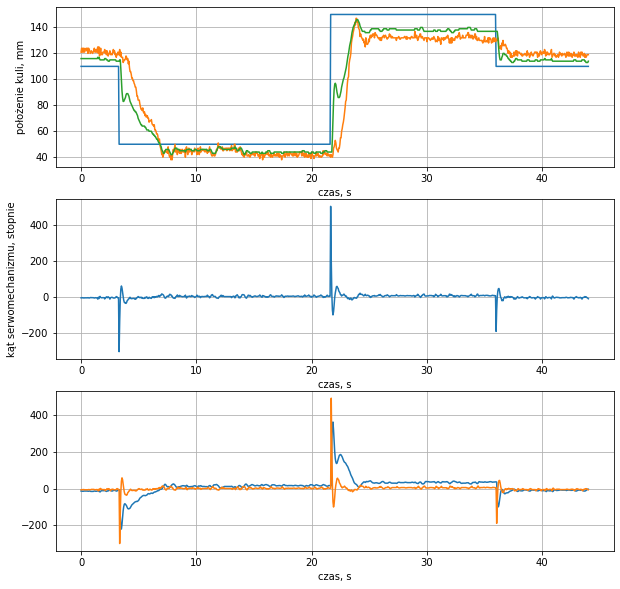

In [31]:
#from state
#50 15 6
#K, S, E = control.dlqr(dsys, [[100, 0, 0], [0, 1, 0], [0,0,1]], 1)
d3=[[50,15,110,121,116,-13,-6,-11,-6,103,109],[50,15,110,124,116,-13,-6,-14,-6,103,109],[50,15,110,121,116,-14,-6,-11,-5,103,108],[50,15,110,124,116,-14,-5,-14,-6,103,109],[50,15,110,121,116,-14,-5,-11,-6,103,109],[50,15,110,124,116,-13,-5,-14,-7,103,110],[50,15,110,121,116,-13,-6,-11,-6,103,109],[50,15,110,123,116,-13,-6,-13,-6,103,109],[50,15,110,123,116,-13,-6,-13,-6,103,109],[50,15,110,124,116,-13,-6,-14,-6,103,109],[50,15,110,122,116,-13,-6,-12,-6,103,109],[50,15,110,124,116,-13,-6,-14,-6,103,109],[50,15,110,120,116,-14,-6,-10,-5,103,108],[50,15,110,124,116,-14,-5,-14,-6,103,109],[50,15,110,123,116,-13,-5,-13,-7,103,110],[50,15,110,122,116,-13,-6,-12,-6,103,109],[50,15,110,120,116,-14,-6,-10,-5,103,108],[50,15,110,121,116,-15,-5,-11,-4,103,107],[50,15,110,122,116,-15,-4,-12,-5,103,108],[50,15,110,121,116,-15,-4,-11,-5,103,108],[50,15,110,120,116,-15,-4,-10,-5,103,108],[50,15,110,121,116,-15,-4,-11,-5,103,108],[50,15,110,122,116,-14,-4,-12,-6,103,109],[50,15,110,124,116,-13,-5,-14,-7,103,110],[50,15,110,121,116,-13,-6,-11,-6,103,109],[50,15,110,121,116,-14,-6,-11,-5,103,108],[50,15,110,123,116,-14,-5,-13,-6,103,109],[50,15,110,121,116,-14,-5,-11,-6,103,109],[50,15,110,123,116,-13,-5,-13,-7,103,110],[50,15,110,125,117,-12,-6,-15,-13,103,116],[50,15,110,120,116,-13,-12,-10,-3,103,106],[50,15,110,125,117,-15,-3,-15,-10,103,113],[50,15,110,118,116,-16,-9,-8,0,103,103],[50,15,110,120,115,-18,0,-10,2,103,101],[50,15,110,124,115,-14,1,-14,-4,103,107],[50,15,110,119,115,-12,-3,-9,-5,103,108],[50,15,110,120,115,-11,-4,-10,-6,103,109],[50,15,110,119,115,-11,-5,-9,-5,103,108],[50,15,110,121,115,-11,-5,-11,-5,103,108],[50,15,110,121,115,-11,-5,-11,-5,103,108],[50,15,110,121,115,-11,-5,-11,-5,103,108],[50,15,110,123,116,-10,-5,-13,-12,103,115],[50,15,110,120,116,-11,-11,-10,-6,103,109],[50,15,110,122,116,-14,-6,-12,-5,103,108],[50,15,110,119,115,-15,-5,-9,0,103,103],[50,15,110,122,115,-14,0,-12,-4,103,107],[50,15,110,119,115,-12,-3,-9,-5,103,108],[50,15,110,118,114,-12,-4,-8,0,103,103],[50,15,110,120,114,-11,0,-10,-3,103,106],[50,15,110,120,114,-8,-2,-10,-6,103,109],[50,15,110,122,115,-6,-5,-12,-13,103,116],[50,15,110,119,115,-7,-12,-9,-7,103,110],[50,15,110,120,115,-11,-7,-10,-4,103,107],[50,15,110,119,115,-13,-4,-9,-3,103,106],[50,15,110,119,115,-13,-3,-9,-3,103,106],[50,15,110,121,115,-12,-3,-11,-5,103,108],[50,15,110,123,115,-10,-4,-13,-7,103,110],[50,15,110,121,115,-9,-6,-11,-7,103,110],[50,15,110,122,115,-9,-6,-12,-7,103,110],[50,15,110,119,115,-10,-6,-9,-6,103,109],[50,15,110,120,115,-11,-6,-10,-4,103,107],[50,15,110,117,114,-13,-4,-7,1,103,102],[50,15,110,119,114,-13,0,-9,0,103,103],[50,15,110,119,114,-11,0,-9,-3,103,106],[50,15,110,121,114,-8,-2,-11,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,50,120,114,-7,-5,-70,-306,103,180],[50,15,50,123,115,-6,-299,-73,-136,103,180],[50,15,50,118,115,-150,-139,-68,-16,103,119],[50,15,50,121,108,-215,-18,-71,43,103,60],[50,15,50,117,99,-220,41,-67,60,103,43],[50,15,50,117,91,-193,59,-67,49,103,54],[50,15,50,117,86,-155,49,-67,23,103,80],[50,15,50,113,83,-121,23,-63,2,103,101],[50,15,50,114,83,-98,2,-64,-19,103,122],[50,15,50,115,84,-85,-18,-65,-31,103,134],[50,15,50,115,85,-82,-30,-65,-34,103,137],[50,15,50,116,86,-85,-33,-66,-32,103,135],[50,15,50,118,88,-89,-32,-68,-37,103,140],[50,15,50,117,89,-94,-36,-67,-32,103,135],[50,15,50,115,89,-102,-32,-65,-22,103,125],[50,15,50,116,89,-108,-22,-66,-19,103,122],[50,15,50,112,88,-110,-19,-62,-13,103,116],[50,15,50,114,87,-110,-13,-64,-12,103,115],[50,15,50,109,85,-108,-12,-59,-5,103,108],[50,15,50,106,83,-106,-5,-56,-3,103,106],[50,15,50,106,82,-100,-3,-56,-8,103,111],[50,15,50,104,81,-93,-7,-54,-11,103,114],[50,15,50,101,80,-89,-10,-51,-10,103,113],[50,15,50,101,79,-86,-10,-51,-10,103,113],[50,15,50,99,78,-83,-10,-49,-9,103,112],[50,15,50,99,77,-80,-9,-49,-9,103,112],[50,15,50,97,76,-77,-9,-47,-9,103,112],[50,15,50,96,76,-74,-9,-46,-13,103,116],[50,15,50,94,75,-72,-12,-44,-9,103,112],[50,15,50,94,75,-71,-9,-44,-13,103,116],[50,15,50,91,74,-69,-12,-41,-9,103,112],[50,15,50,87,73,-70,-9,-37,-4,103,107],[50,15,50,87,72,-69,-4,-37,-4,103,107],[50,15,50,84,70,-66,-4,-34,1,103,102],[50,15,50,84,69,-63,0,-34,0,103,103],[50,15,50,84,68,-57,0,-34,-4,103,107],[50,15,50,81,67,-52,-3,-31,-5,103,108],[50,15,50,79,66,-49,-4,-29,-4,103,107],[50,15,50,77,65,-47,-4,-27,-2,103,105],[50,15,50,77,65,-44,-2,-27,-7,103,110],[50,15,50,76,64,-41,-6,-26,-4,103,107],[50,15,50,78,64,-39,-4,-28,-9,103,112],[50,15,50,75,64,-37,-8,-25,-9,103,112],[50,15,50,74,64,-37,-8,-24,-9,103,112],[50,15,50,75,64,-37,-8,-25,-9,103,112],[50,15,50,72,63,-38,-8,-22,-3,103,106],[50,15,50,73,63,-38,-3,-23,-6,103,109],[50,15,50,71,62,-36,-5,-21,-3,103,106],[50,15,50,71,61,-35,-3,-21,0,103,103],[50,15,50,72,61,-32,0,-22,-7,103,110],[50,15,50,70,61,-28,-6,-20,-9,103,112],[50,15,50,70,61,-27,-8,-20,-9,103,112],[50,15,50,67,60,-28,-8,-17,-3,103,106],[50,15,50,68,60,-29,-3,-18,-4,103,107],[50,15,50,68,60,-27,-3,-18,-7,103,110],[50,15,50,68,60,-25,-6,-18,-8,103,111],[50,15,50,69,60,-24,-7,-19,-9,103,112],[50,15,50,66,59,-25,-8,-16,-2,103,105],[50,15,50,65,58,-26,-2,-15,0,103,103],[50,15,50,65,58,-24,0,-15,-4,103,107],[50,15,50,64,57,-21,-3,-14,-1,103,104],[50,15,50,65,57,-19,-1,-15,-5,103,108],[50,15,50,61,56,-18,-4,-11,0,103,103],[50,15,50,61,56,-18,0,-11,-3,103,106],[50,15,50,60,55,-16,-2,-10,0,103,103],[50,15,50,58,54,-15,0,-8,2,103,101],[50,15,50,58,54,-13,1,-8,-1,103,104],[50,15,50,57,53,-11,0,-7,1,103,102],[50,15,50,53,52,-11,0,-3,6,103,97],[50,15,50,54,51,-10,5,-4,7,103,96],[50,15,50,54,51,-6,6,-4,0,103,103],[50,15,50,49,50,-3,0,1,4,103,99],[50,15,50,47,49,-4,3,3,9,103,94],[50,15,50,45,48,-3,8,5,9,103,94],[50,15,50,42,46,-1,8,8,16,103,87],[50,15,50,43,45,1,15,7,14,103,89],[50,15,50,40,44,6,14,10,12,103,91],[50,15,50,42,43,12,12,8,9,103,94],[50,15,50,44,43,18,9,6,2,103,101],[50,15,50,45,44,23,2,5,-5,103,108],[50,15,50,45,45,24,-4,5,-8,103,111],[50,15,50,44,46,21,-7,6,-7,103,110],[50,15,50,44,46,16,-7,6,0,103,103],[50,15,50,45,46,12,0,5,2,103,101],[50,15,50,43,46,10,1,7,4,103,99],[50,15,50,48,46,11,3,2,1,103,102],[50,15,50,44,46,11,1,6,2,103,101],[50,15,50,41,45,9,1,9,10,103,93],[50,15,50,40,44,7,9,10,14,103,89],[50,15,50,41,43,10,13,9,12,103,91],[50,15,50,38,42,14,12,12,11,103,92],[50,15,50,42,42,19,11,8,4,103,99],[50,15,50,38,42,22,4,12,4,103,99],[50,15,50,43,43,24,4,7,-3,103,106],[50,15,50,46,44,26,-2,4,-7,103,110],[50,15,50,44,45,25,-6,6,-8,103,111],[50,15,50,47,46,22,-7,3,-8,103,111],[50,15,50,50,47,19,-7,0,-9,103,112],[50,15,50,44,47,14,-8,6,-1,103,104],[50,15,50,45,47,9,-1,5,2,103,101],[50,15,50,46,47,8,1,4,2,103,101],[50,15,50,42,46,6,1,8,10,103,93],[50,15,50,45,46,6,9,5,5,103,98],[50,15,50,46,46,10,5,4,2,103,101],[50,15,50,44,46,11,2,6,2,103,101],[50,15,50,43,45,10,2,7,8,103,95],[50,15,50,46,45,11,7,4,4,103,99],[50,15,50,43,45,13,4,7,3,103,100],[50,15,50,43,45,14,3,7,2,103,101],[50,15,50,46,45,15,2,4,1,103,102],[50,15,50,46,45,16,1,4,0,103,103],[50,15,50,44,45,16,0,6,1,103,102],[50,15,50,45,45,16,0,5,1,103,102],[50,15,50,44,45,15,0,6,2,103,101],[50,15,50,46,45,15,1,4,1,103,102],[50,15,50,40,44,13,1,10,9,103,94],[50,15,50,47,45,14,8,3,0,103,103],[50,15,50,48,46,18,0,2,-7,103,110],[50,15,50,45,46,17,-6,5,-1,103,104],[50,15,50,42,46,12,-1,8,2,103,101],[50,15,50,46,46,11,1,4,2,103,101],[50,15,50,47,46,11,1,3,2,103,101],[50,15,50,44,46,10,1,6,4,103,99],[50,15,50,46,46,10,3,4,3,103,100],[50,15,50,45,46,11,3,5,1,103,102],[50,15,50,46,46,12,1,4,1,103,102],[50,15,50,42,45,11,1,8,7,103,96],[50,15,50,44,45,11,6,6,4,103,99],[50,15,50,45,45,13,4,5,3,103,100],[50,15,50,45,45,14,3,5,2,103,101],[50,15,50,44,45,15,2,6,1,103,102],[50,15,50,47,46,16,1,3,-4,103,107],[50,15,50,46,46,16,-3,4,-2,103,105],[50,15,50,45,46,14,-2,5,0,103,103],[50,15,50,45,46,12,0,5,2,103,101],[50,15,50,42,45,10,1,8,9,103,94],[50,15,50,43,45,9,8,7,6,103,97],[50,15,50,47,45,13,6,3,1,103,102],[50,15,50,43,45,15,1,7,1,103,102],[50,15,50,42,45,14,1,8,3,103,100],[50,15,50,44,45,14,2,6,2,103,101],[50,15,50,48,46,16,2,2,-5,103,108],[50,15,50,44,46,16,-4,6,-1,103,104],[50,15,50,45,46,13,-1,5,1,103,102],[50,15,50,46,46,12,0,4,2,103,101],[50,15,50,46,46,12,1,4,1,103,102],[50,15,50,45,46,12,1,5,1,103,102],[50,15,50,46,46,12,1,4,1,103,102],[50,15,50,45,46,12,1,5,1,103,102],[50,15,50,44,46,11,1,6,2,103,101],[50,15,50,45,46,11,1,5,2,103,101],[50,15,50,45,46,11,1,5,2,103,101],[50,15,50,46,46,11,1,4,2,103,101],[50,15,50,43,45,10,1,7,9,103,94],[50,15,50,45,45,10,8,5,5,103,98],[50,15,50,44,45,13,5,6,2,103,101],[50,15,50,46,45,15,2,4,1,103,102],[50,15,50,48,46,17,1,2,-6,103,109],[50,15,50,44,46,16,-5,6,-1,103,104],[50,15,50,44,46,12,-1,6,2,103,101],[50,15,50,42,45,10,1,8,9,103,94],[50,15,50,41,44,9,8,9,11,103,92],[50,15,50,41,43,11,10,9,12,103,91],[50,15,50,42,43,15,11,8,5,103,98],[50,15,50,43,43,20,5,7,2,103,101],[50,15,50,41,43,21,2,9,2,103,101],[50,15,50,41,43,21,2,9,2,103,101],[50,15,50,42,43,21,2,8,2,103,101],[50,15,50,44,44,22,2,6,-4,103,107],[50,15,50,46,45,23,-3,4,-7,103,110],[50,15,50,45,46,21,-6,5,-7,103,110],[50,15,50,48,47,18,-6,2,-8,103,111],[50,15,50,51,48,16,-7,-1,-9,103,112],[50,15,50,48,48,12,-8,2,-3,103,106],[50,15,50,47,48,7,-3,3,1,103,102],[50,15,50,48,48,5,0,2,2,103,101],[50,15,50,47,48,4,1,3,3,103,100],[50,15,50,46,47,3,2,4,9,103,94],[50,15,50,47,47,3,8,3,5,103,98],[50,15,50,48,47,7,5,2,1,103,102],[50,15,50,45,46,8,1,5,7,103,96],[50,15,50,45,46,8,6,5,4,103,99],[50,15,50,47,46,11,4,3,1,103,102],[50,15,50,46,46,12,1,4,1,103,102],[50,15,50,46,46,12,1,4,1,103,102],[50,15,50,47,46,12,1,3,1,103,102],[50,15,50,47,46,12,1,3,1,103,102],[50,15,50,45,46,12,1,5,1,103,102],[50,15,50,47,46,12,1,3,1,103,102],[50,15,50,46,46,12,1,4,1,103,102],[50,15,50,47,46,12,1,3,1,103,102],[50,15,50,47,46,12,1,3,1,103,102],[50,15,50,45,46,12,1,5,1,103,102],[50,15,50,47,46,12,1,3,1,103,102],[50,15,50,46,46,12,1,4,1,103,102],[50,15,50,49,47,13,1,1,-5,103,108],[50,15,50,45,47,12,-4,5,0,103,103],[50,15,50,46,47,9,0,4,1,103,102],[50,15,50,46,47,8,0,4,3,103,100],[50,15,50,46,47,7,2,4,3,103,100],[50,15,50,50,47,9,2,0,0,103,103],[50,15,50,50,48,11,0,0,-6,103,109],[50,15,50,44,47,9,-5,6,4,103,99],[50,15,50,46,47,6,3,4,4,103,99],[50,15,50,44,46,6,3,6,9,103,94],[50,15,50,44,45,6,8,6,11,103,92],[50,15,50,45,45,9,10,5,5,103,98],[50,15,50,47,45,14,5,3,1,103,102],[50,15,50,47,46,17,1,3,-6,103,109],[50,15,50,45,46,17,-5,5,-2,103,105],[50,15,50,48,47,15,-2,2,-6,103,109],[50,15,50,46,47,13,-5,4,-1,103,104],[50,15,50,44,47,9,-1,6,2,103,101],[50,15,50,42,46,6,1,8,10,103,93],[50,15,50,43,45,5,9,7,12,103,91],[50,15,50,41,44,7,11,9,12,103,91],[50,15,50,42,43,11,11,8,11,103,92],[50,15,50,40,42,15,11,10,10,103,93],[50,15,50,42,42,20,10,8,4,103,99],[50,15,50,42,43,24,4,8,-3,103,106],[50,15,50,43,44,25,-2,7,-6,103,109],[50,15,50,44,45,24,-5,6,-8,103,111],[50,15,50,41,45,20,-7,9,0,103,103],[50,15,50,41,45,15,0,9,2,103,101],[50,15,50,41,44,13,1,9,9,103,94],[50,15,50,42,44,12,8,8,7,103,96],[50,15,50,41,44,14,7,9,4,103,99],[50,15,50,40,43,16,4,10,8,103,95],[50,15,50,41,43,17,7,9,5,103,98],[50,15,50,43,43,20,5,7,2,103,101],[50,15,50,42,43,22,2,8,0,103,103],[50,15,50,43,44,22,0,7,-3,103,106],[50,15,50,42,44,21,-2,8,0,103,103],[50,15,50,42,44,19,0,8,1,103,102],[50,15,50,43,44,18,0,7,3,103,100],[50,15,50,41,44,16,2,9,4,103,99],[50,15,50,41,44,15,3,9,5,103,98],[50,15,50,44,44,16,4,6,3,103,100],[50,15,50,44,44,17,3,6,2,103,101],[50,15,50,43,44,18,2,7,1,103,102],[50,15,50,43,44,18,1,7,2,103,101],[50,15,50,41,44,17,1,9,3,103,100],[50,15,50,41,44,16,2,9,4,103,99],[50,15,50,42,44,16,3,8,4,103,99],[50,15,50,39,43,15,3,11,10,103,93],[50,15,50,41,43,15,9,9,7,103,96],[50,15,50,42,43,19,7,8,2,103,101],[50,15,50,43,43,22,2,7,0,103,103],[50,15,50,43,44,22,0,7,-3,103,106],[50,15,50,38,43,19,-2,12,7,103,96],[50,15,50,42,43,17,6,8,5,103,98],[50,15,50,40,43,18,5,10,5,103,98],[50,15,50,40,43,19,5,10,3,103,100],[50,15,50,42,43,21,3,8,1,103,102],[50,15,50,42,43,22,1,8,1,103,102],[50,15,50,44,44,22,1,6,-3,103,106],[50,15,50,43,44,22,-2,7,-1,103,104],[50,15,50,42,44,20,-1,8,0,103,103],[50,15,50,44,45,19,0,6,-3,103,106],[50,15,50,43,45,18,-2,7,0,103,103],[50,15,50,41,45,15,0,9,2,103,101],[50,15,50,42,45,13,1,8,4,103,99],[50,15,50,41,44,12,3,9,10,103,93],[50,15,50,40,43,12,9,10,11,103,92],[50,15,50,43,43,16,10,7,5,103,98],[50,15,50,41,43,20,5,9,2,103,101],[50,15,50,40,43,21,2,10,2,103,101],[50,15,50,41,43,21,2,9,2,103,101],[50,15,50,42,43,21,2,8,2,103,101],[50,15,50,43,44,21,2,7,-2,103,105],[50,15,50,41,44,20,-1,9,0,103,103],[50,15,50,42,44,18,0,8,3,103,100],[50,15,50,41,44,16,2,9,4,103,99],[50,15,50,41,44,15,3,9,5,103,98],[50,15,50,43,44,16,4,7,3,103,100],[50,15,50,41,44,16,3,9,4,103,99],[50,15,50,41,44,16,3,9,4,103,99],[50,15,50,43,44,17,3,7,2,103,101],[50,15,50,40,44,17,2,10,3,103,100],[50,15,50,42,44,17,2,8,3,103,100],[50,15,50,41,44,16,2,9,4,103,99],[50,15,50,41,44,15,3,9,5,103,98],[50,15,50,38,43,14,4,12,11,103,92],[50,15,50,41,43,15,10,9,6,103,97],[50,15,50,41,43,19,6,9,2,103,101],[50,15,50,41,43,21,2,9,2,103,101],[50,15,50,44,44,22,2,6,-4,103,107],[50,15,50,41,44,21,-3,9,0,103,103],[50,15,50,40,44,18,0,10,3,103,100],[50,15,50,42,44,17,2,8,3,103,100],[50,15,50,44,44,17,2,6,3,103,100],[50,15,50,44,44,17,2,6,3,103,100],[50,15,50,41,44,16,2,9,4,103,99],[50,15,50,42,44,16,3,8,4,103,99],[50,15,50,43,44,17,3,7,2,103,101],[50,15,50,41,44,17,2,9,3,103,100],[50,15,50,44,44,17,2,6,3,103,100],[50,15,50,43,44,17,2,7,3,103,100],[50,15,50,43,44,17,2,7,3,103,100],[50,15,50,42,44,17,2,8,3,103,100],[50,15,50,42,44,17,2,8,3,103,100],[50,15,50,41,44,16,2,9,4,103,99],[50,15,50,43,44,16,3,7,4,103,99],[50,15,50,41,44,16,3,9,4,103,99],[50,15,50,44,44,17,3,6,2,103,101],[50,15,50,44,44,18,2,6,1,103,102],[50,15,50,42,44,18,1,8,2,103,101],[50,15,50,41,44,17,1,9,3,103,100],[50,15,50,43,44,17,2,7,3,103,100],[50,15,50,40,44,16,2,10,4,103,99],[50,15,50,41,44,15,3,9,5,103,98],[50,15,50,41,44,15,4,9,5,103,98],[50,15,50,42,44,16,4,8,3,103,100],[50,15,50,44,44,17,3,6,2,103,101],[50,15,50,44,44,18,2,6,1,103,102],[50,15,50,44,44,18,1,6,2,103,101],[50,15,50,43,44,18,1,7,2,103,101],[50,15,50,41,44,17,1,9,3,103,100],[50,15,50,45,45,17,2,5,-1,103,104],[50,15,50,42,45,16,0,8,1,103,102],[50,15,50,41,45,14,0,9,4,103,99],[50,15,50,43,45,13,3,7,3,103,100],[50,15,50,40,44,12,3,10,10,103,93],[50,15,50,41,44,12,9,9,6,103,97],[50,15,50,43,44,16,6,7,2,103,101],[50,15,50,41,44,17,2,9,3,103,100],[50,15,50,40,44,16,2,10,4,103,99],[50,15,50,40,44,15,3,10,5,103,98],[50,15,50,42,44,15,4,8,5,103,98],[50,15,50,40,43,15,4,10,10,103,93],[50,15,50,43,43,16,9,7,5,103,98],[50,15,50,42,43,20,5,8,2,103,101],[50,15,50,42,43,22,2,8,0,103,103],[50,15,50,39,43,21,0,11,3,103,100],[50,15,50,44,44,21,2,6,-2,103,105],[50,15,50,42,44,21,-1,8,0,103,103],[50,15,50,41,44,19,0,9,1,103,102],[50,15,50,41,44,17,0,9,4,103,99],[50,15,50,39,43,15,3,11,10,103,93],[50,15,50,41,43,15,9,9,7,103,96],[50,15,50,41,43,18,7,9,3,103,100],[50,15,50,41,43,20,3,9,3,103,100],[50,15,50,44,44,21,3,6,-3,103,106],[50,15,50,41,44,21,-2,9,0,103,103],[50,15,50,43,44,19,0,7,1,103,102],[50,15,50,43,44,18,0,7,3,103,100],[50,15,50,42,44,17,2,8,3,103,100],[50,15,50,40,44,16,2,10,4,103,99],[50,15,50,41,44,15,3,9,5,103,98],[50,15,50,41,44,15,4,9,5,103,98],[50,15,50,40,43,15,4,10,10,103,93],[50,15,50,40,43,15,9,10,7,103,96],[50,15,50,41,43,18,7,9,3,103,100],[50,15,50,41,43,20,3,9,3,103,100],[50,15,50,45,44,22,3,5,-4,103,107],[50,15,50,42,44,22,-3,8,-1,103,104],[50,15,50,43,44,20,-1,7,0,103,103],[50,15,50,44,45,19,0,6,-3,103,106],[50,15,50,43,45,18,-2,7,0,103,103],[50,15,50,42,45,15,0,8,2,103,101],[50,15,50,43,45,14,1,7,3,103,100],[50,15,50,41,44,13,2,9,9,103,94],[50,15,50,43,44,13,8,7,5,103,98],[50,15,50,42,44,16,5,8,3,103,100],[50,15,50,41,44,17,3,9,2,103,101],[50,15,50,41,44,17,2,9,3,103,100],[50,15,50,42,44,17,2,8,3,103,100],[50,15,150,40,44,16,2,110,504,103,0],[50,15,150,42,44,16,493,108,210,103,0],[50,15,150,41,44,255,215,109,18,103,85],[50,15,150,40,55,358,21,110,-74,103,177],[50,15,150,42,70,363,-72,108,-101,103,180],[50,15,150,47,83,319,-100,103,-83,103,180],[50,15,150,48,92,258,-83,102,-47,103,150],[50,15,150,50,96,202,-47,100,-4,103,107],[50,15,150,53,97,164,-4,97,21,103,82],[50,15,150,51,96,145,20,99,40,103,63],[50,15,150,47,93,137,39,103,56,103,47],[50,15,150,46,90,139,55,104,58,103,45],[50,15,150,45,88,150,57,105,50,103,53],[50,15,150,44,86,162,50,106,47,103,56],[50,15,150,47,86,172,47,103,33,103,70],[50,15,150,47,86,181,33,103,28,103,75],[50,15,150,50,87,184,28,100,22,103,81],[50,15,150,55,89,186,22,95,12,103,91],[50,15,150,55,91,184,12,95,11,103,92],[50,15,150,60,94,179,11,90,4,103,99],[50,15,150,62,96,173,4,88,8,103,95],[50,15,150,65,98,164,7,85,9,103,94],[50,15,150,67,100,156,8,83,11,103,92],[50,15,150,70,101,149,10,80,15,103,88],[50,15,150,74,103,144,14,76,10,103,93],[50,15,150,78,105,142,10,72,6,103,97],[50,15,150,83,107,139,6,67,2,103,101],[50,15,150,84,109,133,2,66,4,103,99],[50,15,150,91,112,127,3,59,-2,103,105],[50,15,150,97,115,123,-1,53,-8,103,111],[50,15,150,101,118,117,-7,49,-11,103,114],[50,15,150,102,120,108,-10,48,-6,103,109],[50,15,150,112,123,100,-6,38,-11,103,114],[50,15,150,115,126,94,-10,35,-15,103,118],[50,15,150,117,128,85,-14,33,-9,103,112],[50,15,150,120,130,75,-9,30,-7,103,110],[50,15,150,128,133,69,-7,22,-14,103,117],[50,15,150,131,136,64,-13,19,-18,103,121],[50,15,150,133,138,56,-17,17,-13,103,116],[50,15,150,136,140,47,-13,14,-12,103,115],[50,15,150,138,141,39,-12,12,-6,103,109],[50,15,150,140,142,32,-6,10,-4,103,107],[50,15,150,144,143,29,-4,6,-6,103,109],[50,15,150,142,144,26,-5,8,-6,103,109],[50,15,150,147,145,24,-5,3,-8,103,111],[50,15,150,147,146,22,-7,3,-8,103,111],[50,15,150,144,146,17,-7,6,-1,103,104],[50,15,150,145,146,13,-1,5,1,103,102],[50,15,150,140,145,10,0,10,10,103,93],[50,15,150,139,144,7,9,11,14,103,89],[50,15,150,138,143,9,13,12,13,103,90],[50,15,150,133,141,11,13,17,20,103,83],[50,15,150,135,140,15,19,15,16,103,87],[50,15,150,133,139,21,16,17,13,103,90],[50,15,150,132,138,26,13,18,13,103,90],[50,15,150,131,137,29,13,19,13,103,90],[50,15,150,130,137,32,13,20,9,103,94],[50,15,150,131,137,36,9,19,5,103,98],[50,15,150,128,137,37,5,22,6,103,97],[50,15,150,129,137,36,5,21,8,103,95],[50,15,150,125,136,34,7,25,14,103,89],[50,15,150,132,136,36,13,18,8,103,95],[50,15,150,128,136,39,8,22,6,103,97],[50,15,150,127,136,39,6,23,7,103,96],[50,15,150,127,136,38,6,23,9,103,94],[50,15,150,128,136,38,8,22,8,103,95],[50,15,150,131,136,40,8,19,5,103,98],[50,15,150,129,136,41,5,21,5,103,98],[50,15,150,133,137,42,5,17,-1,103,104],[50,15,150,134,138,43,0,16,-4,103,107],[50,15,150,132,138,40,-3,18,1,103,102],[50,15,150,134,139,37,0,16,0,103,103],[50,15,150,133,139,34,0,17,4,103,99],[50,15,150,135,139,32,3,15,5,103,98],[50,15,150,134,139,31,4,16,6,103,97],[50,15,150,135,139,31,5,15,5,103,98],[50,15,150,132,139,30,5,18,7,103,96],[50,15,150,136,139,31,6,14,4,103,99],[50,15,150,135,139,32,4,15,4,103,99],[50,15,150,134,139,32,4,16,4,103,99],[50,15,150,134,139,32,4,16,4,103,99],[50,15,150,133,139,31,4,17,6,103,97],[50,15,150,132,139,30,5,18,7,103,96],[50,15,150,132,139,29,6,18,7,103,96],[50,15,150,131,138,29,6,19,12,103,91],[50,15,150,132,138,29,11,18,9,103,94],[50,15,150,130,137,31,9,20,13,103,90],[50,15,150,132,137,33,12,18,8,103,95],[50,15,150,130,137,36,8,20,6,103,97],[50,15,150,132,137,38,6,18,4,103,99],[50,15,150,133,138,39,4,17,0,103,103],[50,15,150,133,138,39,0,17,1,103,102],[50,15,150,134,139,37,0,16,0,103,103],[50,15,150,132,139,34,0,18,4,103,99],[50,15,150,133,139,31,3,17,6,103,97],[50,15,150,134,139,30,5,16,7,103,96],[50,15,150,133,139,30,6,17,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,131,138,30,6,19,11,103,92],[50,15,150,132,138,30,10,18,9,103,94],[50,15,150,132,138,32,9,18,6,103,97],[50,15,150,133,138,34,6,17,5,103,98],[50,15,150,135,139,35,5,15,0,103,103],[50,15,150,133,139,35,0,17,2,103,101],[50,15,150,134,139,33,1,16,4,103,99],[50,15,150,132,139,31,3,18,6,103,97],[50,15,150,132,139,30,5,18,7,103,96],[50,15,150,133,139,30,6,17,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,130,138,29,6,20,12,103,91],[50,15,150,132,138,29,11,18,9,103,94],[50,15,150,132,138,32,9,18,6,103,97],[50,15,150,132,138,34,6,18,5,103,98],[50,15,150,133,138,35,5,17,4,103,99],[50,15,150,132,138,35,4,18,5,103,98],[50,15,150,131,138,34,4,19,6,103,97],[50,15,150,131,138,33,5,19,7,103,96],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,133,138,34,6,17,5,103,98],[50,15,150,133,138,35,5,17,4,103,99],[50,15,150,132,138,35,4,18,5,103,98],[50,15,150,131,138,34,4,19,6,103,97],[50,15,150,133,138,34,5,17,6,103,97],[50,15,150,131,138,33,5,19,7,103,96],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,131,138,33,6,19,6,103,97],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,133,138,34,6,17,5,103,98],[50,15,150,133,138,35,5,17,4,103,99],[50,15,150,132,138,35,4,18,5,103,98],[50,15,150,132,138,34,4,18,6,103,97],[50,15,150,132,138,33,5,18,7,103,96],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,137,139,35,6,13,-1,103,104],[50,15,150,133,139,35,0,17,2,103,101],[50,15,150,132,139,32,1,18,6,103,97],[50,15,150,134,139,30,5,16,7,103,96],[50,15,150,132,139,29,6,18,7,103,96],[50,15,150,130,138,28,6,20,14,103,89],[50,15,150,131,138,28,13,19,10,103,93],[50,15,150,133,138,32,10,17,6,103,97],[50,15,150,133,138,35,6,17,3,103,100],[50,15,150,135,139,36,3,15,0,103,103],[50,15,150,135,140,36,0,15,-4,103,107],[50,15,150,132,140,33,-3,18,2,103,101],[50,15,150,132,140,28,1,18,7,103,96],[50,15,150,133,140,26,6,17,7,103,96],[50,15,150,132,139,26,6,18,12,103,91],[50,15,150,131,138,26,11,19,14,103,89],[50,15,150,130,137,28,13,20,15,103,88],[50,15,150,132,137,32,14,18,8,103,95],[50,15,150,132,137,37,8,18,4,103,99],[50,15,150,132,137,39,4,18,4,103,99],[50,15,150,132,137,39,4,18,4,103,99],[50,15,150,129,137,38,4,21,5,103,98],[50,15,150,132,137,38,4,18,5,103,98],[50,15,150,132,137,38,4,18,5,103,98],[50,15,150,132,137,38,4,18,5,103,98],[50,15,150,131,137,37,4,19,7,103,96],[50,15,150,131,137,36,6,19,7,103,96],[50,15,150,130,137,36,6,20,7,103,96],[50,15,150,131,137,36,6,19,7,103,96],[50,15,150,131,137,36,6,19,7,103,96],[50,15,150,132,137,37,6,18,5,103,98],[50,15,150,131,137,37,5,19,6,103,97],[50,15,150,131,137,37,5,19,6,103,97],[50,15,150,133,138,38,5,17,0,103,103],[50,15,150,132,138,38,0,18,3,103,100],[50,15,150,131,138,35,2,19,6,103,97],[50,15,150,129,137,32,5,21,14,103,89],[50,15,150,130,137,31,13,20,10,103,93],[50,15,150,130,137,34,10,20,8,103,95],[50,15,150,129,137,36,8,21,6,103,97],[50,15,150,133,138,38,6,17,0,103,103],[50,15,150,130,138,38,0,20,3,103,100],[50,15,150,132,138,35,2,18,6,103,97],[50,15,150,130,138,33,5,20,7,103,96],[50,15,150,130,138,32,6,20,8,103,95],[50,15,150,127,137,31,7,23,14,103,89],[50,15,150,132,137,32,13,18,9,103,94],[50,15,150,131,137,36,9,19,5,103,98],[50,15,150,131,137,38,5,19,5,103,98],[50,15,150,132,137,38,5,18,5,103,98],[50,15,150,130,137,37,5,20,6,103,97],[50,15,150,132,137,37,5,18,6,103,97],[50,15,150,132,137,37,5,18,6,103,97],[50,15,150,131,137,37,5,19,6,103,97],[50,15,150,132,137,37,5,18,6,103,97],[50,15,150,133,138,38,5,17,0,103,103],[50,15,150,132,138,38,0,18,3,103,100],[50,15,150,134,139,36,2,16,0,103,103],[50,15,150,132,139,34,0,18,4,103,99],[50,15,150,131,139,31,3,19,6,103,97],[50,15,150,128,138,28,5,22,15,103,88],[50,15,150,131,138,27,14,19,11,103,92],[50,15,150,128,137,30,11,22,13,103,90],[50,15,150,132,137,33,12,18,8,103,95],[50,15,150,128,136,35,8,22,12,103,91],[50,15,150,132,136,37,11,18,7,103,96],[50,15,150,131,136,40,7,19,5,103,98],[50,15,150,130,136,41,5,20,5,103,98],[50,15,150,131,137,41,5,19,0,103,103],[50,15,150,130,137,40,0,20,5,103,98],[50,15,150,132,138,38,4,18,0,103,103],[50,15,150,133,138,38,0,17,3,103,100],[50,15,150,133,138,36,2,17,4,103,99],[50,15,150,132,138,34,3,18,7,103,96],[50,15,150,132,138,33,6,18,6,103,97],[50,15,150,134,138,34,6,16,5,103,98],[50,15,150,133,138,35,5,17,4,103,99],[50,15,150,136,139,36,4,14,-1,103,104],[50,15,150,134,139,36,0,16,1,103,102],[50,15,150,131,139,33,0,19,5,103,98],[50,15,150,132,139,30,4,18,7,103,96],[50,15,150,132,139,29,6,18,7,103,96],[50,15,150,132,139,29,6,18,7,103,96],[50,15,150,134,139,30,6,16,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,132,139,30,6,18,6,103,97],[50,15,150,134,139,31,6,16,4,103,99],[50,15,150,134,139,32,4,16,4,103,99],[50,15,150,134,139,32,4,16,4,103,99],[50,15,150,136,140,32,4,14,0,103,103],[50,15,150,136,140,32,0,14,2,103,101],[50,15,150,132,140,29,1,18,5,103,98],[50,15,150,134,140,27,4,16,7,103,96],[50,15,150,134,140,26,6,16,7,103,96],[50,15,150,132,139,26,6,18,12,103,91],[50,15,150,132,138,26,11,18,14,103,89],[50,15,150,134,138,29,13,16,8,103,95],[50,15,150,133,138,33,8,17,5,103,98],[50,15,150,131,138,34,5,19,6,103,97],[50,15,150,133,138,34,5,17,6,103,97],[50,15,150,132,138,34,5,18,6,103,97],[50,15,150,135,139,35,5,15,0,103,103],[50,15,150,135,139,36,0,15,1,103,102],[50,15,150,131,139,33,0,19,5,103,98],[50,15,150,133,139,30,4,17,7,103,96],[50,15,150,130,138,28,6,20,14,103,89],[50,15,150,130,137,28,13,20,15,103,88],[50,15,150,131,137,32,14,19,8,103,95],[50,15,150,132,137,37,8,18,4,103,99],[50,15,150,130,137,38,4,20,5,103,98],[50,15,150,130,137,37,4,20,7,103,96],[50,15,150,130,137,36,6,20,7,103,96],[50,15,150,130,137,36,6,20,7,103,96],[50,15,150,130,137,36,6,20,7,103,96],[50,15,150,129,137,36,6,21,7,103,96],[50,15,150,128,137,35,6,22,8,103,95],[50,15,150,130,137,35,7,20,8,103,95],[50,15,150,129,137,35,7,21,8,103,95],[50,15,150,133,137,37,7,17,5,103,98],[50,15,150,129,137,37,5,21,6,103,97],[50,15,150,129,137,36,5,21,8,103,95],[50,15,150,129,137,35,7,21,8,103,95],[50,15,150,130,137,35,7,20,8,103,95],[50,15,150,129,137,35,7,21,8,103,95],[50,15,150,132,137,36,7,18,6,103,97],[50,15,150,128,137,36,6,22,7,103,96],[50,15,150,132,137,37,6,18,5,103,98],[50,15,150,132,137,38,5,18,5,103,98],[50,15,150,131,137,38,5,19,5,103,98],[50,15,150,131,137,38,5,19,5,103,98],[50,15,150,128,137,37,5,22,6,103,97],[50,15,150,129,137,36,5,21,8,103,95],[50,15,150,129,137,35,7,21,8,103,95],[50,15,150,132,137,36,7,18,6,103,97],[50,15,150,129,137,36,6,21,7,103,96],[50,15,150,131,137,36,6,19,7,103,96],[50,15,150,132,137,37,6,18,5,103,98],[50,15,150,129,137,37,5,21,6,103,97],[50,15,110,131,137,37,5,-21,-193,103,180],[50,15,110,130,137,36,-189,-20,-75,103,178],[50,15,110,130,137,-58,-77,-20,-1,103,104],[50,15,110,132,133,-97,-2,-22,31,103,72],[50,15,110,130,127,-99,30,-20,45,103,58],[50,15,110,124,121,-85,44,-14,46,103,57],[50,15,110,125,117,-62,45,-15,31,103,72],[50,15,110,124,115,-37,31,-14,11,103,92],[50,15,110,126,115,-18,11,-16,-4,103,107],[50,15,110,123,115,-9,-3,-13,-9,103,112],[50,15,110,128,117,-5,-8,-18,-22,103,125],[50,15,110,126,118,-5,-21,-16,-19,103,122],[50,15,110,130,120,-11,-19,-20,-22,103,125],[50,15,110,126,120,-18,-21,-16,-10,103,113],[50,15,110,126,120,-26,-10,-16,-5,103,108],[50,15,110,126,119,-28,-5,-16,0,103,103],[50,15,110,127,119,-27,0,-17,-4,103,107],[50,15,110,126,119,-24,-3,-16,-7,103,110],[50,15,110,124,118,-23,-6,-14,-1,103,104],[50,15,110,124,118,-23,-1,-14,-4,103,107],[50,15,110,122,117,-22,-3,-12,0,103,103],[50,15,110,120,116,-22,0,-10,3,103,100],[50,15,110,122,116,-19,2,-12,-2,103,105],[50,15,110,120,115,-16,-1,-10,0,103,103],[50,15,110,121,115,-14,0,-11,-4,103,107],[50,15,110,117,114,-13,-3,-7,1,103,102],[50,15,110,120,114,-12,0,-10,-2,103,105],[50,15,110,117,113,-10,-1,-7,0,103,103],[50,15,110,117,113,-9,0,-7,-1,103,104],[50,15,110,118,113,-7,0,-8,-4,103,107],[50,15,110,118,113,-5,-3,-8,-5,103,108],[50,15,110,121,114,-3,-4,-11,-13,103,116],[50,15,110,118,114,-3,-12,-8,-8,103,111],[50,15,110,120,115,-6,-8,-10,-11,103,114],[50,15,110,122,116,-7,-10,-12,-13,103,116],[50,15,110,119,116,-10,-12,-9,-7,103,110],[50,15,110,122,116,-13,-7,-12,-6,103,109],[50,15,110,118,115,-15,-6,-8,1,103,102],[50,15,110,121,115,-15,0,-11,-2,103,105],[50,15,110,121,115,-12,-1,-11,-6,103,109],[50,15,110,121,115,-10,-5,-11,-7,103,110],[50,15,110,120,115,-10,-6,-10,-6,103,109],[50,15,110,120,115,-11,-6,-10,-4,103,107],[50,15,110,119,115,-12,-4,-9,-4,103,107],[50,15,110,120,115,-12,-4,-10,-4,103,107],[50,15,110,118,114,-12,-4,-8,0,103,103],[50,15,110,118,114,-12,0,-8,-2,103,105],[50,15,110,119,114,-10,-1,-9,-4,103,107],[50,15,110,119,114,-8,-3,-9,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,120,114,-7,-5,-10,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,118,114,-8,-5,-8,-5,103,108],[50,15,110,122,115,-7,-5,-12,-11,103,114],[50,15,110,119,115,-8,-10,-9,-7,103,110],[50,15,110,120,115,-11,-7,-10,-4,103,107],[50,15,110,120,115,-12,-4,-10,-4,103,107],[50,15,110,117,114,-13,-4,-7,1,103,102],[50,15,110,118,114,-13,0,-8,0,103,103],[50,15,110,119,114,-11,0,-9,-3,103,106],[50,15,110,121,114,-8,-2,-11,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,118,114,-8,-5,-8,-5,103,108],[50,15,110,119,114,-8,-5,-9,-5,103,108],[50,15,110,120,114,-8,-5,-10,-5,103,108],[50,15,110,121,114,-7,-5,-11,-6,103,109],[50,15,110,121,115,-6,-5,-11,-13,103,116],[50,15,110,121,115,-6,-12,-11,-8,103,111],[50,15,110,120,115,-10,-8,-10,-5,103,108],[50,15,110,121,115,-11,-5,-11,-5,103,108],[50,15,110,117,114,-12,-5,-7,1,103,102],[50,15,110,120,114,-12,0,-10,-2,103,105],[50,15,110,119,114,-10,-1,-9,-4,103,107],[50,15,110,118,114,-9,-3,-8,-4,103,107],[50,15,110,121,114,-8,-3,-11,-6,103,109],[50,15,110,122,115,-6,-5,-12,-13,103,116],[50,15,110,120,115,-6,-12,-10,-8,103,111],[50,15,110,119,115,-10,-8,-9,-5,103,108],[50,15,110,121,115,-11,-5,-11,-5,103,108],[50,15,110,120,115,-11,-5,-10,-5,103,108],[50,15,110,121,115,-11,-5,-11,-5,103,108],[50,15,110,120,115,-11,-5,-10,-5,103,108],[50,15,110,123,116,-10,-5,-13,-12,103,115],[50,15,110,122,116,-10,-11,-12,-8,103,111],[50,15,110,118,115,-14,-8,-8,0,103,103],[50,15,110,119,115,-16,0,-9,-1,103,104],[50,15,110,121,115,-13,0,-11,-5,103,108],[50,15,110,121,115,-10,-4,-11,-7,103,110],[50,15,110,119,115,-10,-6,-9,-6,103,109],[50,15,110,120,115,-11,-6,-10,-4,103,107],[50,15,110,119,115,-12,-4,-9,-4,103,107],[50,15,110,119,115,-12,-4,-9,-4,103,107],[50,15,110,120,115,-12,-4,-10,-4,103,107],[50,15,110,121,115,-11,-4,-11,-6,103,109],[50,15,110,123,116,-10,-5,-13,-12,103,115],[50,15,110,117,115,-12,-11,-7,0,103,103],[50,15,110,118,114,-16,0,-8,4,103,99],[50,15,110,119,114,-14,3,-9,0,103,103],[50,15,110,120,114,-10,0,-10,-5,103,108],[50,15,110,120,114,-7,-4,-10,-7,103,110],[50,15,110,118,114,-7,-6,-8,-5,103,108],[50,15,110,119,114,-8,-5,-9,-5,103,108],[50,15,110,117,114,-9,-5,-7,-3,103,106],[50,15,110,118,114,-10,-3,-8,-3,103,106],[50,15,110,118,114,-10,-3,-8,-3,103,106],[50,15,110,119,114,-9,-3,-9,-4,103,107],[50,15,110,117,114,-9,-3,-7,-4,103,107],[50,15,110,118,114,-9,-3,-8,-4,103,107],[50,15,110,121,114,-8,-3,-11,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,120,114,-7,-5,-10,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,118,114,-8,-5,-8,-5,103,108],[50,15,110,120,114,-8,-5,-10,-5,103,108],[50,15,110,119,114,-8,-5,-9,-5,103,108],[50,15,110,119,114,-8,-5,-9,-5,103,108],[50,15,110,119,114,-8,-5,-9,-5,103,108],[50,15,110,120,114,-8,-5,-10,-5,103,108],[50,15,110,119,114,-8,-5,-9,-5,103,108],[50,15,110,117,114,-9,-5,-7,-3,103,106],[50,15,110,118,114,-10,-3,-8,-3,103,106],[50,15,110,121,114,-9,-3,-11,-4,103,107],[50,15,110,120,114,-8,-3,-10,-6,103,109],[50,15,110,118,114,-8,-5,-8,-5,103,108],[50,15,110,121,114,-7,-5,-11,-6,103,109],[50,15,110,118,114,-8,-5,-8,-5,103,108],[50,15,110,120,114,-8,-5,-10,-5,103,108],[50,15,110,118,114,-9,-5,-8,-3,103,106],[50,15,110,120,114,-9,-3,-10,-4,103,107],[50,15,110,118,114,-9,-3,-8,-4,103,107],[50,15,110,117,114,-9,-3,-7,-4,103,107],[50,15,110,119,114,-8,-3,-9,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,121,115,-6,-5,-11,-13,103,116],[50,15,110,118,115,-7,-12,-8,-7,103,110],[50,15,110,118,115,-11,-7,-8,-4,103,107],[50,15,110,119,115,-13,-4,-9,-3,103,106],[50,15,110,118,114,-13,-3,-8,1,103,102],[50,15,110,119,114,-12,0,-9,-2,103,105],[50,15,110,118,114,-10,-1,-8,-4,103,107],[50,15,110,117,114,-9,-3,-7,-4,103,107],[50,15,110,121,114,-8,-3,-11,-6,103,109],[50,15,110,120,114,-7,-5,-10,-6,103,109],[50,15,110,118,114,-8,-5,-8,-5,103,108],[50,15,110,117,114,-9,-5,-7,-3,103,106],[50,15,110,121,114,-8,-3,-11,-6,103,109],[50,15,110,119,114,-7,-5,-9,-6,103,109],[50,15,110,121,115,-6,-5,-11,-13,103,116],[50,15,110,119,115,-7,-12,-9,-7,103,110],[50,15,110,118,115,-11,-7,-8,-4,103,107],[50,15,110,118,115,-13,-4,-8,-3,103,106],[50,15,110,120,115,-13,-3,-10,-3,103,106],[50,15,110,117,114,-13,-3,-7,1,103,102],[50,15,110,119,114,-12,0,-9,-2,103,105],[50,15,110,117,113,-10,-1,-7,0,103,103],[50,15,110,118,113,-8,0,-8,-3,103,106],[50,15,110,119,113,-5,-2,-9,-6,103,109],[50,15,110,119,113,-3,-5,-9,-7,103,110],[50,15,110,119,114,-3,-6,-9,-11,103,114],[50,15,110,121,115,-3,-10,-11,-14,103,117]]
show(d3)

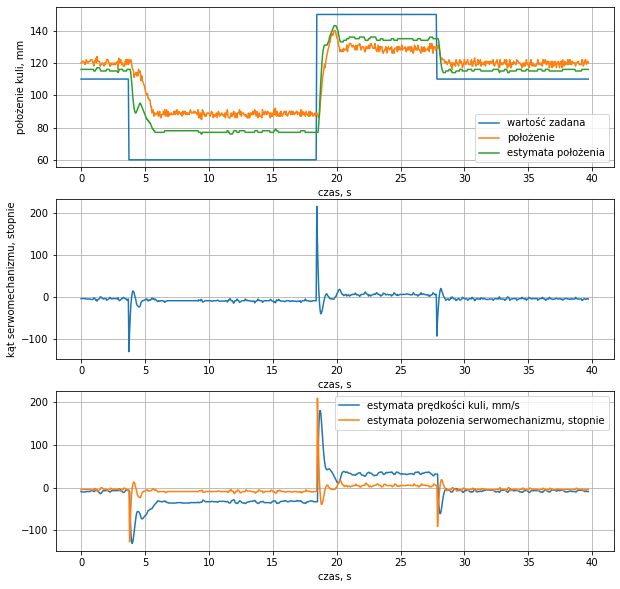

In [48]:
#from state
#25 9 4
# K, S, E = control.dlqr(dsys, [[100, 0, 0], [0, 1, 0], [0,0,1]], 10)
d4=[[25,9,110,120,116,-9,-5,-10,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,121,116,-10,-4,-11,-4,103,107],[25,9,110,121,116,-10,-4,-11,-4,103,107],[25,9,110,121,116,-10,-4,-11,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,122,116,-9,-4,-12,-5,103,108],[25,9,110,121,116,-9,-4,-11,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,121,116,-9,-4,-11,-5,103,108],[25,9,110,121,116,-9,-4,-11,-5,103,108],[25,9,110,121,116,-9,-4,-11,-5,103,108],[25,9,110,122,116,-8,-4,-12,-6,103,109],[25,9,110,122,116,-7,-5,-12,-6,103,109],[25,9,110,122,116,-7,-5,-12,-6,103,109],[25,9,110,121,116,-7,-5,-11,-6,103,109],[25,9,110,120,116,-8,-5,-10,-5,103,108],[25,9,110,118,115,-9,-5,-8,-2,103,105],[25,9,110,121,115,-9,-2,-11,-3,103,106],[25,9,110,121,115,-7,-2,-11,-5,103,108],[25,9,110,123,116,-5,-4,-13,-8,103,111],[25,9,110,120,116,-5,-7,-10,-7,103,110],[25,9,110,124,117,-5,-7,-14,-10,103,113],[25,9,110,121,117,-7,-9,-11,-7,103,110],[25,9,110,121,117,-9,-7,-11,-6,103,109],[25,9,110,121,117,-11,-6,-11,-5,103,108],[25,9,110,121,117,-12,-5,-11,-4,103,107],[25,9,110,118,116,-14,-4,-8,0,103,103],[25,9,110,119,115,-14,0,-9,0,103,103],[25,9,110,119,115,-12,0,-9,-1,103,104],[25,9,110,120,115,-10,0,-10,-3,103,106],[25,9,110,120,115,-8,-2,-10,-4,103,107],[25,9,110,119,115,-7,-3,-9,-5,103,108],[25,9,110,118,115,-7,-4,-8,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,122,116,-6,-4,-12,-8,103,111],[25,9,110,122,116,-5,-7,-12,-7,103,110],[25,9,110,122,116,-6,-7,-12,-6,103,109],[25,9,110,120,116,-8,-6,-10,-5,103,108],[25,9,110,120,116,-9,-5,-10,-4,103,107],[25,9,110,118,115,-10,-4,-8,-1,103,104],[25,9,110,118,115,-10,-1,-8,-3,103,106],[25,9,110,120,115,-8,-2,-10,-4,103,107],[25,9,110,119,115,-7,-3,-9,-5,103,108],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,116,114,-7,-4,-6,-2,103,105],[25,9,110,123,115,-5,-2,-13,-7,103,110],[25,9,110,122,116,-3,-6,-12,-9,103,112],[25,9,110,120,116,-4,-8,-10,-8,103,111],[25,9,110,122,116,-5,-8,-12,-7,103,110],[25,9,110,120,116,-7,-7,-10,-5,103,108],[25,9,110,119,116,-9,-5,-9,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,118,115,-11,-4,-8,-1,103,104],[25,9,110,118,115,-11,-1,-8,-2,103,105],[25,9,110,118,115,-10,-1,-8,-3,103,106],[25,9,110,121,115,-8,-2,-11,-4,103,107],[25,9,110,122,115,-6,-3,-12,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,122,116,-5,-4,-12,-8,103,111],[25,9,110,120,116,-5,-7,-10,-7,103,110],[25,9,110,119,116,-7,-7,-9,-5,103,108],[25,9,60,122,116,-8,-5,-62,-130,103,180],[25,9,60,120,116,-9,-127,-60,-81,103,180],[25,9,60,121,116,-69,-81,-61,-45,103,148],[25,9,60,122,113,-106,-45,-62,-19,103,122],[25,9,60,120,109,-125,-19,-60,-2,103,105],[25,9,60,117,104,-131,-2,-57,8,103,95],[25,9,60,116,99,-127,7,-56,14,103,89],[25,9,60,115,95,-118,13,-55,13,103,90],[25,9,60,111,92,-106,13,-51,10,103,93],[25,9,60,113,90,-92,10,-53,3,103,100],[25,9,60,113,89,-79,3,-53,-2,103,105],[25,9,60,114,89,-68,-1,-54,-10,103,113],[25,9,60,112,90,-60,-9,-52,-17,103,120],[25,9,60,114,91,-56,-16,-54,-20,103,123],[25,9,60,112,92,-56,-19,-52,-22,103,125],[25,9,60,116,93,-56,-21,-56,-23,103,126],[25,9,60,114,94,-58,-22,-54,-24,103,127],[25,9,60,115,95,-61,-23,-55,-23,103,126],[25,9,60,113,95,-65,-23,-53,-19,103,122],[25,9,60,109,94,-71,-19,-49,-13,103,116],[25,9,60,112,93,-73,-13,-52,-11,103,114],[25,9,60,109,92,-73,-11,-49,-9,103,112],[25,9,60,108,91,-72,-9,-48,-9,103,112],[25,9,60,107,90,-70,-9,-47,-8,103,111],[25,9,60,106,89,-68,-8,-46,-8,103,111],[25,9,60,104,88,-66,-8,-44,-7,103,110],[25,9,60,102,87,-65,-7,-42,-6,103,109],[25,9,60,101,86,-63,-6,-41,-5,103,108],[25,9,60,100,85,-61,-5,-40,-5,103,108],[25,9,60,101,85,-57,-5,-41,-9,103,112],[25,9,60,98,84,-54,-8,-38,-8,103,111],[25,9,60,98,84,-53,-8,-38,-9,103,112],[25,9,60,97,83,-52,-8,-37,-7,103,110],[25,9,60,97,83,-51,-7,-37,-8,103,111],[25,9,60,93,82,-50,-7,-33,-7,103,110],[25,9,60,93,81,-49,-7,-33,-5,103,108],[25,9,60,89,80,-49,-5,-29,-3,103,106],[25,9,60,90,79,-47,-3,-30,-4,103,107],[25,9,60,91,79,-44,-3,-31,-6,103,109],[25,9,60,87,78,-42,-5,-27,-5,103,108],[25,9,60,89,78,-40,-5,-29,-7,103,110],[25,9,60,88,77,-38,-6,-28,-5,103,108],[25,9,60,88,77,-37,-5,-28,-7,103,110],[25,9,60,88,77,-35,-6,-28,-8,103,111],[25,9,60,89,77,-33,-7,-29,-10,103,113],[25,9,60,90,77,-31,-9,-30,-11,103,114],[25,9,60,87,77,-31,-10,-27,-10,103,113],[25,9,60,88,77,-32,-10,-28,-9,103,112],[25,9,60,90,77,-32,-9,-30,-10,103,113],[25,9,60,87,77,-32,-9,-27,-10,103,113],[25,9,60,86,77,-33,-9,-26,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,90,77,-32,-9,-30,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,91,78,-31,-9,-31,-13,103,116],[25,9,60,87,78,-32,-12,-27,-11,103,114],[25,9,60,89,78,-34,-11,-29,-10,103,113],[25,9,60,91,78,-34,-10,-31,-10,103,113],[25,9,60,87,78,-35,-10,-27,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,87,78,-36,-9,-27,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,90,78,-36,-9,-30,-9,103,112],[25,9,60,90,78,-36,-9,-30,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,90,78,-36,-9,-30,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,91,78,-35,-9,-31,-9,103,112],[25,9,60,88,78,-35,-9,-28,-9,103,112],[25,9,60,88,78,-35,-9,-28,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,88,78,-35,-9,-28,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,87,78,-36,-9,-27,-9,103,112],[25,9,60,90,78,-36,-9,-30,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,90,78,-36,-9,-30,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,90,78,-36,-9,-30,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,91,78,-35,-9,-31,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,88,78,-35,-9,-28,-9,103,112],[25,9,60,91,78,-34,-9,-31,-10,103,113],[25,9,60,86,77,-35,-9,-26,-7,103,110],[25,9,60,89,77,-35,-7,-29,-8,103,111],[25,9,60,86,77,-35,-7,-26,-8,103,111],[25,9,60,89,77,-34,-7,-29,-9,103,112],[25,9,60,85,76,-34,-8,-25,-6,103,109],[25,9,60,85,76,-34,-6,-25,-7,103,110],[25,9,60,91,77,-31,-6,-31,-12,103,115],[25,9,60,90,77,-29,-11,-30,-12,103,115],[25,9,60,88,77,-30,-11,-28,-11,103,114],[25,9,60,89,77,-31,-11,-29,-10,103,113],[25,9,60,87,77,-32,-10,-27,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,87,77,-33,-9,-27,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,87,77,-33,-9,-27,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,90,77,-32,-9,-30,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,86,77,-33,-9,-26,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,87,77,-33,-9,-27,-9,103,112],[25,9,60,87,77,-33,-9,-27,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,86,77,-34,-9,-26,-8,103,111],[25,9,60,88,77,-34,-8,-28,-8,103,111],[25,9,60,90,77,-33,-8,-30,-9,103,112],[25,9,60,89,77,-32,-8,-29,-10,103,113],[25,9,60,87,77,-32,-9,-27,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,87,77,-32,-9,-27,-10,103,113],[25,9,60,87,77,-32,-9,-27,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,86,77,-33,-9,-26,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,91,78,-32,-9,-31,-12,103,115],[25,9,60,87,78,-33,-11,-27,-10,103,113],[25,9,60,86,77,-35,-10,-26,-7,103,110],[25,9,60,86,77,-36,-7,-26,-7,103,110],[25,9,60,86,76,-36,-7,-26,-4,103,107],[25,9,60,87,76,-35,-4,-27,-6,103,109],[25,9,60,89,76,-32,-5,-29,-9,103,112],[25,9,60,87,76,-30,-8,-27,-9,103,112],[25,9,60,87,76,-30,-8,-27,-9,103,112],[25,9,60,89,77,-29,-8,-29,-13,103,116],[25,9,60,90,78,-28,-12,-30,-15,103,118],[25,9,60,88,78,-30,-14,-28,-12,103,115],[25,9,60,86,78,-34,-12,-26,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,86,77,-37,-9,-26,-5,103,108],[25,9,60,89,77,-37,-5,-29,-7,103,110],[25,9,60,89,77,-35,-6,-29,-8,103,111],[25,9,60,89,77,-33,-7,-29,-10,103,113],[25,9,60,91,78,-31,-9,-31,-13,103,116],[25,9,60,88,78,-31,-12,-28,-12,103,115],[25,9,60,90,78,-32,-12,-30,-11,103,114],[25,9,60,87,78,-34,-11,-27,-10,103,113],[25,9,60,89,78,-35,-10,-29,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,87,77,-37,-9,-27,-5,103,108],[25,9,60,88,77,-37,-5,-28,-7,103,110],[25,9,60,87,77,-35,-6,-27,-8,103,111],[25,9,60,86,77,-34,-7,-26,-9,103,112],[25,9,60,86,77,-34,-8,-26,-8,103,111],[25,9,60,89,77,-33,-8,-29,-9,103,112],[25,9,60,86,77,-33,-8,-26,-9,103,112],[25,9,60,86,77,-33,-8,-26,-9,103,112],[25,9,60,89,77,-32,-8,-29,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,90,77,-31,-9,-30,-11,103,114],[25,9,60,88,77,-31,-10,-28,-10,103,113],[25,9,60,90,77,-31,-10,-30,-10,103,113],[25,9,60,91,78,-30,-10,-31,-14,103,117],[25,9,60,89,78,-31,-13,-29,-11,103,114],[25,9,60,87,78,-34,-11,-27,-10,103,113],[25,9,60,90,78,-35,-10,-30,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,86,77,-37,-9,-26,-5,103,108],[25,9,60,88,77,-37,-5,-28,-7,103,110],[25,9,60,89,77,-35,-6,-29,-8,103,111],[25,9,60,87,77,-34,-7,-27,-9,103,112],[25,9,60,87,77,-33,-8,-27,-9,103,112],[25,9,60,87,77,-33,-8,-27,-9,103,112],[25,9,60,86,77,-33,-8,-26,-9,103,112],[25,9,60,91,78,-32,-8,-31,-13,103,116],[25,9,60,88,78,-32,-12,-28,-11,103,114],[25,9,60,89,78,-34,-11,-29,-10,103,113],[25,9,60,88,78,-35,-10,-28,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,88,78,-35,-9,-28,-9,103,112],[25,9,60,88,78,-35,-9,-28,-9,103,112],[25,9,60,90,78,-35,-9,-30,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,89,78,-35,-9,-29,-9,103,112],[25,9,60,86,77,-36,-9,-26,-6,103,109],[25,9,60,89,77,-36,-6,-29,-7,103,110],[25,9,60,87,77,-35,-6,-27,-8,103,111],[25,9,60,89,77,-33,-7,-29,-10,103,113],[25,9,60,87,77,-32,-9,-27,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,91,78,-31,-9,-31,-13,103,116],[25,9,60,88,78,-31,-12,-28,-12,103,115],[25,9,60,92,79,-31,-12,-32,-14,103,117],[25,9,60,88,79,-33,-13,-28,-12,103,115],[25,9,60,87,78,-36,-12,-27,-7,103,110],[25,9,60,90,78,-37,-7,-30,-8,103,111],[25,9,60,88,78,-36,-7,-28,-9,103,112],[25,9,60,87,77,-36,-8,-27,-6,103,109],[25,9,60,87,77,-36,-6,-27,-7,103,110],[25,9,60,89,77,-34,-6,-29,-9,103,112],[25,9,60,87,77,-33,-8,-27,-9,103,112],[25,9,60,90,77,-32,-8,-30,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,87,77,-32,-9,-27,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,90,77,-31,-9,-30,-11,103,114],[25,9,60,90,77,-30,-10,-30,-11,103,114],[25,9,60,88,77,-31,-10,-28,-10,103,113],[25,9,60,90,77,-31,-10,-30,-10,103,113],[25,9,60,88,77,-32,-10,-28,-9,103,112],[25,9,60,87,77,-33,-9,-27,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,90,77,-32,-9,-30,-10,103,113],[25,9,60,90,77,-31,-9,-30,-11,103,114],[25,9,60,88,77,-31,-10,-28,-10,103,113],[25,9,60,90,77,-31,-10,-30,-10,103,113],[25,9,60,90,77,-31,-10,-30,-10,103,113],[25,9,60,88,77,-32,-10,-28,-9,103,112],[25,9,60,90,77,-32,-9,-30,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,88,77,-32,-9,-28,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,89,77,-32,-9,-29,-10,103,113],[25,9,60,90,77,-31,-9,-30,-11,103,114],[25,9,60,90,77,-30,-10,-30,-11,103,114],[25,9,60,88,77,-31,-10,-28,-10,103,113],[25,9,60,89,77,-31,-10,-29,-10,103,113],[25,9,60,89,77,-31,-10,-29,-10,103,113],[25,9,60,89,77,-31,-10,-29,-10,103,113],[25,9,60,87,77,-32,-10,-27,-9,103,112],[25,9,60,91,78,-31,-9,-31,-13,103,116],[25,9,60,87,78,-32,-12,-27,-11,103,114],[25,9,60,89,78,-34,-11,-29,-10,103,113],[25,9,60,90,78,-35,-10,-30,-9,103,112],[25,9,60,88,78,-36,-9,-28,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,89,78,-36,-9,-29,-9,103,112],[25,9,60,87,77,-37,-9,-27,-5,103,108],[25,9,60,90,77,-36,-5,-30,-8,103,111],[25,9,60,89,77,-34,-7,-29,-9,103,112],[25,9,60,88,77,-33,-8,-28,-9,103,112],[25,9,60,88,77,-33,-8,-28,-9,103,112],[25,9,60,87,77,-33,-8,-27,-9,103,112],[25,9,60,90,77,-32,-8,-30,-10,103,113],[25,9,60,87,77,-32,-9,-27,-10,103,113],[25,9,60,90,77,-31,-9,-30,-11,103,114],[25,9,60,88,77,-31,-10,-28,-10,103,113],[25,9,60,89,77,-31,-10,-29,-10,103,113],[25,9,60,89,77,-31,-10,-29,-10,103,113],[25,9,60,87,77,-32,-10,-27,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,60,89,77,-33,-9,-29,-9,103,112],[25,9,60,87,77,-33,-9,-27,-9,103,112],[25,9,60,88,77,-33,-9,-28,-9,103,112],[25,9,150,89,77,-33,-9,61,215,103,0],[25,9,150,88,77,-33,210,62,128,103,0],[25,9,150,87,77,72,129,63,66,103,37],[25,9,150,86,82,137,67,64,19,103,84],[25,9,150,87,89,171,19,63,-9,103,112],[25,9,150,93,98,181,-8,57,-29,103,132],[25,9,150,98,107,177,-28,52,-40,103,143],[25,9,150,101,114,161,-39,49,-39,103,142],[25,9,150,106,120,139,-39,44,-34,103,137],[25,9,150,111,125,116,-34,39,-28,103,131],[25,9,150,113,128,95,-28,37,-19,103,122],[25,9,150,116,130,77,-19,34,-11,103,114],[25,9,150,119,131,63,-11,31,-4,103,107],[25,9,150,117,131,52,-4,33,2,103,101],[25,9,150,121,131,46,1,29,5,103,98],[25,9,150,123,131,43,4,27,7,103,96],[25,9,150,125,131,42,6,25,7,103,96],[25,9,150,127,132,43,6,23,3,103,100],[25,9,150,129,133,44,3,21,1,103,102],[25,9,150,130,134,44,1,20,0,103,103],[25,9,150,133,136,44,0,17,-4,103,107],[25,9,150,133,137,42,-3,17,-4,103,107],[25,9,150,136,138,40,-3,14,-4,103,107],[25,9,150,137,139,38,-3,13,-5,103,108],[25,9,150,138,140,36,-4,12,-5,103,108],[25,9,150,137,141,33,-4,13,-5,103,108],[25,9,150,138,142,30,-4,12,-5,103,108],[25,9,150,140,143,27,-4,10,-5,103,108],[25,9,150,140,143,24,-4,10,-2,103,105],[25,9,150,140,143,21,-2,10,0,103,103],[25,9,150,138,143,18,0,12,1,103,102],[25,9,150,136,142,15,0,14,6,103,97],[25,9,150,135,141,12,5,15,9,103,94],[25,9,150,134,140,11,8,16,11,103,92],[25,9,150,131,138,11,10,19,16,103,87],[25,9,150,130,136,13,15,20,17,103,86],[25,9,150,127,134,17,16,23,18,103,85],[25,9,150,128,133,22,17,22,15,103,88],[25,9,150,128,133,28,15,22,11,103,92],[25,9,150,127,133,33,11,23,8,103,95],[25,9,150,128,133,36,8,22,6,103,97],[25,9,150,127,133,37,6,23,6,103,97],[25,9,150,129,134,38,6,21,3,103,100],[25,9,150,128,134,38,3,22,4,103,99],[25,9,150,128,134,37,3,22,5,103,98],[25,9,150,128,134,36,4,22,6,103,97],[25,9,150,129,134,36,5,21,5,103,98],[25,9,150,131,135,37,5,19,2,103,101],[25,9,150,127,135,36,2,23,4,103,99],[25,9,150,130,135,35,3,20,4,103,99],[25,9,150,130,135,34,3,20,5,103,98],[25,9,150,132,136,34,4,18,2,103,101],[25,9,150,132,136,34,2,18,3,103,100],[25,9,150,132,136,33,2,18,4,103,99],[25,9,150,131,136,32,3,19,5,103,98],[25,9,150,130,136,31,4,20,5,103,98],[25,9,150,130,136,30,4,20,6,103,97],[25,9,150,131,136,30,5,19,6,103,97],[25,9,150,130,136,30,5,20,6,103,97],[25,9,150,130,136,30,5,20,6,103,97],[25,9,150,128,135,29,5,22,9,103,94],[25,9,150,131,135,30,8,19,7,103,96],[25,9,150,130,135,32,7,20,5,103,98],[25,9,150,128,135,32,5,22,6,103,97],[25,9,150,131,135,33,5,19,5,103,98],[25,9,150,131,135,34,5,19,4,103,99],[25,9,150,131,135,35,4,19,4,103,99],[25,9,150,132,136,35,4,18,1,103,102],[25,9,150,131,136,35,1,19,3,103,100],[25,9,150,128,136,32,2,22,5,103,98],[25,9,150,129,136,30,4,21,6,103,97],[25,9,150,130,136,29,5,20,6,103,97],[25,9,150,130,136,29,5,20,6,103,97],[25,9,150,130,136,29,5,20,6,103,97],[25,9,150,129,136,28,5,21,7,103,96],[25,9,150,127,135,27,6,23,10,103,93],[25,9,150,127,134,27,9,23,12,103,91],[25,9,150,130,134,29,11,20,9,103,94],[25,9,150,130,134,32,9,20,7,103,96],[25,9,150,129,134,34,7,21,6,103,97],[25,9,150,129,134,35,6,21,6,103,97],[25,9,150,131,135,36,6,19,2,103,101],[25,9,150,129,135,36,2,21,4,103,99],[25,9,150,129,135,34,3,21,5,103,98],[25,9,150,132,136,34,4,18,2,103,101],[25,9,150,132,136,34,2,18,3,103,100],[25,9,150,131,136,33,2,19,4,103,99],[25,9,150,130,136,31,3,20,5,103,98],[25,9,150,129,136,30,4,21,6,103,97],[25,9,150,129,136,29,5,21,6,103,97],[25,9,150,129,136,28,5,21,7,103,96],[25,9,150,132,136,29,6,18,6,103,97],[25,9,150,129,136,29,6,21,6,103,97],[25,9,150,128,135,29,6,22,9,103,94],[25,9,150,127,134,29,8,23,10,103,93],[25,9,150,129,134,31,9,21,8,103,95],[25,9,150,131,134,34,8,19,6,103,97],[25,9,150,127,134,35,6,23,6,103,97],[25,9,150,130,134,36,6,20,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,130,135,37,5,20,2,103,101],[25,9,150,130,135,37,2,20,3,103,100],[25,9,150,130,135,36,2,20,4,103,99],[25,9,150,127,135,34,3,23,5,103,98],[25,9,150,126,134,32,4,24,9,103,94],[25,9,150,127,134,31,8,23,8,103,95],[25,9,150,128,134,32,8,22,8,103,95],[25,9,150,128,134,33,8,22,7,103,96],[25,9,150,130,134,35,7,20,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,126,134,35,5,24,6,103,97],[25,9,150,129,134,35,5,21,6,103,97],[25,9,150,130,134,36,5,20,5,103,98],[25,9,150,129,134,36,5,21,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,129,134,36,5,21,5,103,98],[25,9,150,129,134,36,5,21,5,103,98],[25,9,150,130,135,37,5,20,2,103,101],[25,9,150,126,135,36,2,24,4,103,99],[25,9,150,128,135,34,3,22,5,103,98],[25,9,150,128,135,33,4,22,6,103,97],[25,9,150,126,134,31,5,24,10,103,93],[25,9,150,129,134,31,9,21,8,103,95],[25,9,150,129,134,33,8,21,7,103,96],[25,9,150,129,134,35,7,21,5,103,98],[25,9,150,130,134,37,5,20,4,103,99],[25,9,150,127,134,36,4,23,6,103,97],[25,9,150,130,135,36,5,20,3,103,100],[25,9,150,128,135,35,3,22,4,103,99],[25,9,150,130,135,34,3,20,5,103,98],[25,9,150,129,135,33,4,21,6,103,97],[25,9,150,128,135,32,5,22,6,103,97],[25,9,150,129,135,32,5,21,6,103,97],[25,9,150,131,135,33,5,19,5,103,98],[25,9,150,128,135,32,5,22,6,103,97],[25,9,150,129,135,32,5,21,6,103,97],[25,9,150,129,135,32,5,21,6,103,97],[25,9,150,129,135,32,5,21,6,103,97],[25,9,150,130,135,32,5,20,6,103,97],[25,9,150,129,135,32,5,21,6,103,97],[25,9,150,127,135,31,5,23,7,103,96],[25,9,150,129,135,31,6,21,7,103,96],[25,9,150,128,135,31,6,22,7,103,96],[25,9,150,130,135,32,6,20,6,103,97],[25,9,150,128,135,32,6,22,6,103,97],[25,9,150,129,135,32,6,21,6,103,97],[25,9,150,130,135,33,6,20,5,103,98],[25,9,150,127,135,33,5,23,5,103,98],[25,9,150,130,135,33,5,20,5,103,98],[25,9,150,129,135,33,5,21,5,103,98],[25,9,150,128,135,32,5,22,6,103,97],[25,9,150,126,134,31,5,24,10,103,93],[25,9,150,128,134,31,9,22,8,103,95],[25,9,150,131,134,34,8,19,6,103,97],[25,9,150,130,134,36,6,20,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,129,134,36,5,21,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,131,135,37,5,19,2,103,101],[25,9,150,129,135,37,2,21,3,103,100],[25,9,150,128,135,35,2,22,5,103,98],[25,9,150,128,135,33,4,22,6,103,97],[25,9,150,127,135,32,5,23,6,103,97],[25,9,150,126,134,31,5,24,10,103,93],[25,9,150,130,134,32,9,20,7,103,96],[25,9,150,129,134,34,7,21,6,103,97],[25,9,150,127,134,34,6,23,7,103,96],[25,9,150,128,134,34,6,22,7,103,96],[25,9,150,130,134,35,6,20,6,103,97],[25,9,150,127,134,35,6,23,6,103,97],[25,9,150,129,134,36,6,21,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,128,134,36,5,22,5,103,98],[25,9,150,129,134,36,5,21,5,103,98],[25,9,150,130,135,37,5,20,2,103,101],[25,9,150,127,135,36,2,23,4,103,99],[25,9,150,132,136,35,3,18,2,103,101],[25,9,150,130,136,34,2,20,3,103,100],[25,9,150,129,136,32,2,21,5,103,98],[25,9,150,132,136,31,4,18,5,103,98],[25,9,150,129,136,30,4,21,6,103,97],[25,9,150,126,135,28,5,24,10,103,93],[25,9,150,130,135,28,9,20,8,103,95],[25,9,150,130,135,30,8,20,7,103,96],[25,9,150,130,135,32,7,20,5,103,98],[25,9,150,128,135,32,5,22,6,103,97],[25,9,150,129,135,32,5,21,6,103,97],[25,9,110,130,135,32,5,-20,-93,103,180],[25,9,110,129,135,32,-91,-19,-54,103,157],[25,9,110,131,135,-13,-54,-21,-29,103,132],[25,9,110,130,133,-41,-29,-20,-9,103,112],[25,9,110,128,129,-56,-9,-18,6,103,97],[25,9,110,126,125,-61,5,-16,15,103,88],[25,9,110,122,121,-59,14,-12,20,103,83],[25,9,110,122,118,-51,19,-12,18,103,85],[25,9,110,123,116,-40,18,-13,13,103,90],[25,9,110,122,115,-29,13,-12,8,103,95],[25,9,110,122,114,-20,8,-12,4,103,99],[25,9,110,122,114,-13,4,-12,0,103,103],[25,9,110,120,114,-8,0,-10,-2,103,105],[25,9,110,121,114,-5,-1,-11,-5,103,108],[25,9,110,121,115,-3,-4,-11,-8,103,111],[25,9,110,120,115,-3,-7,-10,-7,103,110],[25,9,110,119,115,-5,-7,-9,-5,103,108],[25,9,110,120,115,-6,-5,-10,-5,103,108],[25,9,110,121,115,-6,-5,-11,-5,103,108],[25,9,110,122,116,-5,-5,-12,-8,103,111],[25,9,110,120,116,-6,-7,-10,-6,103,109],[25,9,110,120,116,-8,-6,-10,-5,103,108],[25,9,110,118,115,-10,-5,-8,-1,103,104],[25,9,110,120,115,-10,-1,-10,-3,103,106],[25,9,110,116,114,-10,-2,-6,0,103,103],[25,9,110,120,114,-8,0,-10,-2,103,105],[25,9,110,119,114,-6,-1,-9,-4,103,107],[25,9,110,120,114,-4,-3,-10,-5,103,108],[25,9,110,120,114,-3,-4,-10,-5,103,108],[25,9,110,118,114,-3,-4,-8,-5,103,108],[25,9,110,122,115,-2,-4,-12,-9,103,112],[25,9,110,120,115,-2,-8,-10,-7,103,110],[25,9,110,120,115,-4,-7,-10,-6,103,109],[25,9,110,119,115,-6,-6,-9,-4,103,107],[25,9,110,118,115,-7,-4,-8,-4,103,107],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,122,116,-5,-4,-12,-8,103,111],[25,9,110,120,116,-5,-7,-10,-7,103,110],[25,9,110,121,116,-6,-7,-11,-6,103,109],[25,9,110,120,116,-8,-6,-10,-5,103,108],[25,9,110,117,115,-10,-5,-7,-1,103,104],[25,9,110,119,115,-11,-1,-9,-2,103,105],[25,9,110,119,115,-10,-1,-9,-3,103,106],[25,9,110,122,115,-8,-2,-12,-4,103,107],[25,9,110,120,115,-7,-3,-10,-5,103,108],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,122,116,-5,-4,-12,-8,103,111],[25,9,110,120,116,-5,-7,-10,-7,103,110],[25,9,110,119,116,-7,-7,-9,-5,103,108],[25,9,110,119,116,-9,-5,-9,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,122,116,-9,-4,-12,-5,103,108],[25,9,110,118,115,-10,-4,-8,-1,103,104],[25,9,110,118,115,-10,-1,-8,-3,103,106],[25,9,110,121,115,-8,-2,-11,-4,103,107],[25,9,110,121,115,-6,-3,-11,-5,103,108],[25,9,110,123,116,-4,-4,-13,-9,103,112],[25,9,110,120,116,-4,-8,-10,-8,103,111],[25,9,110,118,116,-7,-8,-8,-5,103,108],[25,9,110,119,116,-9,-5,-9,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,122,116,-9,-4,-12,-5,103,108],[25,9,110,119,116,-9,-4,-9,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,122,116,-8,-4,-12,-6,103,109],[25,9,110,118,115,-9,-5,-8,-2,103,105],[25,9,110,120,115,-9,-2,-10,-3,103,106],[25,9,110,119,115,-8,-2,-9,-4,103,107],[25,9,110,120,115,-7,-3,-10,-5,103,108],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,118,115,-6,-4,-8,-5,103,108],[25,9,110,121,115,-5,-4,-11,-6,103,109],[25,9,110,120,115,-5,-5,-10,-6,103,109],[25,9,110,120,115,-5,-5,-10,-6,103,109],[25,9,110,121,115,-5,-5,-11,-6,103,109],[25,9,110,120,115,-5,-5,-10,-6,103,109],[25,9,110,119,115,-6,-5,-9,-5,103,108],[25,9,110,121,115,-6,-5,-11,-5,103,108],[25,9,110,120,115,-6,-5,-10,-5,103,108],[25,9,110,121,115,-6,-5,-11,-5,103,108],[25,9,110,120,115,-6,-5,-10,-5,103,108],[25,9,110,120,115,-6,-5,-10,-5,103,108],[25,9,110,122,116,-5,-5,-12,-8,103,111],[25,9,110,119,116,-6,-7,-9,-6,103,109],[25,9,110,118,116,-8,-6,-8,-5,103,108],[25,9,110,119,116,-9,-5,-9,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,121,116,-10,-4,-11,-4,103,107],[25,9,110,122,116,-9,-4,-12,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,119,116,-9,-4,-9,-5,103,108],[25,9,110,117,115,-10,-4,-7,-1,103,104],[25,9,110,117,114,-11,-1,-7,0,103,103],[25,9,110,122,115,-8,0,-12,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,120,115,-6,-4,-10,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,120,115,-6,-4,-10,-5,103,108],[25,9,110,120,115,-6,-4,-10,-5,103,108],[25,9,110,122,116,-5,-4,-12,-8,103,111],[25,9,110,120,116,-5,-7,-10,-7,103,110],[25,9,110,119,116,-7,-7,-9,-5,103,108],[25,9,110,122,116,-8,-5,-12,-5,103,108],[25,9,110,117,115,-10,-5,-7,-1,103,104],[25,9,110,117,114,-11,-1,-7,0,103,103],[25,9,110,119,114,-9,0,-9,-1,103,104],[25,9,110,118,114,-7,0,-8,-3,103,106],[25,9,110,122,115,-4,-2,-12,-8,103,111],[25,9,110,120,115,-3,-7,-10,-7,103,110],[25,9,110,117,115,-5,-7,-7,-5,103,108],[25,9,110,120,115,-6,-5,-10,-5,103,108],[25,9,110,120,115,-6,-5,-10,-5,103,108],[25,9,110,119,115,-7,-5,-9,-4,103,107],[25,9,110,121,115,-7,-4,-11,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,122,116,-6,-4,-12,-8,103,111],[25,9,110,121,116,-6,-7,-11,-6,103,109],[25,9,110,121,116,-7,-6,-11,-6,103,109],[25,9,110,120,116,-8,-6,-10,-5,103,108],[25,9,110,120,116,-9,-5,-10,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,117,115,-11,-4,-7,-1,103,104],[25,9,110,119,115,-11,-1,-9,-2,103,105],[25,9,110,120,115,-9,-1,-10,-4,103,107],[25,9,110,118,115,-8,-3,-8,-4,103,107],[25,9,110,120,115,-7,-3,-10,-5,103,108],[25,9,110,118,115,-7,-4,-8,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,122,116,-6,-4,-12,-8,103,111],[25,9,110,120,116,-6,-7,-10,-6,103,109],[25,9,110,119,116,-8,-6,-9,-5,103,108],[25,9,110,119,116,-9,-5,-9,-4,103,107],[25,9,110,117,115,-11,-4,-7,-1,103,104],[25,9,110,120,115,-11,-1,-10,-2,103,105],[25,9,110,119,115,-10,-1,-9,-3,103,106],[25,9,110,122,115,-8,-2,-12,-4,103,107],[25,9,110,119,115,-7,-3,-9,-5,103,108],[25,9,110,118,115,-7,-4,-8,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,118,115,-7,-4,-8,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,118,115,-7,-4,-8,-4,103,107],[25,9,110,118,115,-7,-4,-8,-4,103,107],[25,9,110,119,115,-7,-4,-9,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,122,116,-6,-4,-12,-8,103,111],[25,9,110,119,116,-6,-7,-9,-6,103,109],[25,9,110,120,116,-8,-6,-10,-5,103,108],[25,9,110,120,116,-9,-5,-10,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,118,115,-11,-4,-8,-1,103,104],[25,9,110,122,115,-10,-1,-12,-3,103,106],[25,9,110,122,115,-8,-2,-12,-4,103,107],[25,9,110,120,115,-7,-3,-10,-5,103,108],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,122,116,-5,-4,-12,-8,103,111],[25,9,110,119,116,-5,-7,-9,-7,103,110],[25,9,110,119,116,-7,-7,-9,-5,103,108],[25,9,110,121,116,-8,-5,-11,-5,103,108],[25,9,110,120,116,-9,-5,-10,-4,103,107],[25,9,110,121,116,-9,-4,-11,-5,103,108],[25,9,110,117,115,-10,-4,-7,-1,103,104],[25,9,110,119,115,-10,-1,-9,-3,103,106],[25,9,110,120,115,-8,-2,-10,-4,103,107],[25,9,110,121,115,-6,-3,-11,-5,103,108],[25,9,110,117,115,-6,-4,-7,-5,103,108],[25,9,110,121,115,-5,-4,-11,-6,103,109],[25,9,110,118,115,-5,-5,-8,-6,103,109],[25,9,110,118,115,-6,-5,-8,-5,103,108],[25,9,110,120,115,-6,-5,-10,-5,103,108],[25,9,110,121,115,-6,-5,-11,-5,103,108],[25,9,110,119,115,-7,-5,-9,-4,103,107],[25,9,110,117,115,-8,-4,-7,-3,103,106],[25,9,110,120,115,-8,-3,-10,-4,103,107],[25,9,110,120,115,-7,-3,-10,-5,103,108],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,117,115,-7,-4,-7,-4,103,107],[25,9,110,120,115,-7,-4,-10,-4,103,107],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,121,115,-5,-4,-11,-6,103,109],[25,9,110,117,115,-6,-5,-7,-5,103,108],[25,9,110,122,116,-5,-5,-12,-8,103,111],[25,9,110,120,116,-6,-7,-10,-6,103,109],[25,9,110,118,116,-8,-6,-8,-5,103,108],[25,9,110,121,116,-9,-5,-11,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,120,116,-10,-4,-10,-4,103,107],[25,9,110,119,116,-10,-4,-9,-4,103,107],[25,9,110,122,116,-9,-4,-12,-5,103,108],[25,9,110,119,116,-9,-4,-9,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,122,116,-8,-4,-12,-6,103,109],[25,9,110,119,116,-8,-5,-9,-5,103,108],[25,9,110,121,116,-8,-5,-11,-5,103,108],[25,9,110,119,116,-9,-5,-9,-4,103,107],[25,9,110,121,116,-9,-4,-11,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,118,115,-10,-4,-8,-1,103,104],[25,9,110,120,115,-10,-1,-10,-3,103,106],[25,9,110,120,115,-8,-2,-10,-4,103,107],[25,9,110,120,115,-7,-3,-10,-5,103,108],[25,9,110,121,115,-6,-4,-11,-5,103,108],[25,9,110,120,115,-6,-4,-10,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,119,115,-6,-4,-9,-5,103,108],[25,9,110,122,116,-5,-4,-12,-8,103,111],[25,9,110,122,116,-4,-7,-12,-8,103,111],[25,9,110,118,116,-6,-7,-8,-6,103,109],[25,9,110,119,116,-8,-6,-9,-5,103,108],[25,9,110,120,116,-9,-5,-10,-4,103,107],[25,9,110,122,116,-9,-4,-12,-5,103,108],[25,9,110,122,116,-8,-4,-12,-6,103,109],[25,9,110,119,116,-8,-5,-9,-5,103,108],[25,9,110,120,116,-9,-5,-10,-4,103,107],[25,9,110,121,116,-9,-4,-11,-5,103,108],[25,9,110,120,116,-9,-4,-10,-5,103,108],[25,9,110,119,116,-9,-4,-9,-5,103,108]]
show(d4)

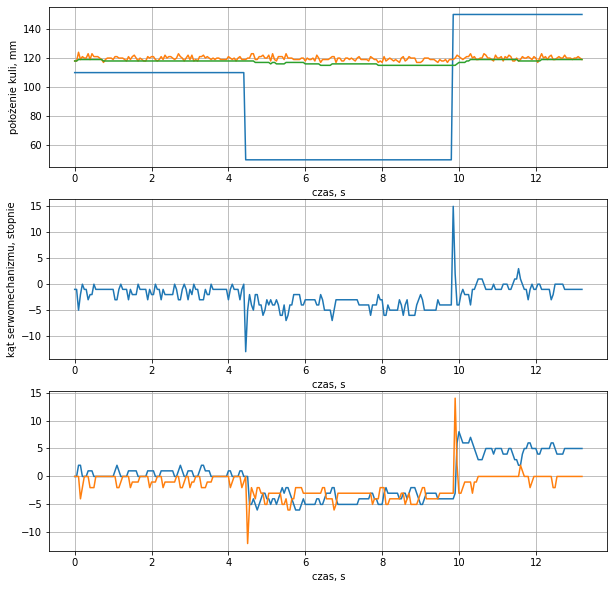

In [33]:
#from state
#2 16 7
#K, S, E = control.dlqr(dsys, [[1, 0, 0], [0, 100, 0], [0,0,1]], 10)
d5=[[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,124,119,2,0,-14,-5,103,108],[2,16,110,119,119,2,-4,-9,-2,103,105],[2,16,110,121,119,0,-2,-11,0,103,103],[2,16,110,120,119,0,0,-10,-1,103,104],[2,16,110,120,119,0,0,-10,-1,103,104],[2,16,110,123,119,1,0,-13,-3,103,106],[2,16,110,119,119,1,-2,-9,-2,103,105],[2,16,110,123,119,1,-2,-13,-2,103,105],[2,16,110,121,119,0,-2,-11,0,103,103],[2,16,110,121,119,0,0,-11,-1,103,104],[2,16,110,121,119,0,0,-11,-1,103,104],[2,16,110,120,119,0,0,-10,-1,103,104],[2,16,110,119,119,0,0,-9,-1,103,104],[2,16,110,117,118,0,0,-7,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,121,118,1,0,-11,-3,103,106],[2,16,110,121,118,2,-2,-11,-3,103,106],[2,16,110,120,118,1,-2,-10,-1,103,104],[2,16,110,120,118,0,-1,-10,0,103,103],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,121,118,1,0,-11,-3,103,106],[2,16,110,119,118,1,-2,-9,-1,103,104],[2,16,110,121,118,1,-1,-11,-2,103,105],[2,16,110,122,118,1,-1,-12,-2,103,105],[2,16,110,120,118,1,-1,-10,-2,103,105],[2,16,110,118,118,0,-1,-8,0,103,103],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,121,118,1,0,-11,-3,103,106],[2,16,110,120,118,1,-2,-10,-1,103,104],[2,16,110,121,118,1,-1,-11,-2,103,105],[2,16,110,121,118,1,-1,-11,-2,103,105],[2,16,110,119,118,0,-1,-9,0,103,103],[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,121,118,1,0,-11,-3,103,106],[2,16,110,119,118,1,-2,-9,-1,103,104],[2,16,110,122,118,1,-1,-12,-2,103,105],[2,16,110,120,118,1,-1,-10,-2,103,105],[2,16,110,121,118,1,-1,-11,-2,103,105],[2,16,110,121,118,1,-1,-11,-2,103,105],[2,16,110,120,118,1,-1,-10,-2,103,105],[2,16,110,119,118,0,-1,-9,0,103,103],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,123,118,1,0,-13,-3,103,106],[2,16,110,121,118,2,-2,-11,-3,103,106],[2,16,110,120,118,1,-2,-10,-1,103,104],[2,16,110,118,118,0,-1,-8,0,103,103],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,122,118,1,0,-12,-3,103,106],[2,16,110,119,118,1,-2,-9,-1,103,104],[2,16,110,122,118,1,-1,-12,-2,103,105],[2,16,110,118,118,0,-1,-8,0,103,103],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,121,118,1,0,-11,-3,103,106],[2,16,110,121,118,2,-2,-11,-3,103,106],[2,16,110,122,118,2,-2,-12,-3,103,106],[2,16,110,120,118,1,-2,-10,-1,103,104],[2,16,110,121,118,1,-1,-11,-2,103,105],[2,16,110,120,118,1,-1,-10,-2,103,105],[2,16,110,119,118,0,-1,-9,0,103,103],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,119,118,0,0,-9,-1,103,104],[2,16,110,121,118,1,0,-11,-3,103,106],[2,16,110,120,118,1,-2,-10,-1,103,104],[2,16,110,119,118,0,-1,-9,0,103,103],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,118,118,0,0,-8,-1,103,104],[2,16,110,120,118,0,0,-10,-1,103,104],[2,16,110,121,118,1,0,-11,-3,103,106],[2,16,110,119,118,1,-2,-9,-1,103,104],[2,16,110,119,118,0,-1,-9,0,103,103],[2,16,50,119,118,0,0,-69,-13,103,116],[2,16,50,120,118,0,-12,-70,-5,103,108],[2,16,50,120,118,-5,-5,-70,-2,103,105],[2,16,50,123,118,-5,-2,-73,-4,103,107],[2,16,50,123,118,-4,-3,-73,-5,103,108],[2,16,50,119,117,-5,-4,-69,-2,103,105],[2,16,50,119,117,-6,-2,-69,-2,103,105],[2,16,50,121,117,-5,-2,-71,-4,103,107],[2,16,50,121,117,-4,-3,-71,-4,103,107],[2,16,50,122,117,-3,-3,-72,-6,103,109],[2,16,50,120,117,-3,-5,-70,-5,103,108],[2,16,50,120,117,-4,-5,-70,-3,103,106],[2,16,50,122,117,-4,-3,-72,-4,103,107],[2,16,50,118,116,-5,-3,-68,-3,103,106],[2,16,50,123,117,-4,-3,-73,-4,103,107],[2,16,50,119,117,-4,-3,-69,-4,103,107],[2,16,50,118,116,-5,-3,-68,-3,103,106],[2,16,50,121,116,-4,-3,-71,-4,103,107],[2,16,50,121,116,-3,-3,-71,-6,103,109],[2,16,50,121,116,-2,-5,-71,-6,103,109],[2,16,50,119,116,-3,-5,-69,-4,103,107],[2,16,50,123,117,-2,-4,-73,-7,103,110],[2,16,50,120,117,-2,-6,-70,-6,103,109],[2,16,50,120,117,-3,-6,-70,-4,103,107],[2,16,50,120,117,-4,-4,-70,-4,103,107],[2,16,50,119,117,-5,-4,-69,-2,103,105],[2,16,50,119,117,-6,-2,-69,-2,103,105],[2,16,50,119,117,-6,-2,-69,-2,103,105],[2,16,50,119,117,-6,-2,-69,-2,103,105],[2,16,50,120,117,-5,-2,-70,-4,103,107],[2,16,50,120,117,-4,-3,-70,-4,103,107],[2,16,50,118,116,-5,-3,-68,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,119,116,-5,-3,-69,-3,103,106],[2,16,50,119,116,-5,-3,-69,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,118,116,-5,-3,-68,-3,103,106],[2,16,50,122,116,-4,-3,-72,-4,103,107],[2,16,50,120,116,-4,-3,-70,-4,103,107],[2,16,50,117,115,-5,-3,-67,-2,103,105],[2,16,50,119,115,-5,-2,-69,-3,103,106],[2,16,50,119,115,-4,-2,-69,-5,103,108],[2,16,50,119,115,-3,-4,-69,-5,103,108],[2,16,50,119,115,-3,-4,-69,-5,103,108],[2,16,50,120,115,-3,-4,-70,-5,103,108],[2,16,50,121,116,-2,-4,-71,-7,103,110],[2,16,50,121,116,-2,-6,-71,-5,103,108],[2,16,50,117,116,-4,-5,-67,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,118,116,-5,-3,-68,-3,103,106],[2,16,50,118,116,-5,-3,-68,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,119,116,-5,-3,-69,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,119,116,-5,-3,-69,-3,103,106],[2,16,50,118,116,-5,-3,-68,-3,103,106],[2,16,50,120,116,-5,-3,-70,-3,103,106],[2,16,50,121,116,-4,-3,-71,-4,103,107],[2,16,50,119,116,-4,-3,-69,-4,103,107],[2,16,50,119,116,-4,-3,-69,-4,103,107],[2,16,50,119,116,-4,-3,-69,-4,103,107],[2,16,50,119,116,-4,-3,-69,-4,103,107],[2,16,50,118,116,-4,-3,-68,-4,103,107],[2,16,50,121,116,-3,-3,-71,-6,103,109],[2,16,50,120,116,-3,-5,-70,-4,103,107],[2,16,50,119,116,-4,-4,-69,-4,103,107],[2,16,50,119,116,-4,-4,-69,-4,103,107],[2,16,50,117,115,-5,-4,-67,-2,103,105],[2,16,50,118,115,-5,-2,-68,-3,103,106],[2,16,50,117,115,-5,-2,-67,-3,103,106],[2,16,50,121,115,-3,-2,-71,-6,103,109],[2,16,50,118,115,-2,-5,-68,-6,103,109],[2,16,50,119,115,-3,-5,-69,-4,103,107],[2,16,50,120,115,-3,-4,-70,-5,103,108],[2,16,50,119,115,-3,-4,-69,-5,103,108],[2,16,50,118,115,-3,-4,-68,-5,103,108],[2,16,50,119,115,-3,-4,-69,-5,103,108],[2,16,50,118,115,-3,-4,-68,-5,103,108],[2,16,50,117,115,-4,-4,-67,-3,103,106],[2,16,50,120,115,-4,-3,-70,-4,103,107],[2,16,50,121,115,-3,-3,-71,-6,103,109],[2,16,50,118,115,-3,-5,-68,-4,103,107],[2,16,50,119,115,-4,-4,-69,-3,103,106],[2,16,50,121,115,-3,-3,-71,-6,103,109],[2,16,50,120,115,-2,-5,-70,-6,103,109],[2,16,50,120,115,-2,-5,-70,-6,103,109],[2,16,50,120,115,-2,-5,-70,-6,103,109],[2,16,50,117,115,-3,-5,-67,-4,103,107],[2,16,50,117,115,-4,-4,-67,-3,103,106],[2,16,50,117,115,-5,-3,-67,-2,103,105],[2,16,50,118,115,-5,-2,-68,-3,103,106],[2,16,50,120,115,-4,-2,-70,-5,103,108],[2,16,50,120,115,-3,-4,-70,-5,103,108],[2,16,50,120,115,-3,-4,-70,-5,103,108],[2,16,50,119,115,-3,-4,-69,-5,103,108],[2,16,50,119,115,-3,-4,-69,-5,103,108],[2,16,50,119,115,-3,-4,-69,-5,103,108],[2,16,50,118,115,-3,-4,-68,-5,103,108],[2,16,50,117,115,-4,-4,-67,-3,103,106],[2,16,50,119,115,-4,-3,-69,-4,103,107],[2,16,50,118,115,-4,-3,-68,-4,103,107],[2,16,50,118,115,-4,-3,-68,-4,103,107],[2,16,50,119,115,-4,-3,-69,-4,103,107],[2,16,50,117,115,-4,-3,-67,-4,103,107],[2,16,50,119,115,-4,-3,-69,-4,103,107],[2,16,50,119,115,-4,-3,-69,-4,103,107],[2,16,150,119,115,-4,-3,31,15,103,88],[2,16,150,120,115,-3,14,30,2,103,101],[2,16,150,122,116,6,2,28,-4,103,107],[2,16,150,121,117,8,-3,29,-4,103,107],[2,16,150,120,117,7,-3,30,-2,103,105],[2,16,150,119,117,6,-2,31,-1,103,104],[2,16,150,120,117,6,-1,30,-2,103,105],[2,16,150,121,118,6,-1,29,-2,103,105],[2,16,150,121,118,6,-1,29,-2,103,105],[2,16,150,123,119,7,-1,27,-4,103,107],[2,16,150,120,119,6,-3,30,-1,103,104],[2,16,150,121,119,5,-1,29,-1,103,104],[2,16,150,119,119,4,-1,31,0,103,103],[2,16,150,119,119,3,0,31,1,103,102],[2,16,150,120,119,3,0,30,1,103,102],[2,16,150,120,119,3,0,30,1,103,102],[2,16,150,123,119,4,0,27,0,103,103],[2,16,150,122,119,5,0,28,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,119,119,5,0,31,-1,103,104],[2,16,150,118,119,4,0,32,0,103,103],[2,16,150,122,119,5,0,28,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,121,119,5,0,29,-1,103,104],[2,16,150,118,119,4,0,32,0,103,103],[2,16,150,121,119,4,0,29,0,103,103],[2,16,150,120,119,4,0,30,0,103,103],[2,16,150,122,119,5,0,28,-1,103,104],[2,16,150,121,119,5,0,29,-1,103,104],[2,16,150,118,119,4,0,32,0,103,103],[2,16,150,118,119,3,0,32,1,103,102],[2,16,150,120,119,3,0,30,1,103,102],[2,16,150,118,118,2,0,32,3,103,100],[2,16,150,119,118,2,2,31,1,103,102],[2,16,150,121,118,4,1,29,0,103,103],[2,16,150,120,118,5,0,30,-1,103,104],[2,16,150,120,118,5,0,30,-1,103,104],[2,16,150,121,118,6,0,29,-3,103,106],[2,16,150,120,118,6,-2,30,-1,103,104],[2,16,150,119,118,5,-1,31,0,103,103],[2,16,150,121,118,5,0,29,-1,103,104],[2,16,150,120,118,5,0,30,-1,103,104],[2,16,150,117,118,4,0,33,0,103,103],[2,16,150,120,118,4,0,30,0,103,103],[2,16,150,123,119,5,0,27,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,121,119,5,0,29,-1,103,104],[2,16,150,119,119,5,0,31,-1,103,104],[2,16,150,121,119,5,0,29,-1,103,104],[2,16,150,122,119,6,0,28,-3,103,106],[2,16,150,119,119,6,-2,31,-2,103,105],[2,16,150,119,119,5,-2,31,0,103,103],[2,16,150,120,119,4,0,30,0,103,103],[2,16,150,121,119,4,0,29,0,103,103],[2,16,150,120,119,4,0,30,0,103,103],[2,16,150,120,119,4,0,30,0,103,103],[2,16,150,122,119,5,0,28,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,119,119,5,0,31,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,121,119,5,0,29,-1,103,104],[2,16,150,120,119,5,0,30,-1,103,104],[2,16,150,119,119,5,0,31,-1,103,104],[2,16,150,123,120,6,0,27,-3,103,106]]
show(d5)

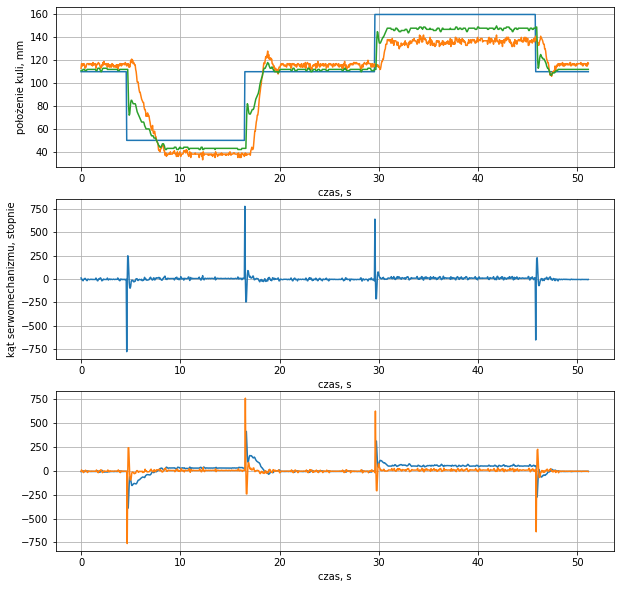

In [35]:
#from state
# 129 27 10
# K, S, E = control.dlqr(dsys, [[1000, 0, 0], [0, 1, 0], [0,0,1]], 1)
d6=[[129,27,110,113,111,-8,-3,-3,11,103,92],[129,27,110,117,111,-7,10,-7,-4,103,107],[129,27,110,115,111,0,-3,-5,-9,103,112],[129,27,110,115,111,0,-8,-5,-4,103,107],[129,27,110,117,112,-1,-4,-7,-19,103,122],[129,27,110,116,112,-1,-18,-6,-5,103,108],[129,27,110,117,112,-8,-5,-7,0,103,103],[129,27,110,116,112,-9,0,-6,-1,103,104],[129,27,110,113,111,-8,0,-3,8,103,95],[129,27,110,114,111,-6,7,-4,-3,103,106],[129,27,110,114,111,-1,-2,-4,-8,103,111],[129,27,110,116,111,0,-7,-6,-5,103,108],[129,27,110,117,112,-1,-5,-7,-18,103,121],[129,27,110,117,112,-1,-17,-7,-6,103,109],[129,27,110,117,112,-7,-6,-7,0,103,103],[129,27,110,117,112,-8,0,-7,-4,103,107],[129,27,110,116,112,-6,-3,-6,-6,103,109],[129,27,110,117,112,-5,-5,-7,-7,103,110],[129,27,110,117,112,-5,-6,-7,-6,103,109],[129,27,110,117,112,-6,-6,-7,-3,103,106],[129,27,110,116,112,-7,-3,-6,-3,103,106],[129,27,110,116,112,-7,-3,-6,-3,103,106],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,115,112,-6,-5,-5,-4,103,107],[129,27,110,118,112,-6,-4,-8,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,113,111,-7,-4,-3,10,103,93],[129,27,110,116,111,-7,9,-6,-3,103,106],[129,27,110,116,111,0,-2,-6,-10,103,113],[129,27,110,117,112,1,-9,-7,-19,103,122],[129,27,110,117,113,-1,-18,-7,-18,103,121],[129,27,110,118,113,-8,-18,-8,0,103,103],[129,27,110,117,113,-15,0,-7,1,103,102],[129,27,110,117,113,-13,0,-7,-3,103,106],[129,27,110,115,112,-12,-2,-5,8,103,95],[129,27,110,114,111,-12,7,-4,12,103,91],[129,27,110,113,110,-7,11,-3,7,103,96],[129,27,110,115,110,0,7,-5,-7,103,110],[129,27,110,116,111,5,-6,-6,-20,103,123],[129,27,110,115,112,3,-19,-5,-14,103,117],[129,27,110,118,113,-4,-14,-8,-13,103,116],[129,27,110,116,113,-9,-13,-6,-1,103,104],[129,27,110,119,113,-13,-1,-9,-2,103,105],[129,27,110,117,113,-12,-1,-7,-5,103,108],[129,27,110,117,113,-11,-4,-7,-5,103,108],[129,27,110,116,113,-11,-4,-6,-5,103,108],[129,27,110,117,113,-11,-4,-7,-5,103,108],[129,27,110,117,113,-11,-4,-7,-5,103,108],[129,27,110,116,113,-11,-4,-6,-5,103,108],[129,27,110,114,112,-12,-4,-4,10,103,93],[129,27,110,117,112,-12,9,-7,-2,103,105],[129,27,110,117,112,-5,-1,-7,-11,103,114],[129,27,110,115,112,-4,-10,-5,-5,103,108],[129,27,110,114,112,-8,-5,-4,0,103,103],[129,27,110,116,112,-9,0,-6,-1,103,104],[129,27,110,116,112,-7,0,-6,-6,103,109],[129,27,110,114,112,-6,-5,-4,-4,103,107],[129,27,110,114,112,-7,-4,-4,-2,103,105],[129,27,110,117,112,-7,-2,-7,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,115,112,-6,-5,-5,-4,103,107],[129,27,110,116,112,-7,-4,-6,-2,103,105],[129,27,110,114,112,-8,-2,-4,-2,103,105],[129,27,110,115,112,-7,-2,-5,-4,103,107],[129,27,110,115,112,-6,-3,-5,-6,103,109],[129,27,110,114,112,-6,-5,-4,-4,103,107],[129,27,110,114,112,-7,-4,-4,-2,103,105],[129,27,110,116,112,-7,-2,-6,-4,103,107],[129,27,110,114,112,-7,-3,-4,-3,103,106],[129,27,110,116,112,-7,-3,-6,-3,103,106],[129,27,110,112,111,-8,-3,-2,11,103,92],[129,27,110,116,111,-7,10,-6,-4,103,107],[129,27,110,116,111,0,-3,-6,-9,103,112],[129,27,110,115,111,0,-8,-5,-4,103,107],[129,27,110,117,112,-1,-4,-7,-19,103,122],[129,27,110,117,112,-1,-18,-7,-5,103,108],[129,27,110,117,112,-8,-5,-7,0,103,103],[129,27,110,115,112,-9,0,-5,-1,103,104],[129,27,110,117,112,-7,0,-7,-6,103,109],[129,27,110,116,112,-5,-5,-6,-7,103,110],[129,27,110,116,112,-6,-6,-6,-3,103,106],[129,27,110,117,112,-7,-3,-7,-3,103,106],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,117,112,-5,-5,-7,-7,103,110],[129,27,110,116,112,-6,-6,-6,-3,103,106],[129,27,110,118,112,-6,-3,-8,-6,103,109],[129,27,110,117,112,-5,-5,-7,-7,103,110],[129,27,110,116,112,-6,-6,-6,-3,103,106],[129,27,50,115,112,-7,-3,-65,-777,103,180],[129,27,50,117,112,-6,-761,-67,-22,103,125],[129,27,50,116,112,-375,-36,-66,248,103,0],[129,27,50,117,94,-390,242,-67,243,103,0],[129,27,50,114,78,-265,242,-64,112,103,0],[129,27,50,116,72,-133,114,-66,-38,103,141],[129,27,50,114,73,-62,-34,-64,-95,103,180],[129,27,50,116,78,-63,-93,-66,-98,103,180],[129,27,50,120,83,-93,-97,-70,-77,103,180],[129,27,50,118,85,-128,-77,-68,-28,103,131],[129,27,50,121,85,-152,-28,-71,-13,103,116],[129,27,50,119,84,-153,-13,-69,-12,103,115],[129,27,50,120,83,-146,-12,-70,-19,103,122],[129,27,50,117,82,-139,-18,-67,-19,103,122],[129,27,50,118,82,-135,-18,-68,-30,103,133],[129,27,50,117,82,-131,-29,-67,-30,103,133],[129,27,50,116,82,-133,-29,-66,-24,103,127],[129,27,50,116,82,-135,-24,-66,-24,103,127],[129,27,50,112,81,-136,-24,-62,-8,103,111],[129,27,50,110,79,-137,-8,-60,3,103,100],[129,27,50,106,77,-131,2,-56,3,103,100],[129,27,50,101,75,-121,2,-51,2,103,101],[129,27,50,101,74,-110,2,-51,-14,103,117],[129,27,50,101,73,-99,-13,-51,-16,103,119],[129,27,50,97,72,-96,-15,-47,-9,103,112],[129,27,50,94,71,-95,-9,-44,-5,103,108],[129,27,50,92,70,-92,-5,-42,-4,103,107],[129,27,50,92,69,-86,-4,-42,-8,103,111],[129,27,50,90,68,-80,-7,-40,-9,103,112],[129,27,50,88,67,-76,-8,-38,-6,103,109],[129,27,50,86,66,-73,-6,-36,-3,103,106],[129,27,50,85,66,-69,-3,-35,-17,103,120],[129,27,50,84,66,-64,-16,-34,-17,103,120],[129,27,50,83,66,-65,-16,-33,-14,103,117],[129,27,50,83,66,-66,-14,-33,-14,103,117],[129,27,50,79,65,-68,-14,-29,4,103,99],[129,27,50,77,63,-70,3,-27,18,103,85],[129,27,50,77,62,-63,17,-27,-1,103,104],[129,27,50,75,61,-50,0,-25,-6,103,109],[129,27,50,71,60,-46,-5,-21,0,103,103],[129,27,50,73,60,-43,0,-23,-12,103,115],[129,27,50,71,60,-39,-11,-21,-12,103,115],[129,27,50,74,60,-39,-11,-24,-12,103,115],[129,27,50,71,60,-40,-11,-21,-10,103,113],[129,27,50,72,60,-41,-10,-22,-8,103,111],[129,27,50,71,60,-42,-8,-21,-7,103,110],[129,27,50,68,59,-43,-7,-18,7,103,96],[129,27,50,66,58,-43,6,-16,6,103,97],[129,27,50,63,56,-38,6,-13,19,103,84],[129,27,50,61,55,-33,18,-11,6,103,97],[129,27,50,59,54,-22,6,-9,1,103,102],[129,27,50,60,54,-16,1,-10,-9,103,112],[129,27,50,63,54,-12,-8,-13,-11,103,114],[129,27,50,58,54,-14,-10,-8,-3,103,106],[129,27,50,56,53,-18,-3,-6,12,103,91],[129,27,50,56,52,-18,11,-6,11,103,92],[129,27,50,58,52,-10,11,-8,-9,103,112],[129,27,50,56,52,-3,-8,-6,-9,103,112],[129,27,50,53,52,-6,-8,-3,-1,103,104],[129,27,50,53,51,-9,-1,-3,12,103,91],[129,27,50,50,50,-9,11,0,13,103,90],[129,27,50,49,49,-3,12,1,9,103,94],[129,27,50,48,48,2,9,2,11,103,92],[129,27,50,47,47,6,10,3,12,103,91],[129,27,50,42,46,9,11,8,16,103,87],[129,27,50,41,45,12,15,9,17,103,86],[129,27,50,42,45,18,16,8,0,103,103],[129,27,50,40,44,24,0,10,12,103,91],[129,27,50,42,44,23,11,8,4,103,99],[129,27,50,43,44,28,4,7,-2,103,105],[129,27,50,43,45,29,-1,7,-12,103,115],[129,27,50,45,46,28,-11,5,-13,103,116],[129,27,50,45,47,22,-12,5,-8,103,111],[129,27,50,45,47,15,-8,5,6,103,97],[129,27,50,46,47,10,5,4,6,103,97],[129,27,50,41,46,10,5,9,19,103,84],[129,27,50,41,45,10,18,9,19,103,84],[129,27,50,37,43,15,18,13,31,103,72],[129,27,50,38,42,22,30,12,13,103,90],[129,27,50,39,42,35,13,11,-4,103,107],[129,27,50,36,42,39,-3,14,0,103,103],[129,27,50,38,43,36,0,12,-6,103,109],[129,27,50,37,43,33,-5,13,6,103,97],[129,27,50,38,43,28,5,12,9,103,94],[129,27,50,38,43,28,8,12,6,103,97],[129,27,50,38,43,30,6,12,3,103,100],[129,27,50,39,43,31,3,11,3,103,100],[129,27,50,38,43,30,3,12,6,103,97],[129,27,50,40,43,30,5,10,4,103,99],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,39,43,30,4,11,5,103,98],[129,27,50,40,43,30,4,10,5,103,98],[129,27,50,39,43,30,4,11,5,103,98],[129,27,50,41,44,31,4,9,-10,103,113],[129,27,50,39,44,31,-9,11,2,103,101],[129,27,50,38,44,24,1,12,11,103,92],[129,27,50,38,44,22,10,12,8,103,95],[129,27,50,36,43,24,8,14,17,103,86],[129,27,50,36,42,25,16,14,19,103,84],[129,27,50,40,42,32,18,10,-1,103,104],[129,27,50,37,42,39,0,13,-2,103,105],[129,27,50,36,42,36,-1,14,7,103,96],[129,27,50,38,43,34,6,12,-7,103,110],[129,27,50,38,43,35,-6,12,1,103,102],[129,27,50,40,44,31,0,10,-6,103,109],[129,27,50,37,44,28,-5,13,6,103,97],[129,27,50,36,43,22,5,14,25,103,78],[129,27,50,38,43,22,24,12,6,103,97],[129,27,50,38,43,31,6,12,0,103,103],[129,27,50,38,43,32,0,12,3,103,100],[129,27,50,38,43,30,2,12,7,103,96],[129,27,50,39,43,29,6,11,6,103,97],[129,27,50,41,44,31,6,9,-12,103,115],[129,27,50,41,44,32,-11,9,2,103,101],[129,27,50,40,44,25,1,10,8,103,95],[129,27,50,41,44,24,7,9,5,103,98],[129,27,50,39,44,25,5,11,4,103,99],[129,27,50,42,44,26,4,8,3,103,100],[129,27,50,41,44,26,3,9,4,103,99],[129,27,50,41,44,26,3,9,4,103,99],[129,27,50,38,44,25,3,12,6,103,97],[129,27,50,37,43,24,5,13,20,103,83],[129,27,50,36,42,23,19,14,22,103,81],[129,27,50,37,42,30,21,13,1,103,102],[129,27,50,40,43,39,1,10,-16,103,119],[129,27,50,38,43,37,-15,12,5,103,98],[129,27,50,35,43,26,4,15,16,103,87],[129,27,50,39,43,26,15,11,5,103,98],[129,27,50,38,43,31,5,12,1,103,102],[129,27,50,38,43,31,1,12,5,103,98],[129,27,50,38,43,29,4,12,8,103,95],[129,27,50,38,43,29,7,12,5,103,98],[129,27,50,38,43,30,5,12,4,103,99],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,39,43,30,4,11,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,35,42,29,4,15,20,103,83],[129,27,50,38,42,29,19,12,5,103,98],[129,27,50,38,42,36,5,12,1,103,102],[129,27,50,38,43,37,1,12,-10,103,113],[129,27,50,39,44,36,-9,11,-10,103,113],[129,27,50,36,44,28,-9,14,10,103,93],[129,27,50,38,44,21,9,12,11,103,92],[129,27,50,33,42,21,10,17,36,103,67],[129,27,50,40,42,25,35,10,0,103,103],[129,27,50,38,42,40,0,12,-4,103,107],[129,27,50,37,43,38,-3,13,-9,103,112],[129,27,50,38,43,34,-8,12,6,103,97],[129,27,50,38,43,28,5,12,9,103,94],[129,27,50,38,43,28,8,12,6,103,97],[129,27,50,38,43,30,6,12,3,103,100],[129,27,50,38,43,31,3,12,3,103,100],[129,27,50,38,43,30,3,12,6,103,97],[129,27,50,38,43,29,5,12,7,103,96],[129,27,50,37,43,29,6,13,6,103,97],[129,27,50,38,43,30,6,12,3,103,100],[129,27,50,37,43,30,3,13,6,103,97],[129,27,50,38,43,29,5,12,7,103,96],[129,27,50,38,43,29,6,12,6,103,97],[129,27,50,38,43,30,6,12,3,103,100],[129,27,50,37,43,30,3,13,6,103,97],[129,27,50,38,43,29,5,12,7,103,96],[129,27,50,38,43,29,6,12,6,103,97],[129,27,50,36,43,29,6,14,6,103,97],[129,27,50,37,43,29,6,13,6,103,97],[129,27,50,38,43,30,6,12,3,103,100],[129,27,50,38,43,31,3,12,3,103,100],[129,27,50,38,43,30,3,12,6,103,97],[129,27,50,35,42,28,5,15,22,103,81],[129,27,50,40,43,29,21,10,-9,103,112],[129,27,50,38,43,37,-8,12,-1,103,104],[129,27,50,38,43,31,-1,12,7,103,96],[129,27,50,38,43,28,6,12,8,103,95],[129,27,50,36,43,28,7,14,7,103,96],[129,27,50,37,43,29,7,13,5,103,98],[129,27,50,38,43,30,5,12,4,103,99],[129,27,50,37,43,30,4,13,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,37,43,29,4,13,8,103,95],[129,27,50,39,43,29,7,11,5,103,98],[129,27,50,38,43,30,5,12,4,103,99],[129,27,50,37,43,30,4,13,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,37,43,29,4,13,8,103,95],[129,27,50,38,43,29,7,12,5,103,98],[129,27,50,37,43,30,5,13,4,103,99],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,38,43,30,4,12,5,103,98],[129,27,50,37,43,29,4,13,8,103,95],[129,27,50,39,43,29,7,11,5,103,98],[129,27,50,38,43,30,5,12,4,103,99],[129,27,50,40,43,31,4,10,2,103,101],[129,27,50,38,43,31,2,12,4,103,99],[129,27,50,37,43,29,3,13,9,103,94],[129,27,50,38,43,28,8,12,6,103,97],[129,27,50,38,43,30,6,12,3,103,100],[129,27,50,38,43,31,3,12,3,103,100],[129,27,50,38,43,30,3,12,6,103,97],[129,27,50,39,43,30,5,11,4,103,99],[129,27,50,39,43,31,4,11,2,103,101],[129,27,50,39,43,31,2,11,4,103,99],[129,27,50,38,43,30,3,12,6,103,97],[129,27,50,38,43,29,5,12,7,103,96],[129,27,50,38,43,29,6,12,6,103,97],[129,27,50,38,43,30,6,12,3,103,100],[129,27,50,38,43,31,3,12,3,103,100],[129,27,50,38,43,30,3,12,6,103,97],[129,27,50,35,42,28,5,15,22,103,81],[129,27,50,39,42,29,21,11,3,103,100],[129,27,50,38,42,37,3,12,0,103,103],[129,27,50,37,42,36,0,13,6,103,97],[129,27,50,35,42,33,5,15,9,103,94],[129,27,50,38,42,34,8,12,3,103,100],[129,27,50,35,42,35,3,15,5,103,98],[129,27,50,36,42,34,4,14,7,103,96],[129,27,50,39,43,34,6,11,-7,103,110],[129,27,50,38,43,35,-6,12,1,103,102],[129,27,50,38,43,30,0,12,9,103,94],[129,27,50,38,43,28,8,12,6,103,97],[129,27,50,37,43,29,6,13,6,103,97],[129,27,50,36,43,29,6,14,6,103,97],[129,27,110,38,43,30,6,72,777,103,0],[129,27,110,39,43,31,761,71,19,103,84],[129,27,110,37,43,399,33,73,-246,103,180],[129,27,110,38,61,413,-240,72,-243,103,180],[129,27,110,37,76,287,-242,73,-94,103,180],[129,27,110,38,82,155,-96,72,38,103,65],[129,27,110,38,81,92,35,72,90,103,13],[129,27,110,38,77,94,88,72,83,103,20],[129,27,110,38,74,123,83,72,49,103,54],[129,27,110,38,73,150,49,72,23,103,80],[129,27,110,38,73,161,23,72,19,103,84],[129,27,110,37,73,159,19,73,29,103,74],[129,27,110,41,74,157,28,69,12,103,91],[129,27,110,42,75,159,12,68,10,103,93],[129,27,110,44,76,154,10,66,12,103,91],[129,27,110,42,77,147,11,68,17,103,86],[129,27,110,42,77,140,16,68,31,103,72],[129,27,110,43,77,135,30,67,31,103,72],[129,27,110,48,78,139,30,62,7,103,96],[129,27,110,53,80,144,7,57,-8,103,111],[129,27,110,58,82,139,-7,52,-7,103,110],[129,27,110,58,84,127,-7,52,0,103,103],[129,27,110,62,86,115,0,48,0,103,103],[129,27,110,66,87,108,0,44,5,103,98],[129,27,110,68,88,101,4,42,7,103,96],[129,27,110,72,89,97,6,38,3,103,100],[129,27,110,72,90,93,3,38,3,103,100],[129,27,110,75,91,89,3,35,1,103,102],[129,27,110,81,93,86,1,29,-13,103,116],[129,27,110,86,95,84,-12,24,-21,103,124],[129,27,110,90,98,76,-20,20,-30,103,133],[129,27,110,93,100,64,-29,17,-14,103,117],[129,27,110,97,102,48,-14,13,-12,103,115],[129,27,110,99,103,40,-12,11,-5,103,108],[129,27,110,104,105,34,-5,6,-22,103,125],[129,27,110,105,106,31,-21,5,-11,103,114],[129,27,110,109,108,21,-11,1,-19,103,122],[129,27,110,113,110,17,-18,-3,-27,103,130],[129,27,110,117,112,10,-26,-7,-26,103,129],[129,27,110,118,113,0,-26,-8,-12,103,115],[129,27,110,117,113,-11,-12,-7,3,103,100],[129,27,110,120,113,-14,2,-10,-2,103,105],[129,27,110,123,114,-9,-1,-13,-26,103,129],[129,27,110,122,115,-6,-25,-12,-23,103,126],[129,27,110,124,116,-15,-23,-14,-13,103,116],[129,27,110,125,117,-23,-13,-15,-15,103,118],[129,27,110,128,118,-25,-14,-18,-21,103,124],[129,27,110,122,117,-30,-20,-12,10,103,93],[129,27,110,125,117,-36,9,-15,-2,103,105],[129,27,110,121,115,-30,-1,-11,17,103,86],[129,27,110,122,114,-28,16,-12,8,103,95],[129,27,110,121,113,-17,8,-11,0,103,103],[129,27,110,122,113,-9,0,-12,-14,103,117],[129,27,110,120,113,-6,-13,-10,-9,103,112],[129,27,110,121,114,-9,-9,-11,-18,103,121],[129,27,110,117,114,-12,-17,-7,-2,103,105],[129,27,110,117,113,-19,-2,-7,14,103,89],[129,27,110,116,112,-18,13,-6,9,103,94],[129,27,110,114,111,-10,9,-4,5,103,98],[129,27,110,115,111,-4,5,-5,-7,103,110],[129,27,110,112,110,-1,-6,-2,8,103,95],[129,27,110,112,110,-3,7,-2,1,103,102],[129,27,110,113,110,1,1,-3,-3,103,106],[129,27,110,110,110,1,-2,0,0,103,103],[129,27,110,110,110,0,0,0,0,103,103],[129,27,110,112,110,0,0,-2,0,103,103],[129,27,110,111,110,0,0,-1,0,103,103],[129,27,110,108,109,0,0,2,12,103,91],[129,27,110,112,109,1,11,-2,0,103,103],[129,27,110,114,110,8,0,-4,-21,103,124],[129,27,110,114,111,9,-20,-4,-17,103,120],[129,27,110,114,112,0,-17,-4,-8,103,111],[129,27,110,116,112,-6,-8,-6,-1,103,104],[129,27,110,117,112,-8,-1,-7,-3,103,106],[129,27,110,116,112,-7,-2,-6,-4,103,107],[129,27,110,116,112,-6,-3,-6,-6,103,109],[129,27,110,117,112,-5,-5,-7,-7,103,110],[129,27,110,117,112,-5,-6,-7,-6,103,109],[129,27,110,116,112,-6,-6,-6,-3,103,106],[129,27,110,115,112,-7,-3,-5,-3,103,106],[129,27,110,115,112,-7,-3,-5,-3,103,106],[129,27,110,116,112,-7,-3,-6,-3,103,106],[129,27,110,115,112,-7,-3,-5,-3,103,106],[129,27,110,115,112,-7,-3,-5,-3,103,106],[129,27,110,114,112,-7,-3,-4,-3,103,106],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,117,112,-5,-5,-7,-7,103,110],[129,27,110,116,112,-6,-6,-6,-3,103,106],[129,27,110,116,112,-7,-3,-6,-3,103,106],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,117,112,-5,-5,-7,-7,103,110],[129,27,110,115,112,-6,-6,-5,-3,103,106],[129,27,110,117,112,-7,-3,-7,-3,103,106],[129,27,110,113,111,-8,-3,-3,11,103,92],[129,27,110,114,111,-8,10,-4,-1,103,104],[129,27,110,117,111,-1,0,-7,-10,103,113],[129,27,110,117,112,1,-9,-7,-19,103,122],[129,27,110,117,113,-1,-18,-7,-18,103,121],[129,27,110,116,113,-8,-18,-6,0,103,103],[129,27,110,117,113,-15,0,-7,1,103,102],[129,27,110,116,112,-13,0,-6,9,103,94],[129,27,110,115,111,-11,8,-5,8,103,95],[129,27,110,116,111,-5,8,-6,-7,103,110],[129,27,110,116,111,0,-6,-6,-6,103,109],[129,27,110,114,111,-1,-6,-4,-4,103,107],[129,27,110,115,111,-2,-4,-5,-3,103,106],[129,27,110,117,112,-1,-3,-7,-20,103,123],[129,27,110,117,112,0,-19,-7,-6,103,109],[129,27,110,117,112,-7,-6,-7,0,103,103],[129,27,110,116,112,-8,0,-6,-4,103,107],[129,27,110,115,112,-6,-3,-5,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,114,112,-7,-4,-4,-2,103,105],[129,27,110,115,112,-7,-2,-5,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,114,112,-6,-5,-4,-4,103,107],[129,27,110,115,112,-7,-4,-5,-2,103,105],[129,27,110,114,112,-8,-2,-4,-2,103,105],[129,27,110,117,112,-7,-2,-7,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,114,112,-6,-5,-4,-4,103,107],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,118,112,-5,-4,-8,-8,103,111],[129,27,110,113,111,-6,-7,-3,10,103,93],[129,27,110,116,111,-7,9,-6,-3,103,106],[129,27,110,117,111,0,-2,-7,-10,103,113],[129,27,110,118,112,1,-9,-8,-19,103,122],[129,27,110,117,113,-1,-18,-7,-18,103,121],[129,27,110,117,113,-8,-18,-7,0,103,103],[129,27,110,117,113,-15,0,-7,1,103,102],[129,27,110,112,112,-15,0,-2,14,103,89],[129,27,110,117,112,-13,13,-7,-3,103,106],[129,27,110,112,111,-6,-2,-2,5,103,98],[129,27,110,112,110,-6,4,-2,12,103,91],[129,27,110,113,110,-3,11,-3,-2,103,105],[129,27,110,112,110,3,-1,-2,-7,103,110],[129,27,110,115,111,4,-6,-5,-17,103,120],[129,27,110,115,111,2,-16,-5,-2,103,105],[129,27,110,116,112,-4,-2,-6,-13,103,116],[129,27,110,115,112,-3,-12,-5,-5,103,108],[129,27,110,116,112,-7,-5,-6,-1,103,104],[129,27,110,116,112,-8,-1,-6,-3,103,106],[129,27,110,117,112,-6,-2,-7,-7,103,110],[129,27,110,113,111,-6,-6,-3,9,103,94],[129,27,110,117,111,-6,8,-7,-4,103,107],[129,27,110,117,111,0,-3,-7,-9,103,112],[129,27,110,114,111,0,-8,-4,-4,103,107],[129,27,110,119,112,-1,-4,-9,-19,103,122],[129,27,110,117,112,-1,-18,-7,-5,103,108],[129,27,110,116,112,-8,-5,-6,0,103,103],[129,27,110,115,112,-9,0,-5,-1,103,104],[129,27,110,114,111,-8,0,-4,8,103,95],[129,27,110,117,111,-5,7,-7,-6,103,109],[129,27,110,115,111,0,-5,-5,-7,103,110],[129,27,110,116,111,0,-6,-6,-6,103,109],[129,27,110,116,111,-1,-6,-6,-4,103,107],[129,27,110,117,112,-1,-4,-7,-19,103,122],[129,27,110,116,112,-1,-18,-6,-5,103,108],[129,27,110,115,112,-8,-5,-5,0,103,103],[129,27,110,117,112,-8,0,-7,-4,103,107],[129,27,110,115,112,-6,-3,-5,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,116,112,-7,-4,-6,-2,103,105],[129,27,110,117,112,-7,-2,-7,-4,103,107],[129,27,110,113,111,-7,-3,-3,9,103,94],[129,27,110,114,111,-7,8,-4,-2,103,105],[129,27,110,115,111,-1,-1,-5,-9,103,112],[129,27,110,116,111,0,-8,-6,-4,103,107],[129,27,110,114,111,-2,-4,-4,-3,103,106],[129,27,110,117,112,-1,-3,-7,-20,103,123],[129,27,110,117,112,0,-19,-7,-6,103,109],[129,27,110,117,112,-7,-6,-7,0,103,103],[129,27,110,116,112,-8,0,-6,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,116,112,-7,-4,-6,-2,103,105],[129,27,110,115,112,-7,-2,-5,-4,103,107],[129,27,110,114,112,-7,-3,-4,-3,103,106],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,116,112,-7,-4,-6,-2,103,105],[129,27,110,115,112,-7,-2,-5,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,115,112,-6,-4,-5,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,114,112,-7,-4,-4,-2,103,105],[129,27,110,115,112,-7,-2,-5,-4,103,107],[129,27,110,115,112,-6,-3,-5,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,115,112,-7,-4,-5,-2,103,105],[129,27,110,116,112,-7,-2,-6,-4,103,107],[129,27,110,113,111,-7,-3,-3,9,103,94],[129,27,110,116,111,-6,8,-6,-4,103,107],[129,27,110,113,111,-1,-3,-3,-7,103,110],[129,27,110,117,112,0,-6,-7,-19,103,122],[129,27,110,116,112,-1,-18,-6,-5,103,108],[129,27,110,119,113,-7,-5,-9,-14,103,117],[129,27,110,115,113,-8,-13,-5,-4,103,107],[129,27,110,114,112,-13,-4,-4,13,103,90],[129,27,110,116,112,-13,12,-6,-2,103,105],[129,27,110,112,111,-7,-1,-2,7,103,96],[129,27,110,114,111,-6,6,-4,-2,103,105],[129,27,110,114,111,-2,-1,-4,-6,103,109],[129,27,110,114,111,-1,-5,-4,-5,103,108],[129,27,110,116,111,-1,-5,-6,-5,103,108],[129,27,110,114,111,-2,-5,-4,-2,103,105],[129,27,110,115,111,-3,-2,-5,-2,103,105],[129,27,110,117,112,-1,-2,-7,-21,103,124],[129,27,110,117,112,0,-20,-7,-5,103,108],[129,27,110,116,112,-8,-5,-6,0,103,103],[129,27,110,117,112,-8,0,-7,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,116,112,-7,-4,-6,-2,103,105],[129,27,110,118,112,-6,-2,-8,-7,103,110],[129,27,110,118,112,-4,-6,-8,-9,103,112],[129,27,110,117,112,-5,-8,-7,-4,103,107],[129,27,110,118,112,-6,-4,-8,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,118,112,-5,-4,-8,-8,103,111],[129,27,110,117,112,-5,-7,-7,-5,103,108],[129,27,110,117,112,-6,-5,-7,-4,103,107],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,115,112,-6,-4,-5,-5,103,108],[129,27,110,113,111,-7,-4,-3,10,103,93],[129,27,110,112,110,-8,9,-2,12,103,91],[129,27,110,113,110,-2,11,-3,-5,103,108],[129,27,110,116,111,5,-4,-6,-22,103,125],[129,27,110,116,112,4,-21,-6,-15,103,118],[129,27,110,114,112,-5,-15,-4,2,103,101],[129,27,110,117,112,-10,1,-7,0,103,103],[129,27,110,117,112,-7,0,-7,-6,103,109],[129,27,110,118,112,-4,-5,-8,-10,103,113],[129,27,110,117,112,-4,-9,-7,-6,103,109],[129,27,110,117,112,-6,-6,-7,-3,103,106],[129,27,110,117,112,-7,-3,-7,-3,103,106],[129,27,110,116,112,-7,-3,-6,-3,103,106],[129,27,110,118,112,-6,-3,-8,-6,103,109],[129,27,110,117,112,-5,-5,-7,-7,103,110],[129,27,110,120,113,-4,-6,-10,-21,103,124],[129,27,110,118,113,-5,-20,-8,-5,103,108],[129,27,110,117,113,-13,-5,-7,1,103,102],[129,27,110,117,113,-14,0,-7,0,103,103],[129,27,110,117,113,-12,0,-7,-6,103,109],[129,27,110,117,113,-10,-5,-7,-6,103,109],[129,27,110,115,112,-11,-5,-5,8,103,95],[129,27,110,114,111,-12,7,-4,12,103,91],[129,27,110,117,111,-6,11,-7,-7,103,110],[129,27,110,117,111,1,-6,-7,-9,103,112],[129,27,110,114,111,0,-8,-4,-4,103,107],[129,27,110,116,111,-2,-4,-6,-3,103,106],[129,27,110,115,111,-2,-3,-5,-4,103,107],[129,27,110,117,112,-1,-3,-7,-20,103,123],[129,27,160,115,112,-1,-19,45,640,103,0],[129,27,160,114,112,-9,626,46,17,103,86],[129,27,160,116,112,297,29,44,-211,103,180],[129,27,160,115,127,312,-206,45,-210,103,180],[129,27,160,116,140,207,-209,44,-91,103,180],[129,27,160,115,145,96,-93,45,27,103,76],[129,27,160,116,144,40,24,44,74,103,29],[129,27,160,114,140,41,73,46,74,103,29],[129,27,160,115,137,67,73,45,42,103,61],[129,27,160,114,135,94,42,46,26,103,77],[129,27,160,112,135,106,26,48,10,103,93],[129,27,160,112,135,110,10,48,15,103,88],[129,27,160,114,136,107,14,46,6,103,97],[129,27,160,117,137,107,6,43,1,103,102],[129,27,160,119,138,103,1,41,4,103,99],[129,27,160,119,139,96,3,41,8,103,95],[129,27,160,121,140,91,7,39,5,103,98],[129,27,160,121,140,87,5,39,18,103,85],[129,27,160,124,141,83,17,36,4,103,99],[129,27,160,127,142,86,4,33,-4,103,107],[129,27,160,129,143,83,-3,31,-1,103,104],[129,27,160,130,144,77,-1,30,0,103,103],[129,27,160,134,145,73,0,26,-3,103,106],[129,27,160,134,146,69,-2,26,-3,103,106],[129,27,160,134,147,63,-2,26,0,103,103],[129,27,160,138,148,58,0,22,-1,103,104],[129,27,160,138,148,54,0,22,9,103,94],[129,27,160,138,148,50,8,22,11,103,92],[129,27,160,137,148,50,10,23,9,103,94],[129,27,160,138,148,51,9,22,8,103,95],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,135,148,50,8,25,11,103,92],[129,27,160,135,147,49,10,25,25,103,78],[129,27,160,137,147,50,24,23,8,103,95],[129,27,160,139,147,58,8,21,3,103,100],[129,27,160,135,147,57,3,25,10,103,93],[129,27,160,137,147,54,9,23,12,103,91],[129,27,160,133,146,53,11,27,26,103,77],[129,27,160,137,146,55,25,23,7,103,96],[129,27,160,137,146,64,7,23,0,103,103],[129,27,160,137,147,64,0,23,-5,103,108],[129,27,160,137,148,60,-4,23,-3,103,106],[129,27,160,136,148,53,-3,24,14,103,89],[129,27,160,135,148,47,13,25,14,103,89],[129,27,160,133,147,48,13,27,25,103,78],[129,27,160,136,147,50,24,24,8,103,95],[129,27,160,133,146,56,8,27,21,103,82],[129,27,160,133,146,55,20,27,12,103,91],[129,27,160,130,145,59,12,30,22,103,81],[129,27,160,132,145,60,21,28,10,103,93],[129,27,160,132,145,65,10,28,8,103,95],[129,27,160,132,145,65,8,28,10,103,93],[129,27,160,135,146,65,9,25,-3,103,106],[129,27,160,134,146,65,-2,26,7,103,96],[129,27,160,133,146,59,6,27,15,103,88],[129,27,160,134,146,57,14,26,12,103,91],[129,27,160,134,146,59,12,26,9,103,94],[129,27,160,135,146,61,9,25,6,103,97],[129,27,160,134,146,61,6,26,9,103,94],[129,27,160,133,146,59,8,27,13,103,90],[129,27,160,137,147,59,12,23,-3,103,106],[129,27,160,134,147,60,-2,26,7,103,96],[129,27,160,134,147,54,6,26,15,103,88],[129,27,160,135,147,52,14,25,13,103,90],[129,27,160,133,146,53,13,27,24,103,79],[129,27,160,132,145,54,23,28,24,103,79],[129,27,160,131,144,60,23,29,21,103,82],[129,27,160,133,144,67,21,27,4,103,99],[129,27,160,136,145,74,4,24,-10,103,113],[129,27,160,134,146,72,-9,26,-4,103,107],[129,27,160,137,147,64,-4,23,-1,103,104],[129,27,160,136,148,58,-1,24,0,103,103],[129,27,160,135,148,52,0,25,14,103,89],[129,27,160,135,148,47,13,25,14,103,89],[129,27,160,137,148,49,13,23,9,103,94],[129,27,160,138,148,51,9,22,8,103,95],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,139,148,51,8,21,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,136,148,50,8,24,11,103,92],[129,27,160,136,148,49,10,24,12,103,91],[129,27,160,134,147,48,11,26,27,103,76],[129,27,160,138,147,50,26,22,6,103,97],[129,27,160,137,147,59,6,23,2,103,101],[129,27,160,138,148,58,2,22,-3,103,106],[129,27,160,135,148,54,-2,25,11,103,92],[129,27,160,142,149,50,10,18,-3,103,106],[129,27,160,138,149,51,-2,22,6,103,97],[129,27,160,141,149,47,5,19,10,103,93],[129,27,160,139,149,45,9,21,11,103,92],[129,27,160,136,148,44,10,24,26,103,77],[129,27,160,139,148,45,25,21,8,103,95],[129,27,160,136,147,52,8,24,19,103,84],[129,27,160,141,148,53,18,19,-6,103,109],[129,27,160,142,149,59,-5,18,-12,103,115],[129,27,160,139,149,53,-11,21,9,103,94],[129,27,160,138,149,43,8,22,17,103,86],[129,27,160,139,149,43,16,21,9,103,94],[129,27,160,138,148,46,9,22,21,103,82],[129,27,160,138,148,46,20,22,10,103,93],[129,27,160,135,147,51,10,25,20,103,83],[129,27,160,136,147,52,19,24,8,103,95],[129,27,160,134,147,56,8,26,8,103,95],[129,27,160,135,147,55,8,25,11,103,92],[129,27,160,135,147,54,10,25,11,103,92],[129,27,160,137,147,55,10,23,9,103,94],[129,27,160,136,147,56,9,24,7,103,96],[129,27,160,140,148,57,7,20,-6,103,109],[129,27,160,133,147,55,-5,27,24,103,79],[129,27,160,138,147,49,23,22,12,103,91],[129,27,160,135,147,56,12,25,4,103,99],[129,27,160,137,147,58,4,23,7,103,96],[129,27,160,133,147,55,6,27,13,103,90],[129,27,160,133,147,53,12,27,12,103,91],[129,27,160,133,146,53,12,27,25,103,78],[129,27,160,135,146,55,24,25,8,103,95],[129,27,160,134,146,62,8,26,5,103,98],[129,27,160,132,146,61,5,28,10,103,93],[129,27,160,133,146,58,9,27,15,103,88],[129,27,160,133,146,57,14,27,12,103,91],[129,27,160,137,147,60,12,23,-6,103,109],[129,27,160,136,147,62,-5,24,5,103,98],[129,27,160,137,148,56,4,23,0,103,103],[129,27,160,136,148,53,0,24,11,103,92],[129,27,160,136,148,48,10,24,15,103,88],[129,27,160,137,148,49,14,23,8,103,95],[129,27,160,132,147,50,8,28,24,103,79],[129,27,160,134,146,49,23,26,25,103,78],[129,27,160,133,145,55,24,27,21,103,82],[129,27,160,135,145,63,21,25,2,103,101],[129,27,160,135,146,69,2,25,-7,103,110],[129,27,160,134,147,65,-6,26,-1,103,104],[129,27,160,137,148,58,-1,23,0,103,103],[129,27,160,137,148,53,0,23,11,103,92],[129,27,160,133,147,47,10,27,30,103,73],[129,27,160,136,147,48,29,24,9,103,94],[129,27,160,135,147,57,9,25,4,103,99],[129,27,160,134,147,56,4,26,12,103,91],[129,27,160,135,147,53,11,25,13,103,90],[129,27,160,134,147,53,12,26,12,103,91],[129,27,160,136,147,55,12,24,7,103,96],[129,27,160,135,147,56,7,25,9,103,94],[129,27,160,136,147,55,8,24,11,103,92],[129,27,160,137,147,55,10,23,9,103,94],[129,27,160,134,147,55,9,26,10,103,93],[129,27,160,135,147,55,9,25,10,103,93],[129,27,160,136,147,55,9,24,10,103,93],[129,27,160,134,147,54,9,26,12,103,91],[129,27,160,139,148,55,11,21,-4,103,107],[129,27,160,132,147,54,-3,28,24,103,79],[129,27,160,135,147,48,23,25,15,103,88],[129,27,160,138,147,56,15,22,1,103,102],[129,27,160,136,147,59,1,24,7,103,96],[129,27,160,134,147,54,6,26,15,103,88],[129,27,160,135,147,52,14,25,13,103,90],[129,27,160,134,147,54,13,26,8,103,95],[129,27,160,136,147,56,8,24,8,103,95],[129,27,160,134,147,55,8,26,11,103,92],[129,27,160,140,148,56,10,20,-6,103,109],[129,27,160,140,149,58,-5,20,-9,103,112],[129,27,160,138,149,51,-8,22,12,103,91],[129,27,160,139,149,43,11,21,14,103,89],[129,27,160,136,148,43,13,24,25,103,78],[129,27,160,136,147,45,24,24,22,103,81],[129,27,160,136,147,52,22,24,5,103,98],[129,27,160,136,147,58,5,24,6,103,97],[129,27,160,139,148,57,5,21,-4,103,107],[129,27,160,135,148,54,-3,25,12,103,91],[129,27,160,136,148,48,11,24,14,103,89],[129,27,160,138,148,49,13,22,9,103,94],[129,27,160,134,147,50,9,26,23,103,80],[129,27,160,137,147,50,22,23,10,103,93],[129,27,160,139,147,57,10,21,3,103,100],[129,27,160,137,147,58,3,23,8,103,95],[129,27,160,138,148,56,7,22,-3,103,106],[129,27,160,136,148,55,-2,24,8,103,95],[129,27,160,137,148,50,7,23,12,103,91],[129,27,160,136,148,49,11,24,11,103,92],[129,27,160,136,148,50,11,24,8,103,95],[129,27,160,133,147,50,8,27,24,103,79],[129,27,160,133,146,49,23,27,25,103,78],[129,27,160,133,145,55,24,27,21,103,82],[129,27,160,133,145,62,21,27,5,103,98],[129,27,160,135,146,68,5,25,-8,103,111],[129,27,160,135,147,66,-7,25,-3,103,106],[129,27,160,138,148,59,-3,22,-1,103,104],[129,27,160,135,148,53,-1,25,12,103,91],[129,27,160,136,148,48,11,24,14,103,89],[129,27,160,137,148,49,13,23,9,103,94],[129,27,160,138,148,51,9,22,8,103,95],[129,27,160,135,148,50,8,25,11,103,92],[129,27,160,136,148,49,10,24,12,103,91],[129,27,160,138,148,50,11,22,8,103,95],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,136,148,50,8,24,11,103,92],[129,27,160,135,147,49,10,25,25,103,78],[129,27,160,135,147,49,24,25,11,103,92],[129,27,160,137,147,57,11,23,2,103,101],[129,27,160,136,147,58,2,24,9,103,94],[129,27,160,139,148,56,8,21,-4,103,107],[129,27,160,140,149,57,-3,20,-9,103,112],[129,27,160,136,149,51,-8,24,12,103,91],[129,27,160,138,149,43,11,22,14,103,89],[129,27,160,138,148,44,13,22,23,103,80],[129,27,160,138,148,46,22,22,8,103,95],[129,27,160,137,148,52,8,23,6,103,97],[129,27,160,139,148,52,6,21,8,103,95],[129,27,160,139,148,51,7,21,10,103,93],[129,27,160,139,148,51,9,21,8,103,95],[129,27,160,139,148,52,8,21,6,103,97],[129,27,160,136,148,51,6,24,11,103,92],[129,27,160,137,148,50,10,23,9,103,94],[129,27,160,137,148,51,9,23,8,103,95],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,134,147,50,8,26,24,103,79],[129,27,160,136,147,50,23,24,9,103,94],[129,27,160,139,147,58,9,21,2,103,101],[129,27,160,140,148,59,2,20,-6,103,109],[129,27,160,137,148,56,-5,23,8,103,95],[129,27,160,135,148,49,7,25,15,103,88],[129,27,160,139,148,49,14,21,8,103,95],[129,27,160,136,148,51,8,24,9,103,94],[129,27,160,139,148,51,8,21,9,103,94],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,136,148,50,8,24,11,103,92],[129,27,160,134,147,49,10,26,25,103,78],[129,27,160,137,147,50,24,23,8,103,95],[129,27,160,137,147,58,8,23,3,103,100],[129,27,160,139,148,59,3,21,-7,103,110],[129,27,160,136,148,56,-6,24,9,103,94],[129,27,160,139,149,49,8,21,1,103,102],[129,27,160,142,150,50,1,18,-7,103,110],[129,27,160,137,149,45,-6,23,26,103,77],[129,27,160,137,148,37,25,23,29,103,74],[129,27,160,136,147,44,28,24,20,103,83],[129,27,160,136,147,53,20,24,4,103,99],[129,27,160,134,147,58,4,26,7,103,96],[129,27,160,138,148,56,6,22,-2,103,105],[129,27,160,135,148,54,-1,25,10,103,93],[129,27,160,136,148,49,9,24,13,103,90],[129,27,160,137,148,49,12,23,10,103,93],[129,27,160,135,147,50,10,25,22,103,81],[129,27,160,137,147,51,21,23,9,103,94],[129,27,160,132,146,55,9,28,23,103,80],[129,27,160,137,146,56,22,23,7,103,96],[129,27,160,137,147,63,7,23,-9,103,112],[129,27,160,138,148,63,-8,22,-7,103,110],[129,27,160,135,148,54,-7,25,16,103,87],[129,27,160,138,148,47,15,22,12,103,91],[129,27,160,139,148,51,12,21,5,103,98],[129,27,160,137,148,53,5,23,6,103,97],[129,27,160,140,149,52,5,20,-3,103,106],[129,27,160,140,149,51,-2,20,6,103,97],[129,27,160,138,149,46,5,22,12,103,91],[129,27,160,140,149,45,11,20,9,103,94],[129,27,160,140,149,47,9,20,6,103,97],[129,27,160,138,149,47,6,22,9,103,94],[129,27,160,136,148,45,8,24,25,103,78],[129,27,160,138,148,45,24,22,9,103,94],[129,27,160,135,147,52,9,25,18,103,85],[129,27,160,136,147,52,17,24,10,103,93],[129,27,160,134,147,55,10,26,9,103,94],[129,27,160,132,146,54,9,28,25,103,78],[129,27,160,132,145,53,24,28,26,103,77],[129,27,160,133,145,60,25,27,6,103,97],[129,27,160,135,146,68,6,25,-9,103,112],[129,27,160,136,147,67,-8,24,-5,103,108],[129,27,160,132,147,57,-5,28,18,103,85],[129,27,160,138,148,51,17,22,0,103,103],[129,27,160,135,148,54,0,25,9,103,94],[129,27,160,135,148,49,8,25,14,103,89],[129,27,160,137,148,49,13,23,9,103,94],[129,27,160,134,147,50,9,26,23,103,80],[129,27,160,136,147,50,22,24,10,103,93],[129,27,160,137,147,57,10,23,3,103,100],[129,27,160,138,148,58,3,22,-4,103,107],[129,27,160,138,148,55,-3,22,9,103,94],[129,27,160,137,148,49,8,23,14,103,89],[129,27,160,138,148,49,13,22,9,103,94],[129,27,160,137,148,51,9,23,8,103,95],[129,27,160,137,148,51,8,23,9,103,94],[129,27,160,140,148,52,8,20,6,103,97],[129,27,160,137,148,52,6,23,8,103,95],[129,27,160,136,148,50,7,24,12,103,91],[129,27,160,137,148,49,11,23,11,103,92],[129,27,160,136,148,50,11,24,8,103,95],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,140,148,52,8,20,6,103,97],[129,27,160,137,148,52,6,23,8,103,95],[129,27,160,137,148,51,7,23,10,103,93],[129,27,160,140,148,51,9,20,8,103,95],[129,27,160,136,148,51,8,24,9,103,94],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,138,148,51,8,22,9,103,94],[129,27,160,139,148,51,8,21,9,103,94],[129,27,160,133,147,49,8,27,27,103,76],[129,27,160,133,146,48,26,27,25,103,78],[129,27,160,134,146,56,25,26,4,103,99],[129,27,160,137,147,65,4,23,-11,103,114],[129,27,160,136,148,63,-10,24,-5,103,108],[129,27,160,137,148,54,-5,23,14,103,89],[129,27,160,137,148,47,13,23,14,103,89],[129,27,160,138,148,49,13,22,9,103,94],[129,27,160,135,147,50,9,25,23,103,80],[129,27,160,137,147,50,22,23,10,103,93],[129,27,160,137,147,57,10,23,3,103,100],[129,27,160,139,148,59,3,21,-7,103,110],[129,27,160,136,148,56,-6,24,9,103,94],[129,27,160,137,148,49,8,23,14,103,89],[129,27,160,140,148,50,13,20,6,103,97],[129,27,110,141,149,53,6,-31,-652,103,180],[129,27,110,137,149,51,-638,-27,-2,103,105],[129,27,110,138,149,-263,-14,-28,221,103,0],[129,27,110,136,133,-274,216,-26,227,103,0],[129,27,110,134,119,-168,226,-24,111,103,0],[129,27,110,135,113,-52,113,-25,-11,103,114],[129,27,110,133,114,10,-8,-23,-70,103,173],[129,27,110,135,118,13,-68,-25,-70,103,173],[129,27,110,137,122,-13,-69,-27,-50,103,153],[129,27,110,138,124,-41,-50,-28,-19,103,122],[129,27,110,141,125,-59,-19,-31,-15,103,118],[129,27,110,140,124,-63,-15,-30,4,103,99],[129,27,110,139,123,-65,3,-29,4,103,99],[129,27,110,138,122,-58,3,-28,-1,103,104],[129,27,110,137,122,-51,0,-27,-17,103,120],[129,27,110,135,121,-46,-16,-25,-1,103,104],[129,27,110,134,121,-49,-1,-24,-8,103,111],[129,27,110,134,121,-44,-7,-24,-16,103,119],[129,27,110,130,120,-44,-15,-20,4,103,99],[129,27,110,130,119,-47,3,-20,7,103,96],[129,27,110,128,118,-42,6,-18,4,103,99],[129,27,110,124,117,-36,4,-14,2,103,101],[129,27,110,121,115,-32,2,-11,19,103,84],[129,27,110,120,114,-29,18,-10,8,103,95],[129,27,110,118,113,-18,8,-8,1,103,102],[129,27,110,118,113,-12,1,-8,-7,103,110],[129,27,110,116,112,-10,-6,-6,7,103,96],[129,27,110,112,111,-12,6,-2,13,103,90],[129,27,110,110,110,-9,12,0,12,103,91],[129,27,110,107,108,-4,12,3,24,103,79],[129,27,110,108,107,1,23,2,13,103,90],[129,27,110,108,107,12,13,2,-6,103,109],[129,27,110,106,107,17,-5,4,-2,103,105],[129,27,110,108,108,14,-2,2,-10,103,113],[129,27,110,110,109,13,-9,0,-13,103,116],[129,27,110,109,109,8,-12,1,3,103,100],[129,27,110,110,109,2,2,0,5,103,98],[129,27,110,111,109,3,4,-1,0,103,103],[129,27,110,111,109,5,0,-1,0,103,103],[129,27,110,115,110,7,0,-5,-18,103,121],[129,27,110,111,110,7,-17,-1,-1,103,104],[129,27,110,114,111,0,-1,-4,-11,103,114],[129,27,110,114,111,0,-10,-4,-2,103,105],[129,27,110,116,111,-3,-2,-6,-2,103,105],[129,27,110,115,111,-2,-2,-5,-5,103,108],[129,27,110,117,112,0,-4,-7,-21,103,124],[129,27,110,116,112,0,-20,-6,-5,103,108],[129,27,110,117,112,-7,-5,-7,-1,103,104],[129,27,110,115,112,-8,-1,-5,-3,103,106],[129,27,110,117,112,-6,-2,-7,-7,103,110],[129,27,110,117,112,-5,-6,-7,-6,103,109],[129,27,110,116,112,-6,-6,-6,-3,103,106],[129,27,110,116,112,-7,-3,-6,-3,103,106],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,118,112,-5,-5,-8,-7,103,110],[129,27,110,115,112,-6,-6,-5,-3,103,106],[129,27,110,117,112,-7,-3,-7,-3,103,106],[129,27,110,115,112,-7,-3,-5,-3,103,106],[129,27,110,115,112,-7,-3,-5,-3,103,106],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,116,112,-7,-4,-6,-2,103,105],[129,27,110,117,112,-7,-2,-7,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,118,112,-5,-4,-8,-8,103,111],[129,27,110,118,112,-4,-7,-8,-8,103,111],[129,27,110,115,112,-6,-7,-5,-2,103,105],[129,27,110,116,112,-8,-2,-6,-2,103,105],[129,27,110,116,112,-7,-2,-6,-4,103,107],[129,27,110,117,112,-6,-3,-7,-6,103,109],[129,27,110,116,112,-6,-5,-6,-4,103,107],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,115,112,-6,-4,-5,-5,103,108],[129,27,110,115,112,-6,-4,-5,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,118,112,-5,-4,-8,-8,103,111],[129,27,110,116,112,-5,-7,-6,-5,103,108],[129,27,110,117,112,-6,-5,-7,-4,103,107],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,115,112,-6,-4,-5,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,116,112,-6,-4,-6,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,115,112,-6,-4,-5,-5,103,108],[129,27,110,117,112,-6,-4,-7,-5,103,108],[129,27,110,115,112,-6,-4,-5,-5,103,108],[129,27,110,118,112,-5,-4,-8,-8,103,111],[129,27,110,117,112,-5,-7,-7,-5,103,108],[129,27,110,115,112,-7,-5,-5,-1,103,104]]
show(d6)